In [1]:
#code author: ML Tlachac
#paper title: 'Screening for Depression with Retrospectively Harvested Private versus Public Text' 
#paper accessible at: https://ieeexplore-ieee-org.ezpxy-web-p-u01.wpi.edu/document/9049136
#github: github.com/mltlachac/IEEEjBHI2020
#https://ieeexplore-ieee-org.ezpxy-web-p-u01.wpi.edu/document/9049136

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

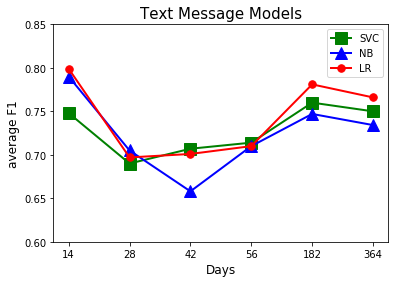

In [40]:
svc = [0.748, 0.690, 0.707, 0.714, 0.760, 0.750]
nb = [0.790, 0.705, 0.658, 0.710, 0.747, 0.7342]
lr = [0.799, 0.697, 0.701, 0.710, 0.781, 0.766]
days = ['14', '28', '42', '56', '182', '364']

plt.figure(figsize = (6, 4))
plt.plot(days, svc, c = 'g', marker = 's', label = "SVC", linewidth=2, markersize=12)
plt.plot(days, nb, c = 'b', marker = '^', label = "NB", linewidth=2, markersize=12)
plt.plot(days, lr, c = 'r', marker = '.', label = "LR", linewidth=2, markersize=15)

plt.ylim(0.6, 0.85)
plt.xlabel("Days", fontsize = 12)
plt.ylabel("average F1", fontsize = 12)
plt.title("Text Message Models", fontsize = 15)
plt.legend()

#plt.savefig("paperModelComp.pdf", bbox_inches = "tight")
#plt.savefig("paperModelComp.eps", bbox_inches = "tight")

plt.show()
plt.close()

In [28]:
#calculate other metrics- currently specificity
featureE = "Chi"
split = 15
name = "Tweets"
ndays = 364
modelType = "LR"
minP = 1
w = "remove"
nfeature = 73


filename = "timedata/results" + name + str(split) + modelType + str(ndays) + "days" + str(minP) + "p" + w + featureE + ".csv"
resultsDF = pd.read_csv(filename)
resultsDF = resultsDF[(resultsDF["nFeatures"] == nfeature)]
resultsDF = resultsDF.reset_index()
specs = []
for i in range(0, resultsDF.shape[0]):
    s = resultsDF.trueNeg[i]/(resultsDF.trueNeg[i]+resultsDF.falsePos[i])
    specs.append(s)
print(len(specs))
print(sum(specs)/len(specs))
print(np.std(specs))

100
0.6854285714285712
0.056783872387019436


F1
_________________________ndays = 14__________________________
0.8058
0.01776929506991026
3


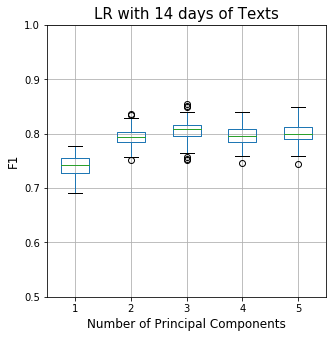

In [5]:
featureElist = ["PCA10"]#, "kPCA", "PCA", "kPCA10", "PCA10"]
split = 15
name = "Texts"
ndays = 14
modelTypelist = ["LR"]
minP = 1
w = "remove"
scoreList = ["F1"]#"precision", "recall", "AUC", "Accuracy"]

for score in scoreList:
    print(score)
    print("_________________________ndays = " + str(ndays) + "__________________________")
    for modelType in modelTypelist:
        for featureE in featureElist:
            filename = "timedata/results" + name + str(split) + modelType + str(ndays) + "days" + str(minP) + "p" + w + featureE + ".csv"
            resultsDF = pd.read_csv(filename)
            #print(resultsDF.columns)
            #resultsDF = resultsDF[(resultsDF["nFeatures"]==3)]# & (resultsDF["nFeatures"] <=15)]
            
            averages = []
            df = pd.DataFrame()
            for parameter in sorted(set(resultsDF.nFeatures)):
                df[str(parameter)] = list(resultsDF[resultsDF["nFeatures"] == parameter][score])
                averages.append(round(sum(resultsDF[resultsDF["nFeatures"] == parameter][score])/100,4))
            print(max(averages))
            print(np.std(resultsDF[resultsDF["nFeatures"] == parameter][score]))
            
        
            for parameter in sorted(set(resultsDF.nFeatures)):
                par = round(sum(resultsDF[resultsDF["nFeatures"] == parameter][score])/100,4) 
                if par == max(averages):
                    print(parameter)
                    
            plt.figure(figsize = (5, 5))
            plt.xlabel("Number of Principal Components", fontsize = 12)
            plt.ylabel(score, fontsize = 12)
            plt.title(modelType + " with " + str(ndays) + " days of Texts", fontsize = 15)
            df.boxplot()
            plt.ylim(0.5, 1)
            plt.savefig("paper" + modelType + featureE + str(ndays) + ".pdf", bbox_inches = "tight")
            #plt.savefig("paper" + modelType + featureE + str(ndays) + ".eps", bbox_inches = "tight")
            plt.show()
            #plt.close()

_________________________ndays = 14__________________________
0.721


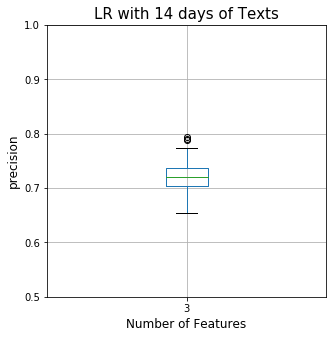

In [22]:
featureElist = ["PCA10"]#, "kPCA", "PCA", "kPCA10", "PCA10"]
split = 15
name = "Texts"
ndayslist = [14]
modelTypelist = ["LR"]
minP = 1
w = "remove"
score = "precision"

for ndays in ndayslist:
    print("_________________________ndays = " + str(ndays) + "__________________________")
    for modelType in modelTypelist:
        for featureE in featureElist:
            filename = "timedata/results" + name + str(split) + modelType + str(ndays) + "days" + str(minP) + "p" + w + featureE + ".csv"
            resultsDF = pd.read_csv(filename)
            #print(resultsDF.columns)
            #resultsDF = resultsDF[(resultsDF["nFeatures"]==3)]# & (resultsDF["nFeatures"] <=15)]
            
            averages = []
            df = pd.DataFrame()
            for parameter in sorted(set(resultsDF.nFeatures)):
                df[str(parameter)] = list(resultsDF[resultsDF["nFeatures"] == parameter][score])
                averages.append(round(sum(resultsDF[resultsDF["nFeatures"] == parameter][score])/100,4))
            print(max(averages))
            plt.figure(figsize = (5, 5))
            plt.xlabel("Number of Features", fontsize = 12)
            plt.ylabel(score, fontsize = 12)
            plt.title(modelType + " with " + str(ndays) + " days of Texts", fontsize = 15)
            df.boxplot()
            plt.ylim(0.5, 1)
            #plt.savefig("paper" + modelType + featureE + str(ndays) + ".pdf", bbox_inches = "tight")
            #plt.savefig("paper" + modelType + featureE + str(ndays) + ".eps", bbox_inches = "tight")
            plt.show()
            plt.close()

_________________________ndays = 14__________________________
0.7176


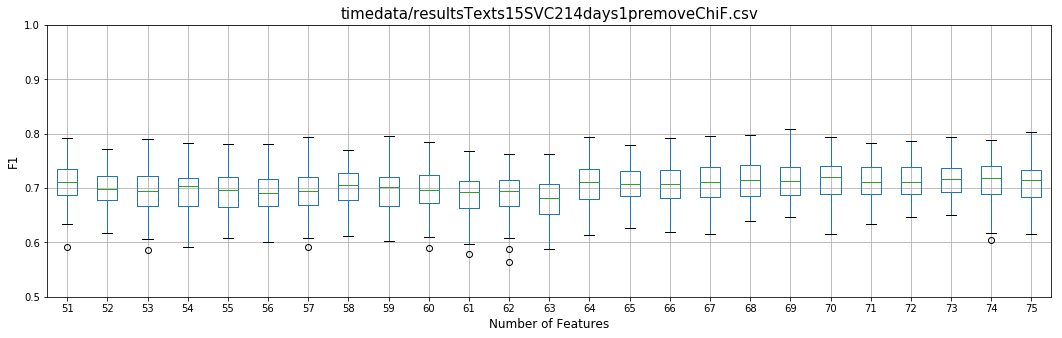

_________________________ndays = 28__________________________
0.6889


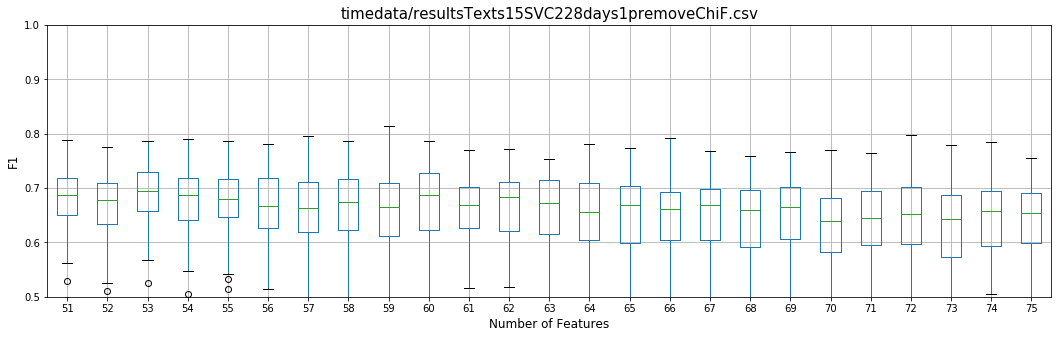

_________________________ndays = 42__________________________
0.6935


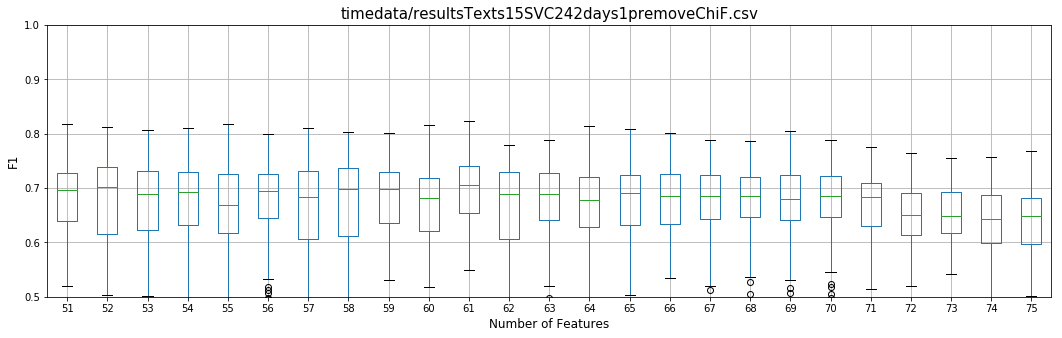

_________________________ndays = 56__________________________
0.6987


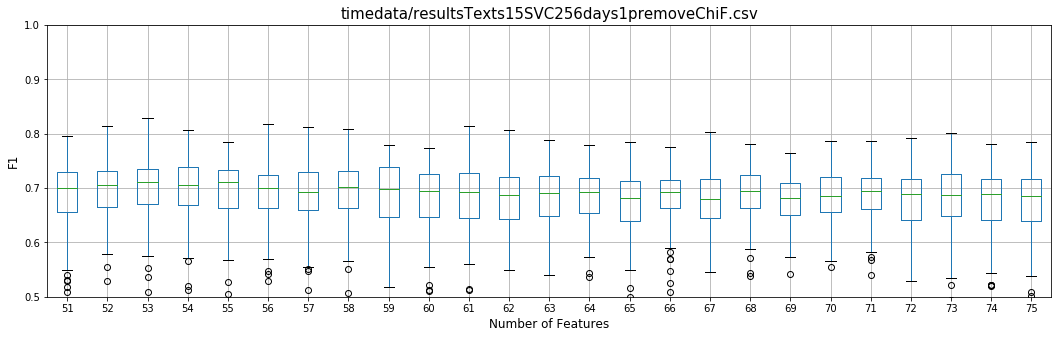

_________________________ndays = 182__________________________
0.7475


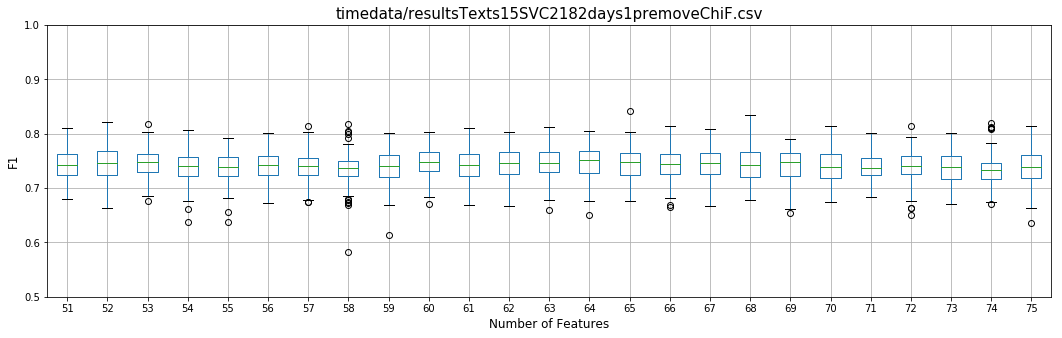

_________________________ndays = 364__________________________
0.7224


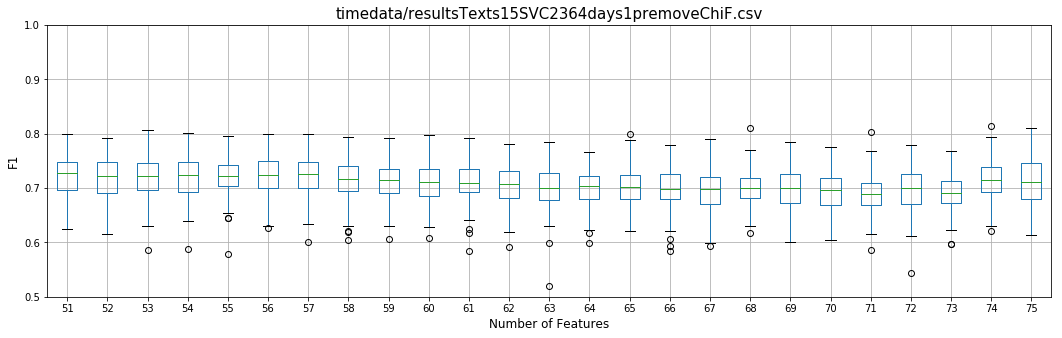

In [12]:
featureElist = ["ChiF"]#, "kPCA", "PCA"] #"kPCA10", "PCA10"]
split = 15
name = "Texts"
ndayslist = [14, 28, 42, 56, 182, 364]
modelTypelist = ["SVC2"]
minP = 1
w = "remove"
score = "F1"

for ndays in ndayslist:
    print("_________________________ndays = " + str(ndays) + "__________________________")
    for modelType in modelTypelist:
        for featureE in featureElist:
            filename = "timedata/results" + name + str(split) + modelType + str(ndays) + "days" + str(minP) + "p" + w + featureE + ".csv"
            try:
                resultsDF = pd.read_csv(filename)

                df = pd.DataFrame()
                averages = []
                for parameter in sorted(set(resultsDF.nFeatures)):
                    df[str(parameter)] = list(resultsDF[resultsDF["nFeatures"] == parameter][score])
                    averages.append(round(sum(resultsDF[resultsDF["nFeatures"] == parameter][score])/100,4))
                print(max(averages))
                
                plt.figure(figsize = (18, 5))
                plt.xlabel("Number of Features", fontsize = 12)
                plt.ylabel(score, fontsize = 12)
                plt.title(filename, fontsize = 15)
                df.boxplot()
                plt.ylim(0.5, 1)
                plt.show()
                plt.close()
            except:
                print(filename)

_________________________ndays = 14__________________________
0.79


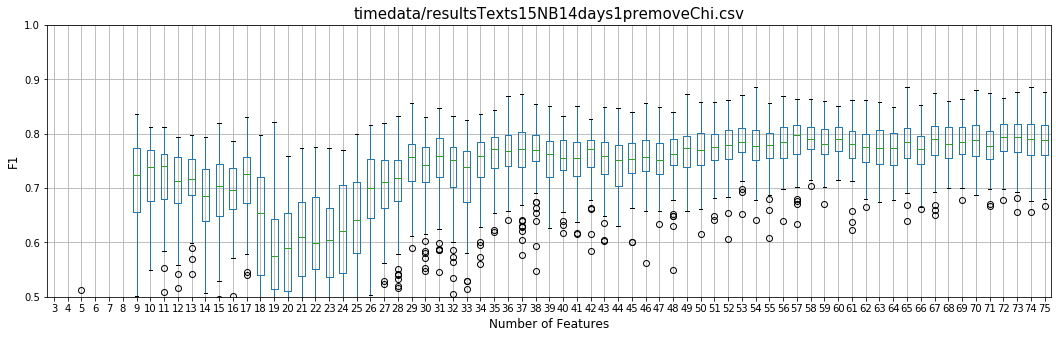

0.6045


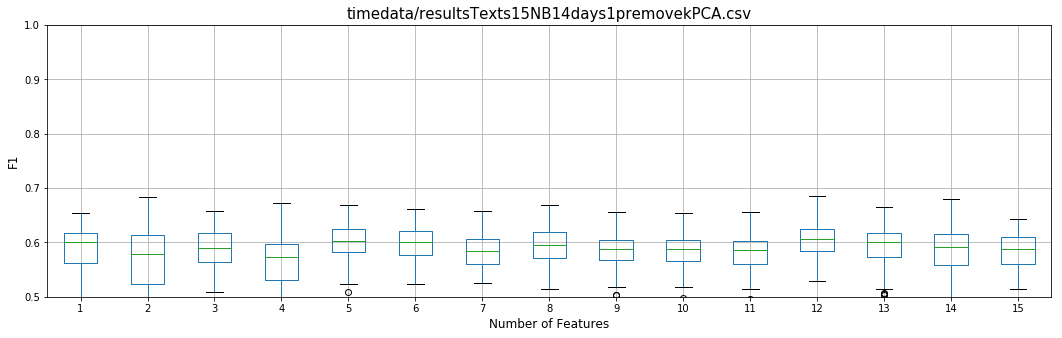

0.604


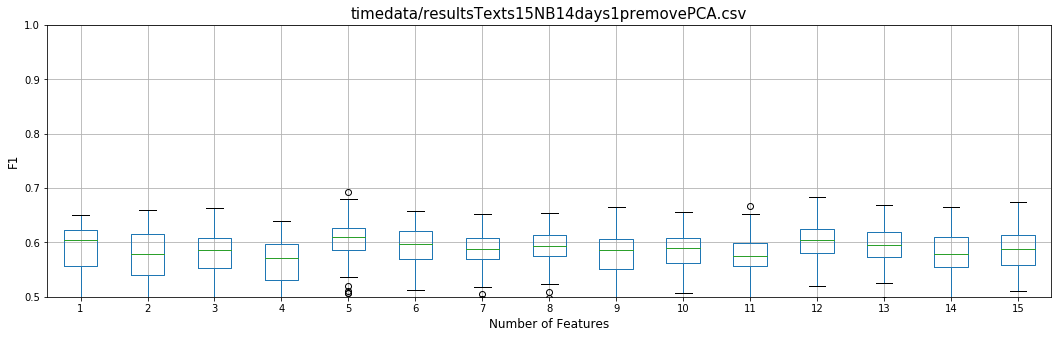

0.7988


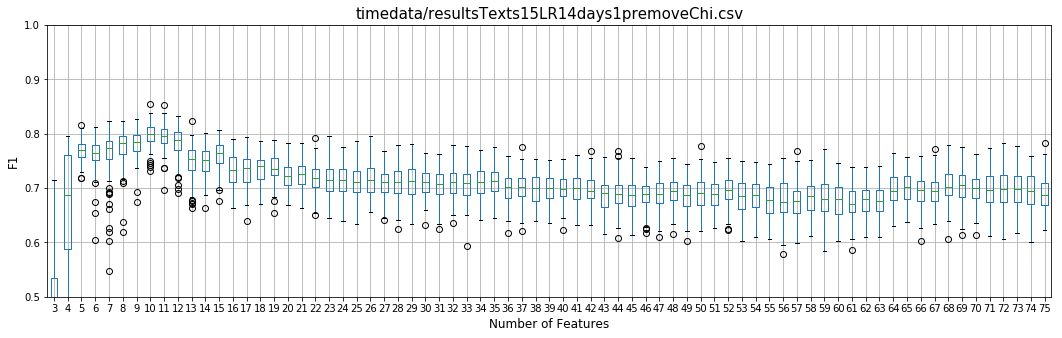

0.5763


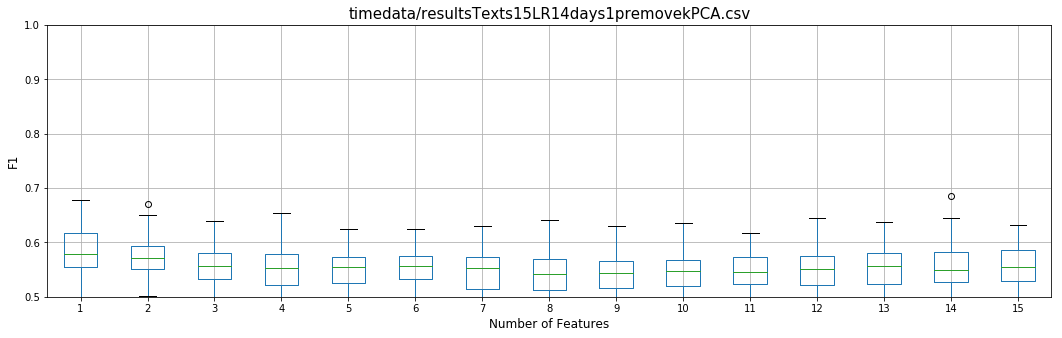

0.5799


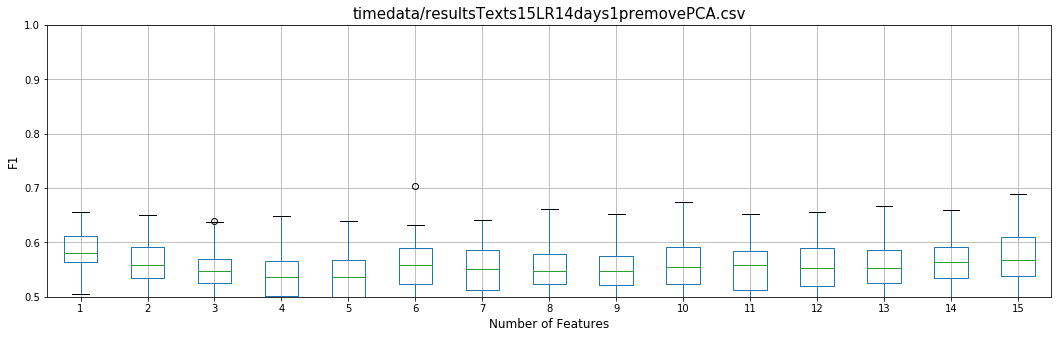

0.71


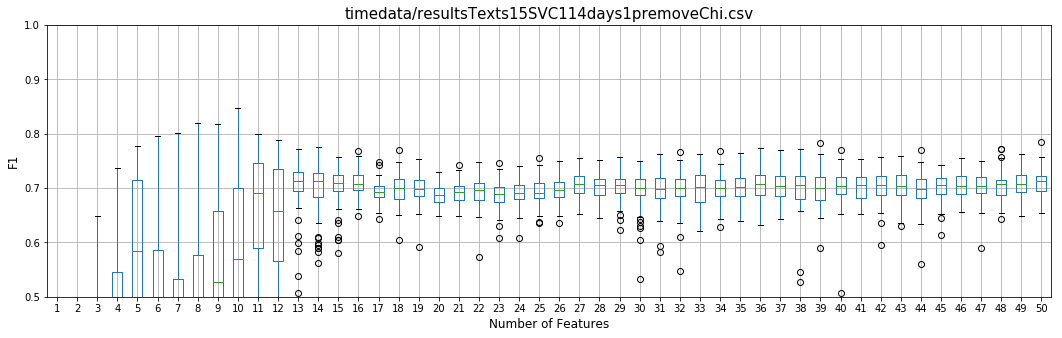

0.6338


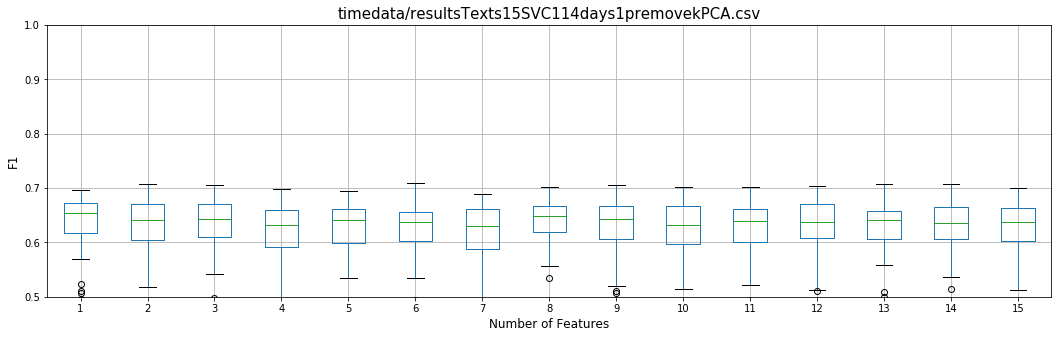

0.5773


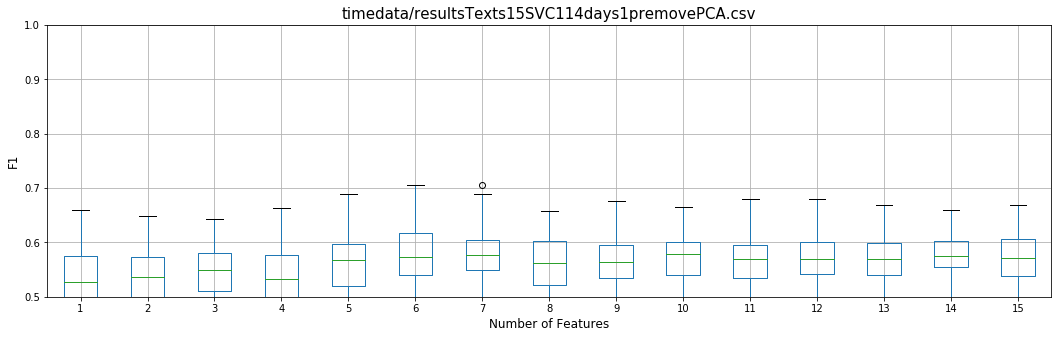

0.7481


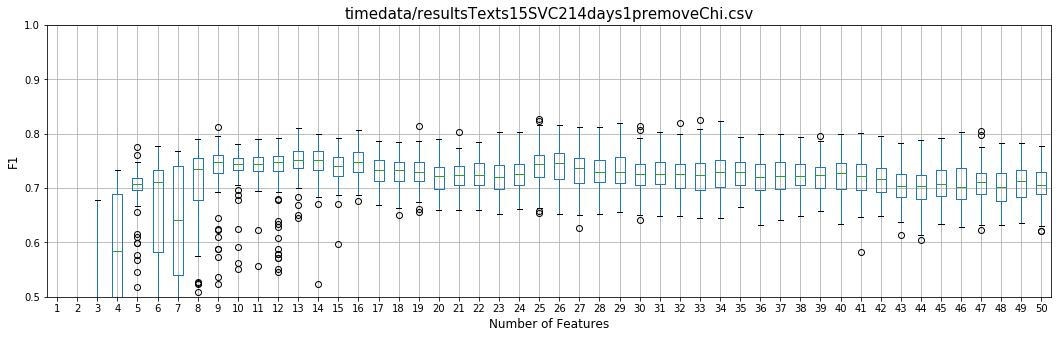

0.6387


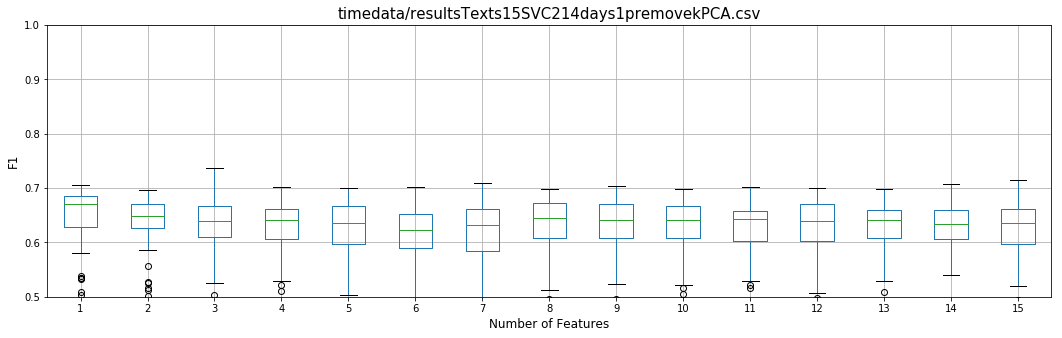

0.5877


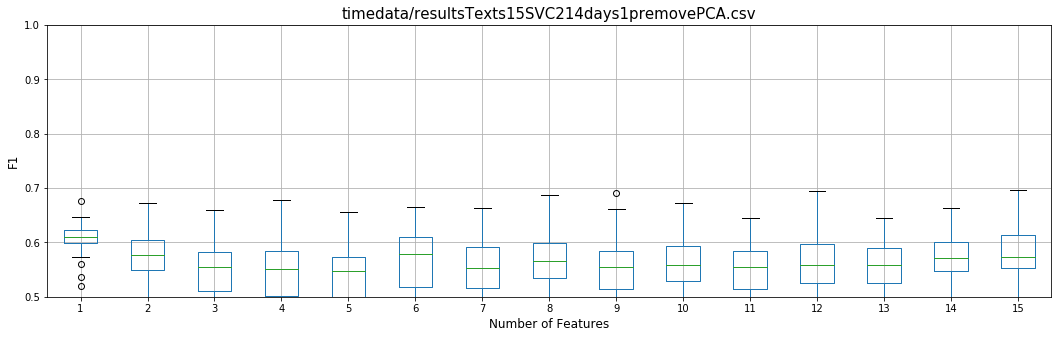

timedata/resultsTexts15kNN314days1premoveChi.csv
0.5396


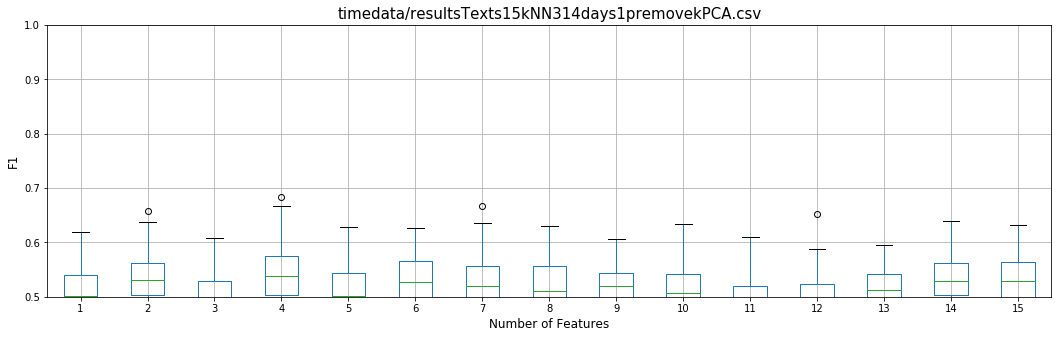

0.5331


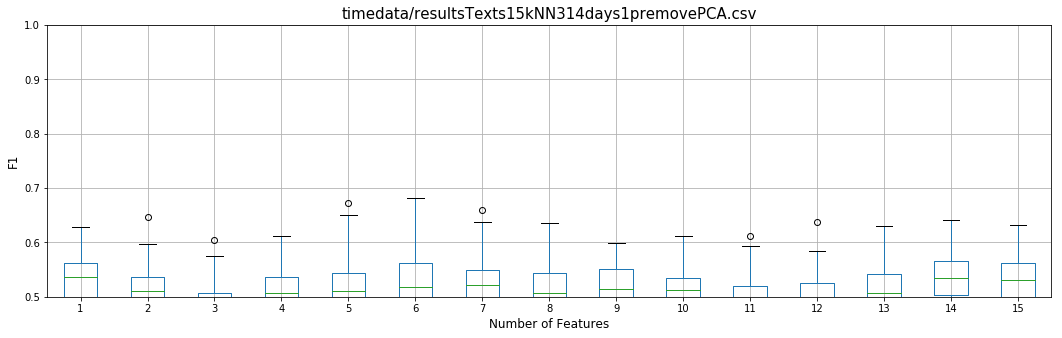

timedata/resultsTexts15kNN514days1premoveChi.csv
0.5415


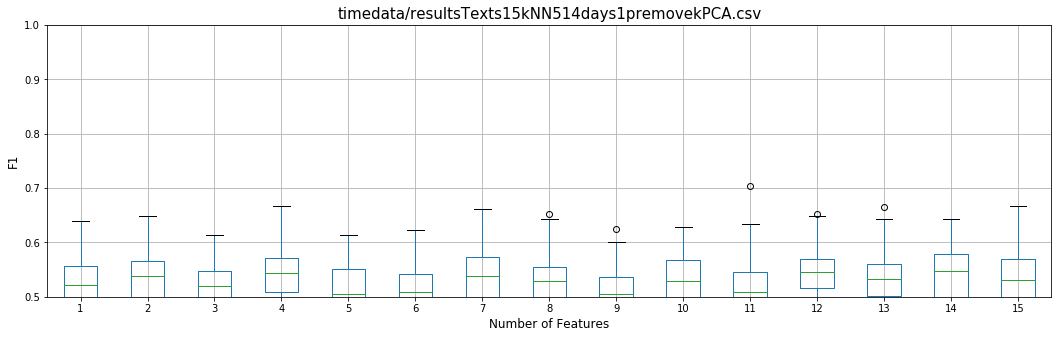

0.5518


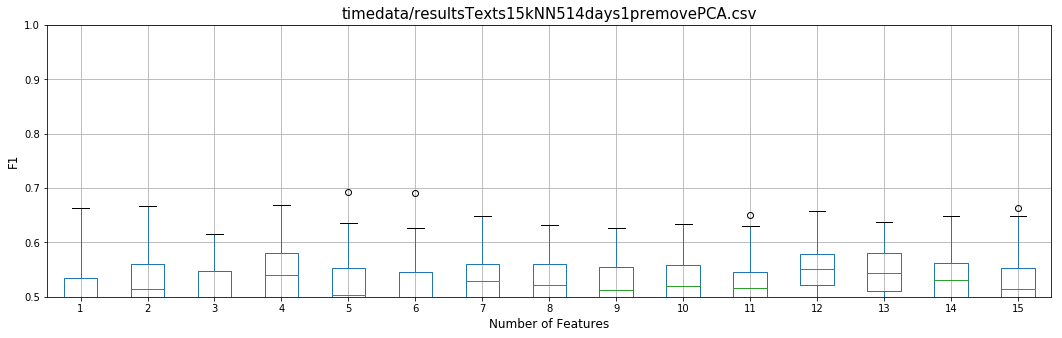

0.7398


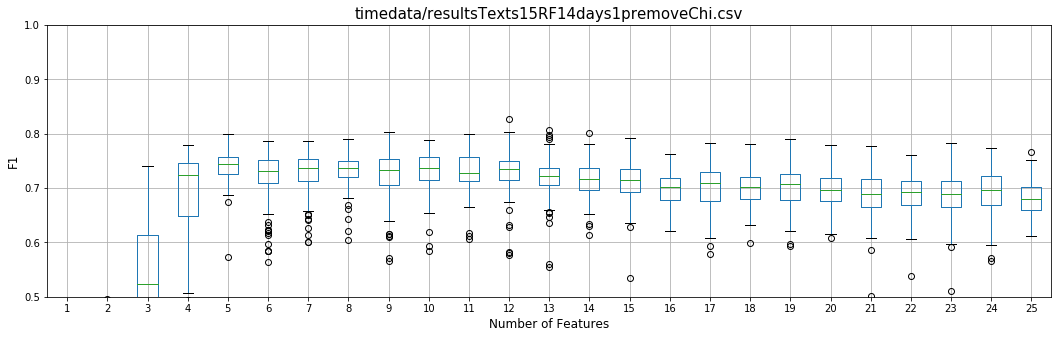

0.5295


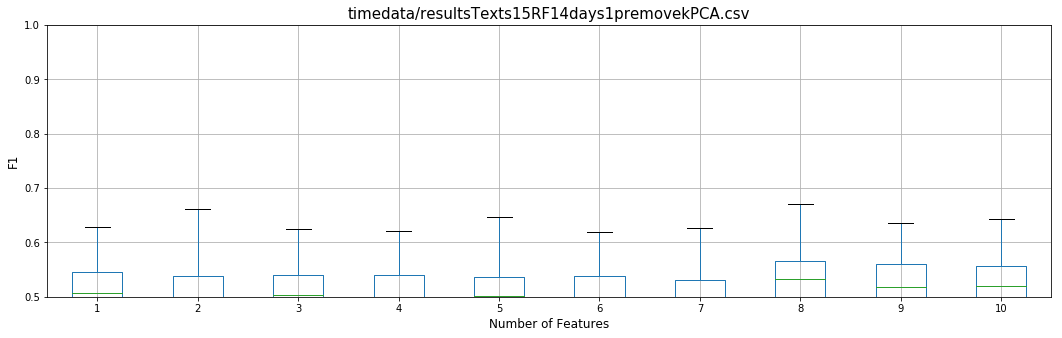

0.5128


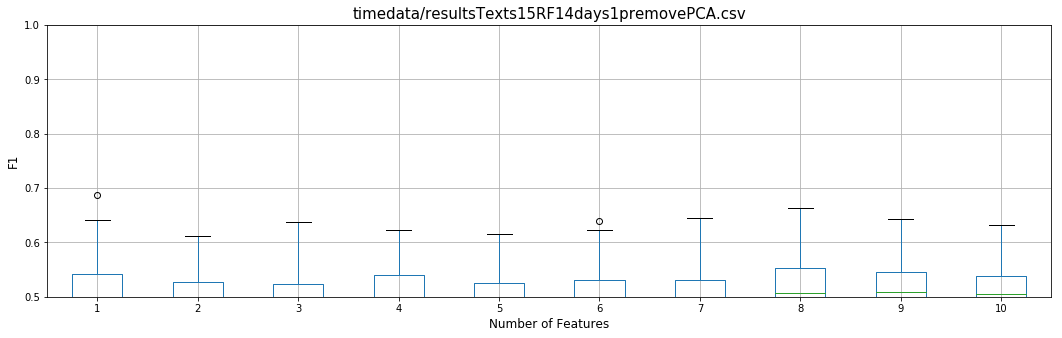

0.7331


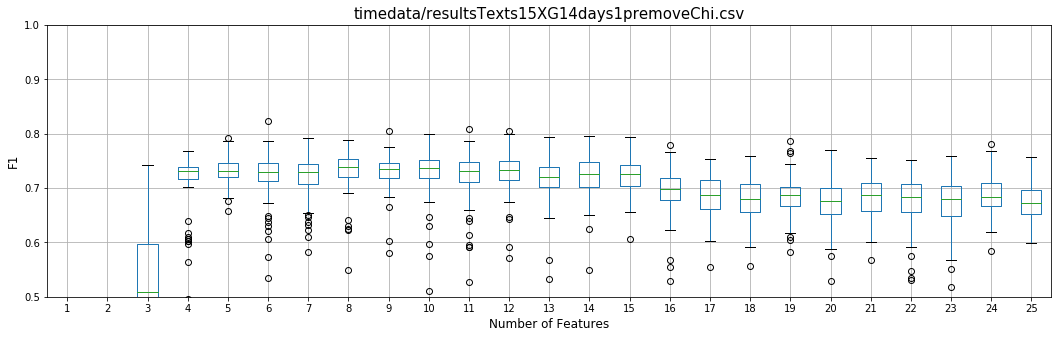

0.5464


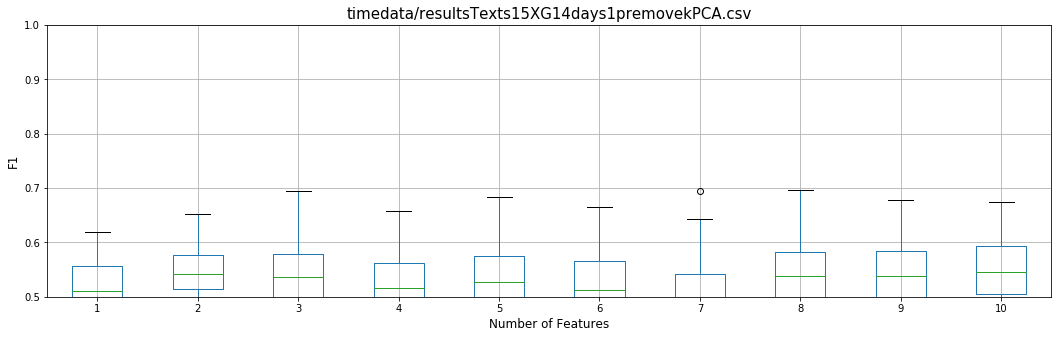

0.5176


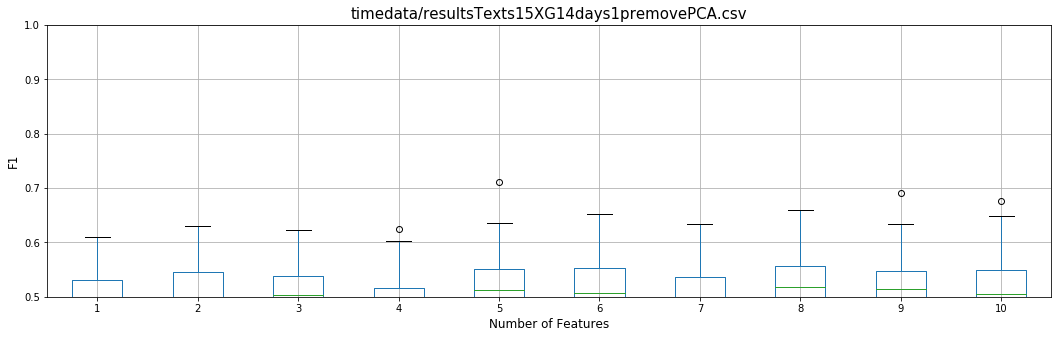

_________________________ndays = 28__________________________
0.7052


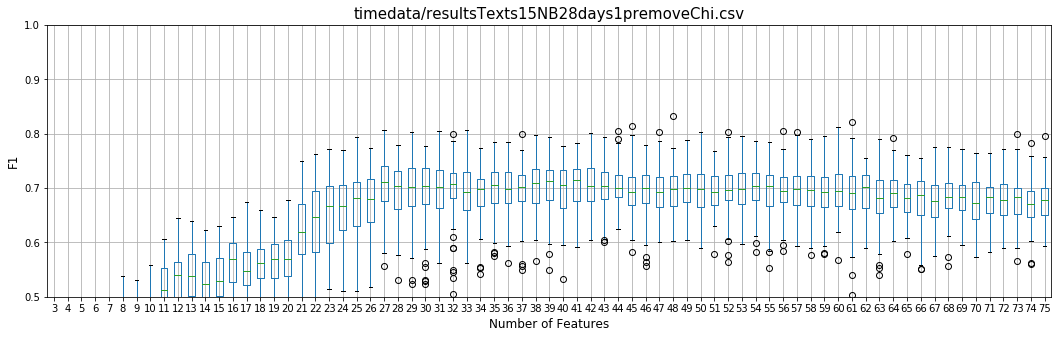

0.5507


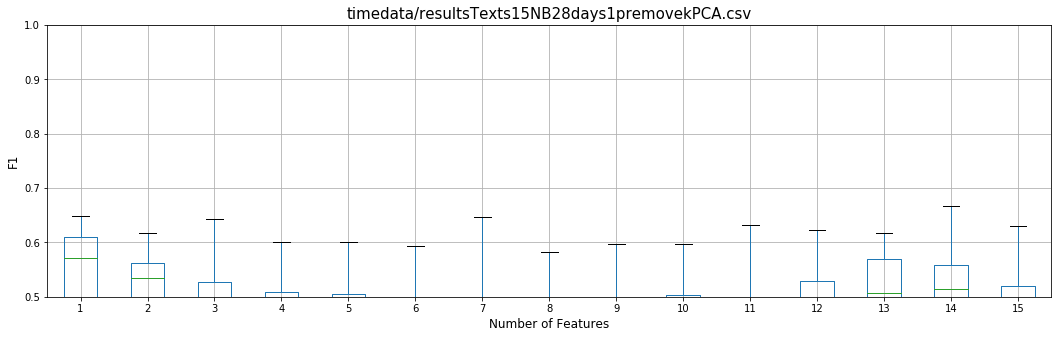

0.5533


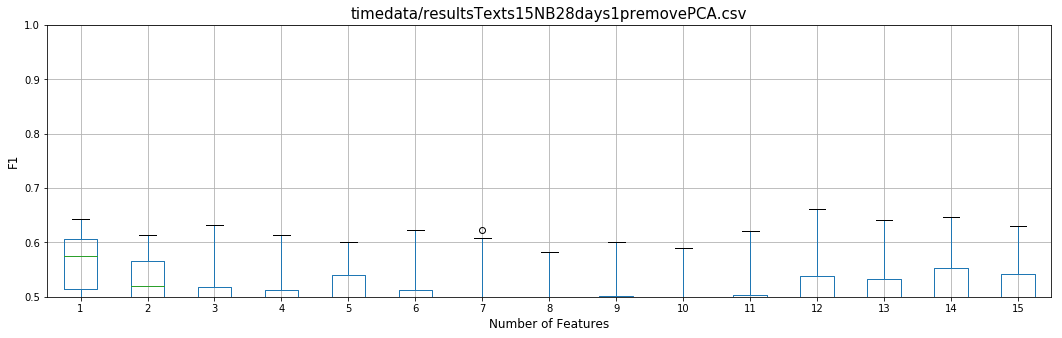

0.6968


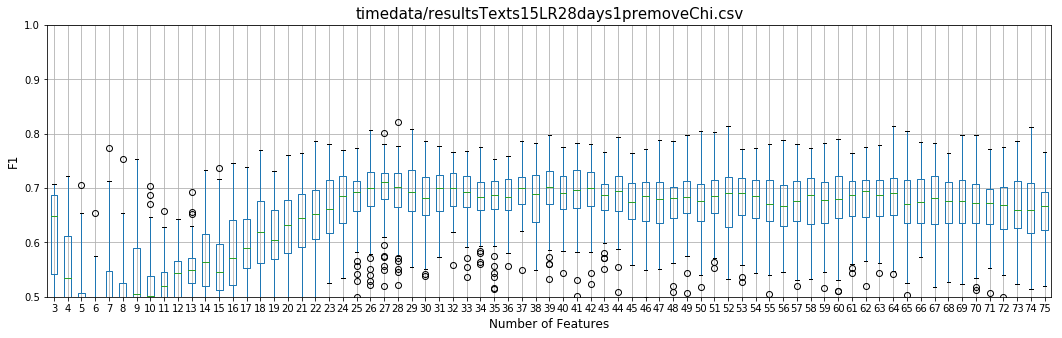

0.5055


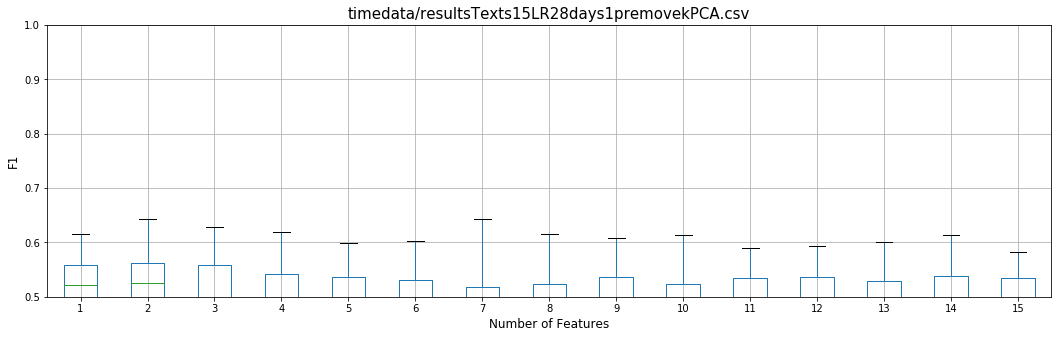

0.5002


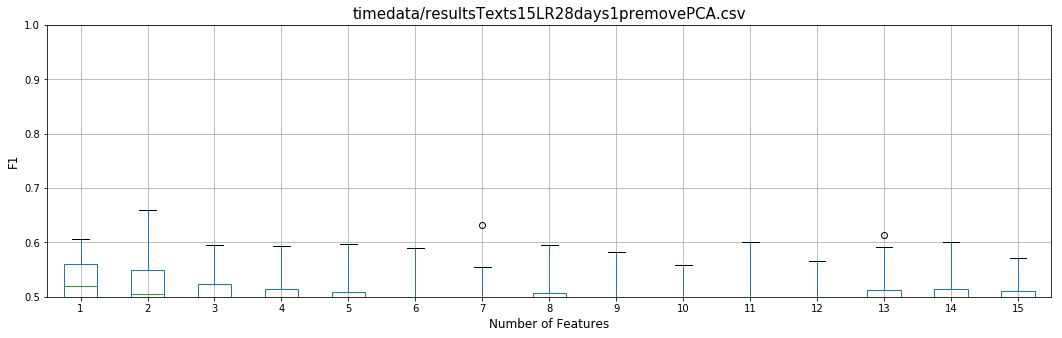

0.6714


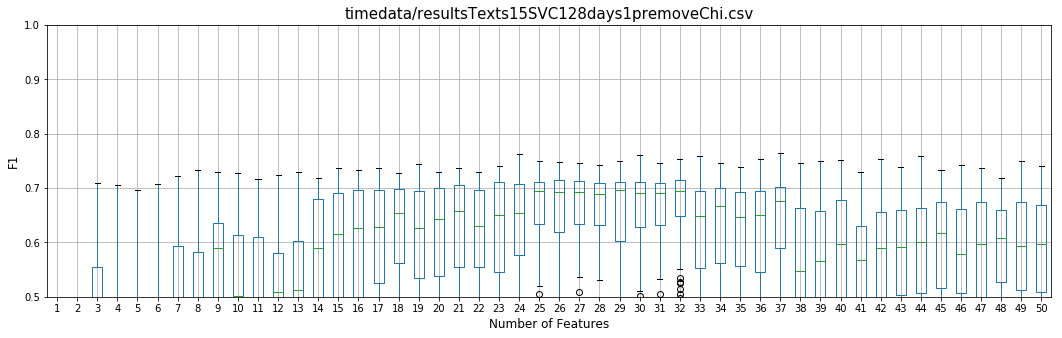

0.5624


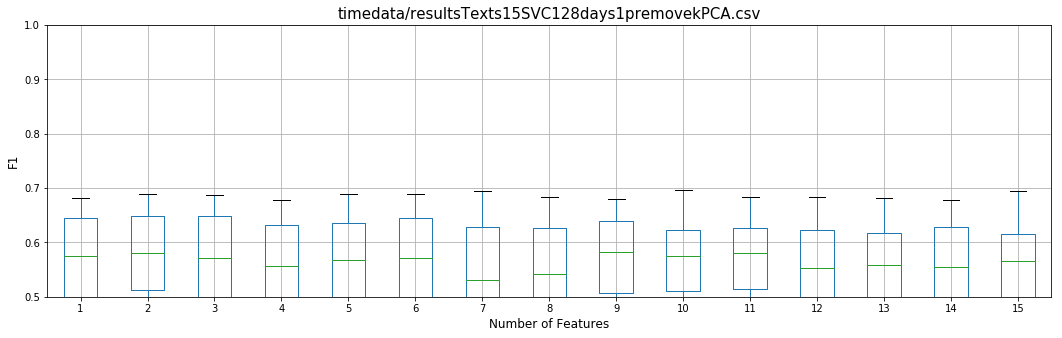

0.5295


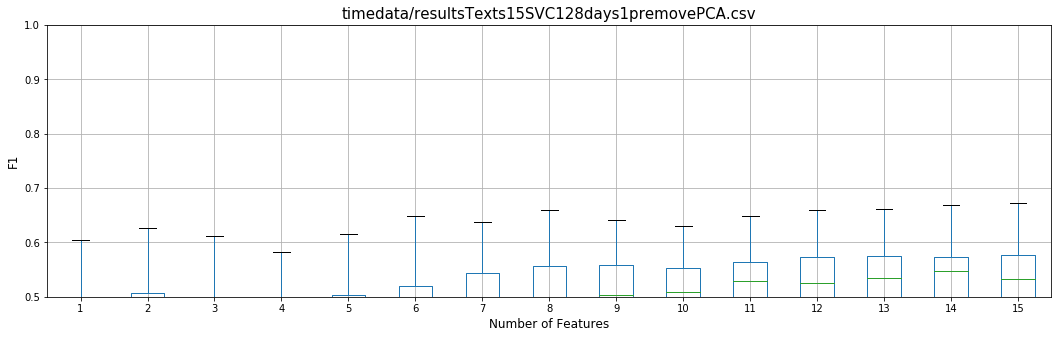

0.694


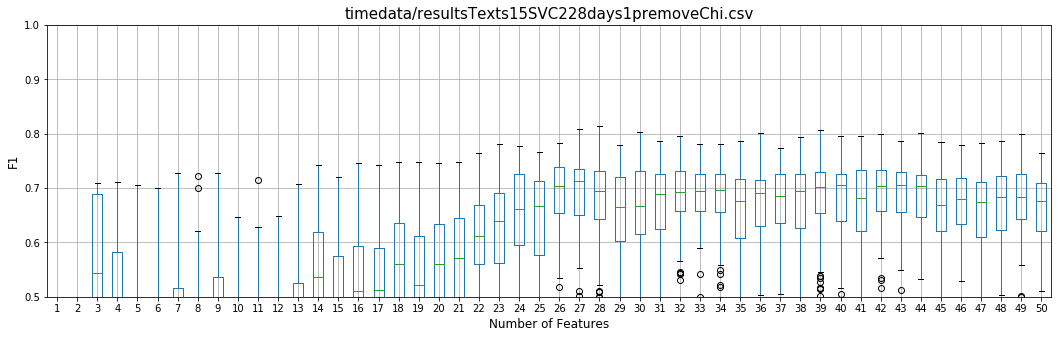

0.5669


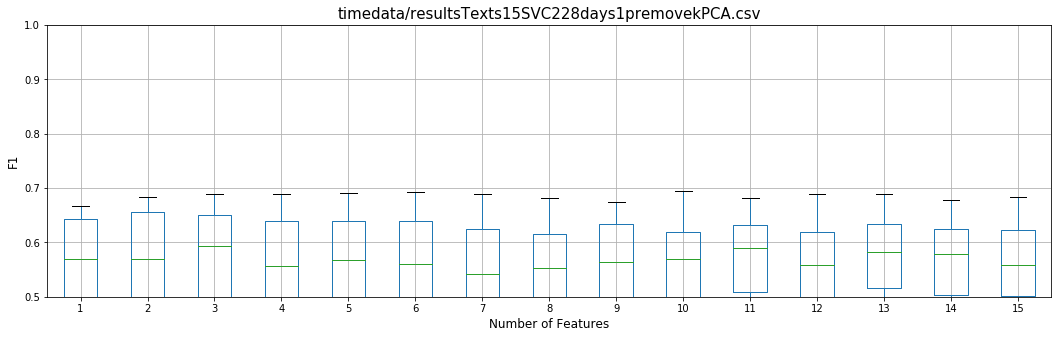

0.5368


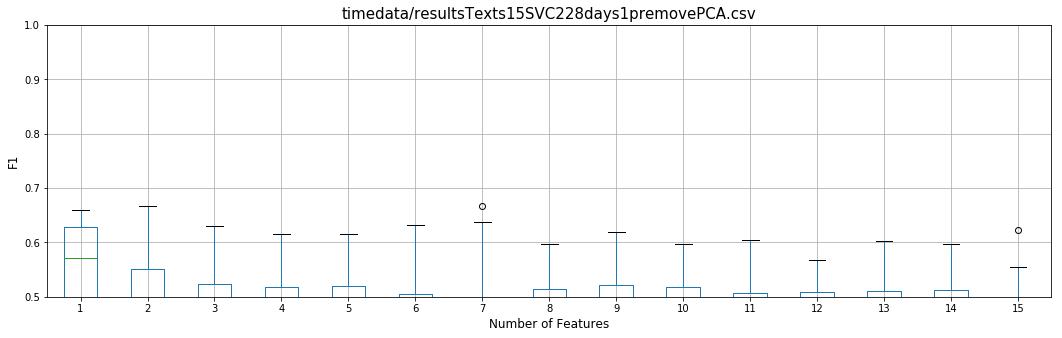

0.643


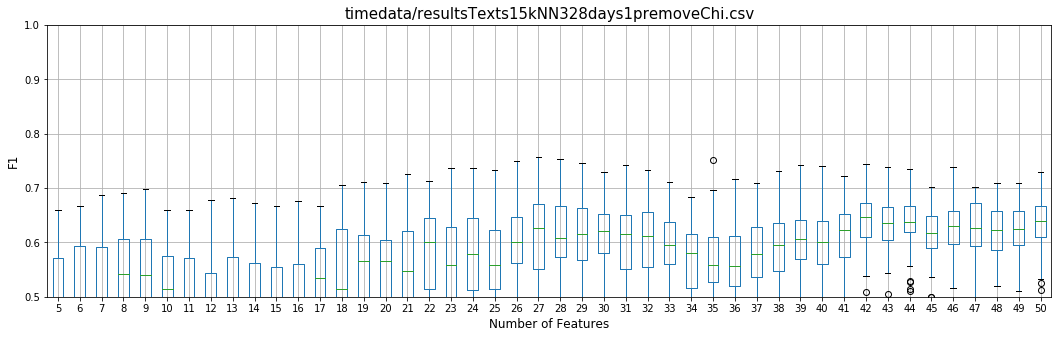

0.5149


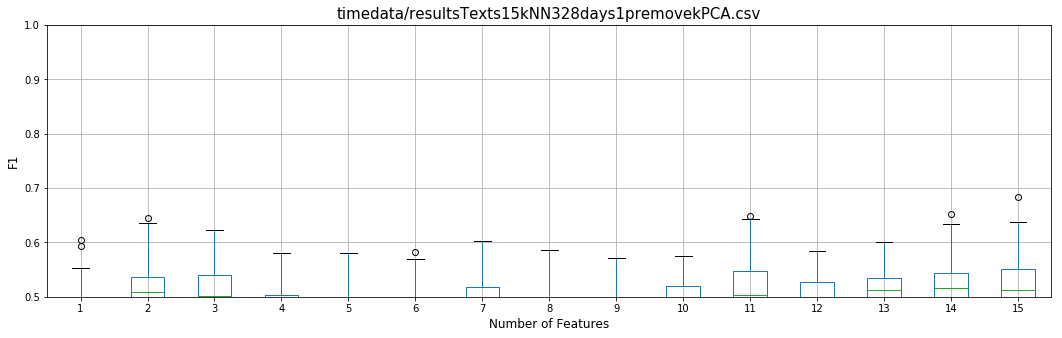

0.5224


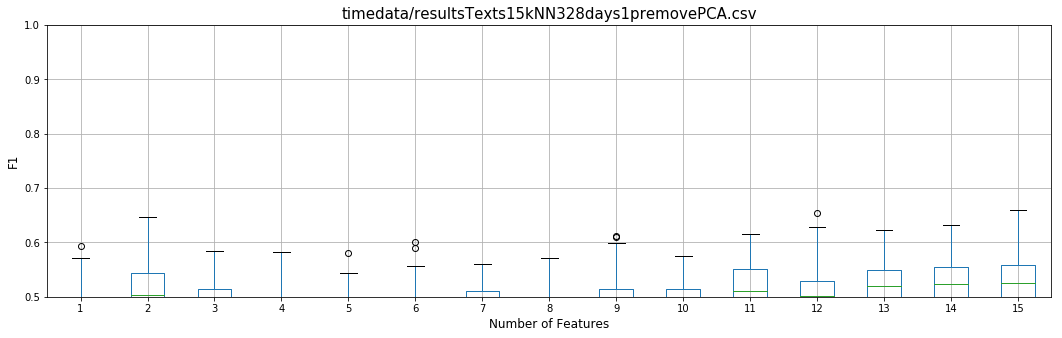

0.6309


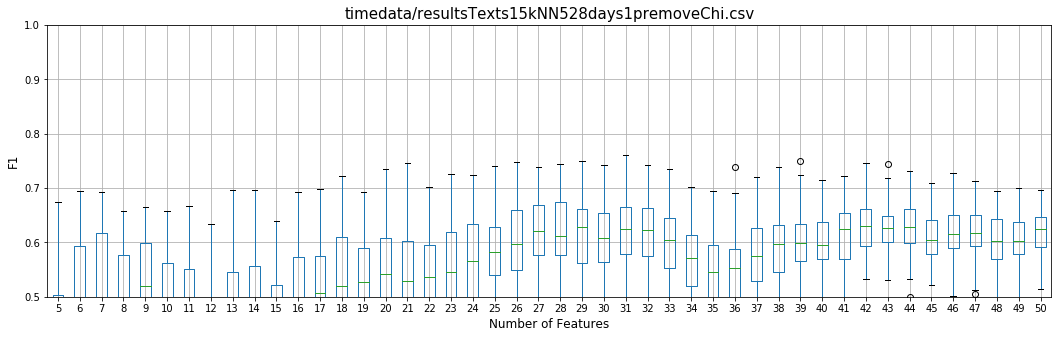

0.5409


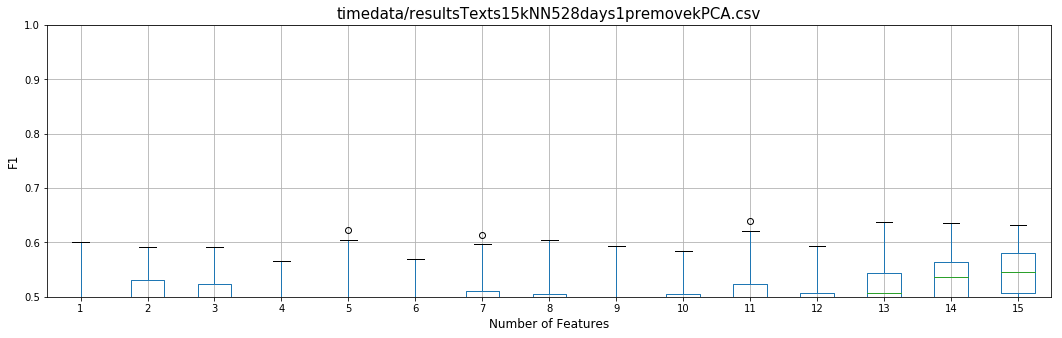

0.5469


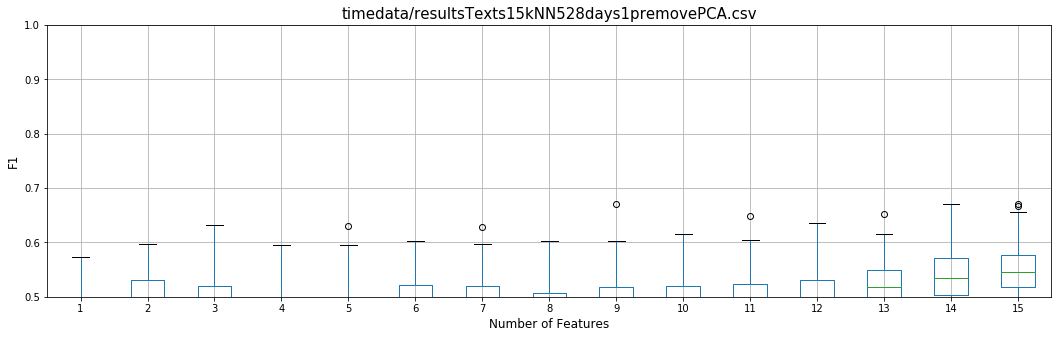

0.6103


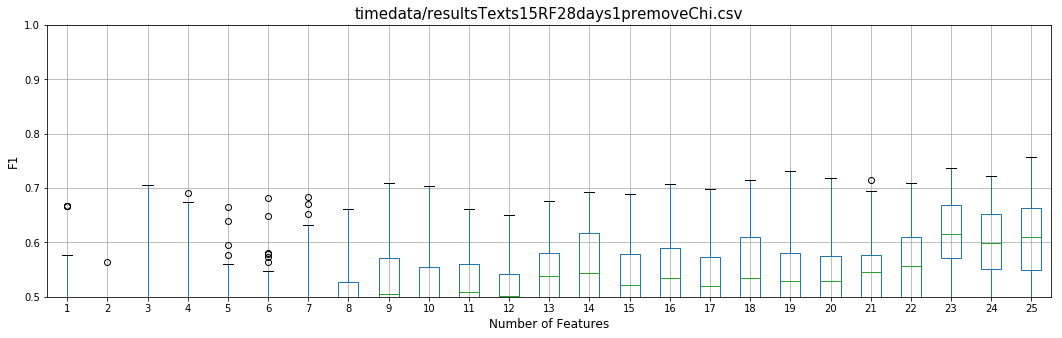

0.4809


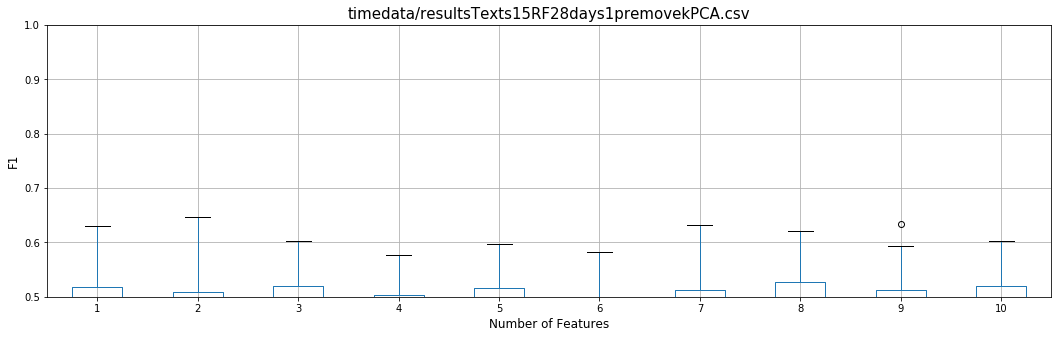

0.5111


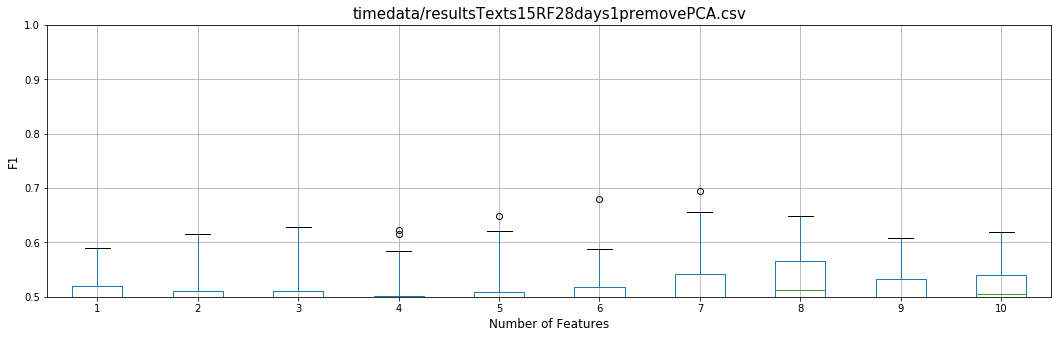

0.5808


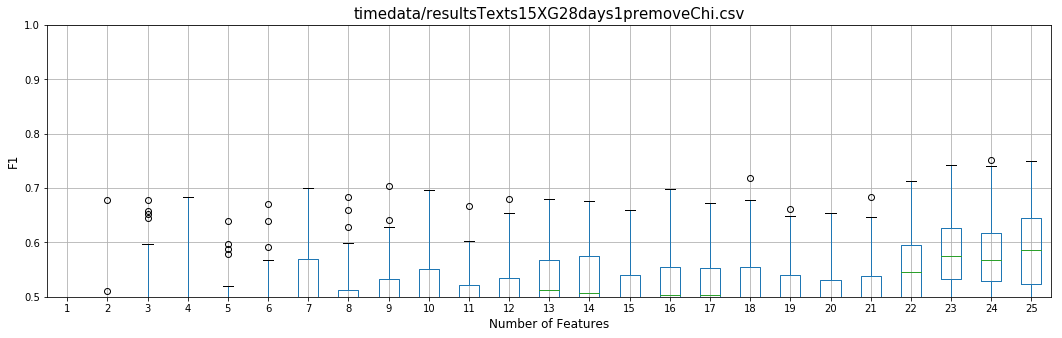

0.5165


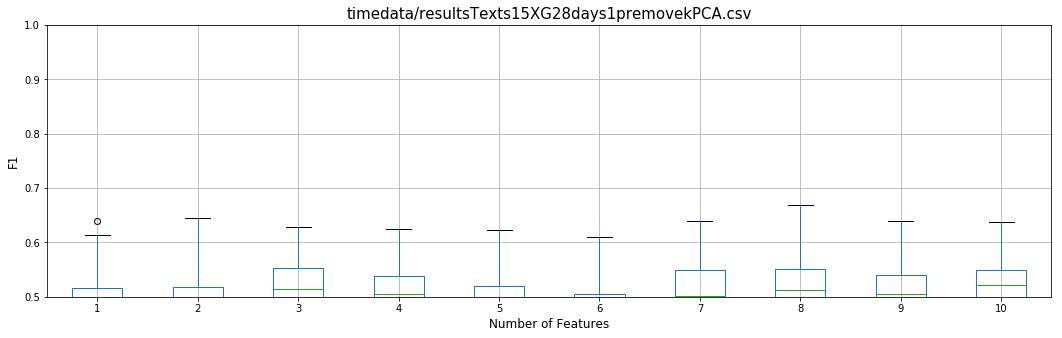

0.5416


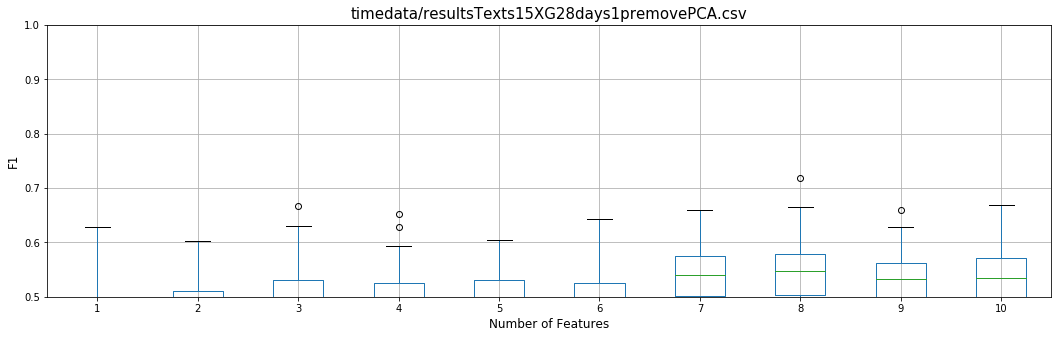

_________________________ndays = 42__________________________
0.6576


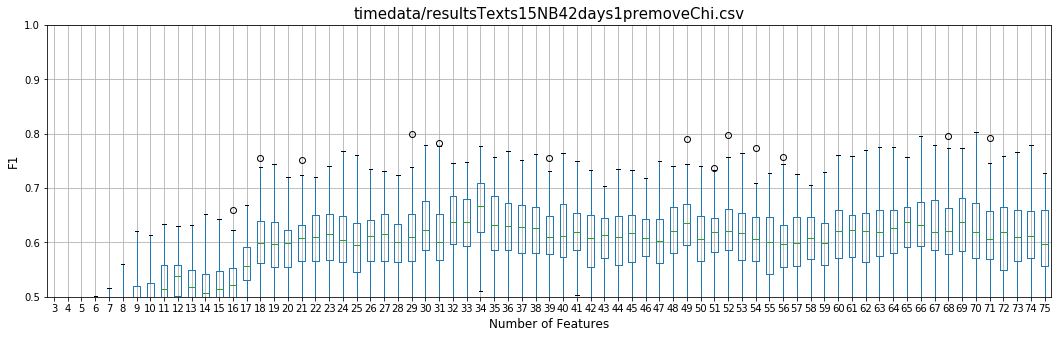

0.5586


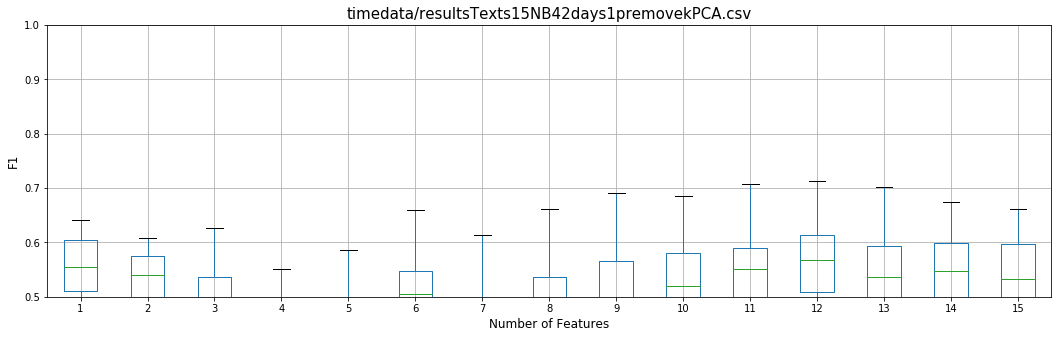

0.5529


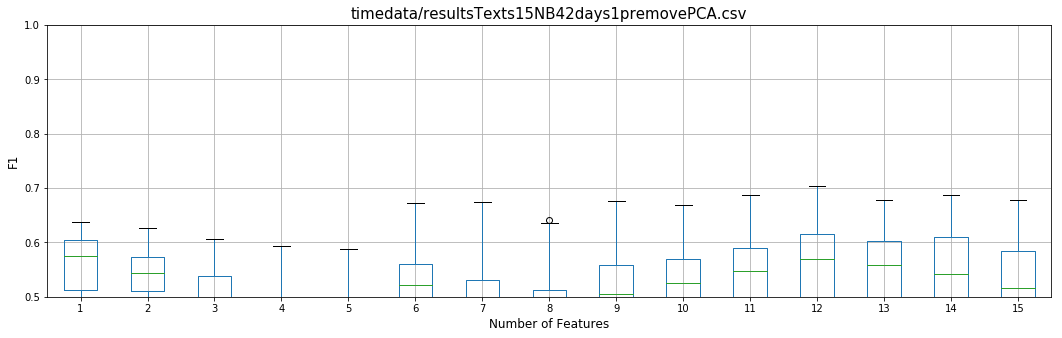

0.7009


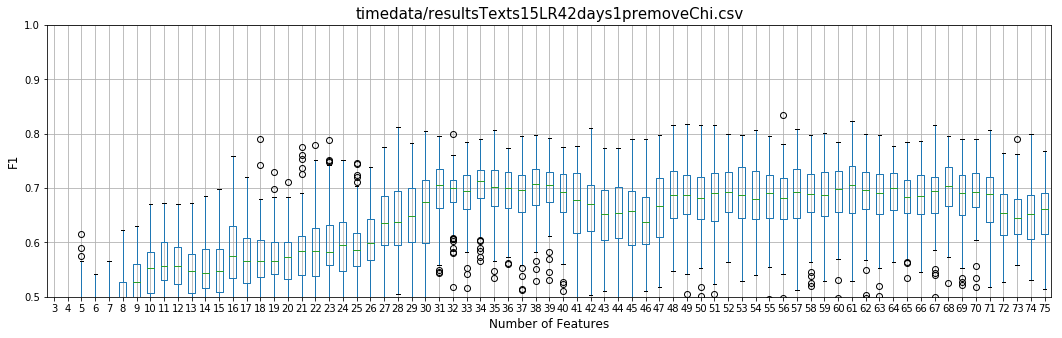

0.5102


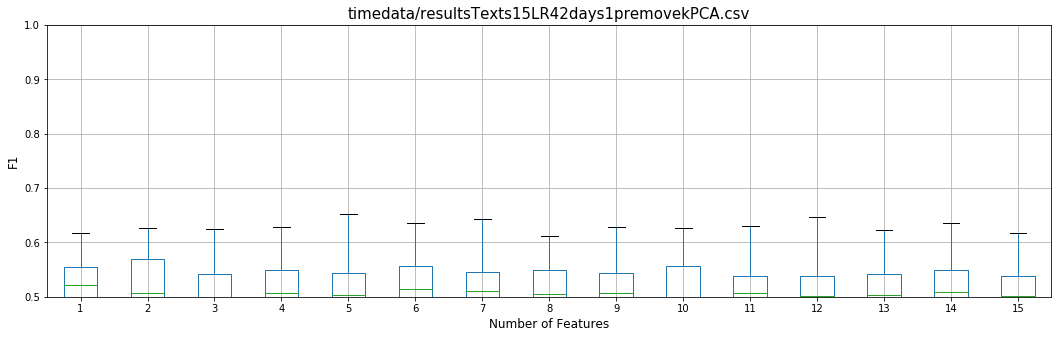

0.5031


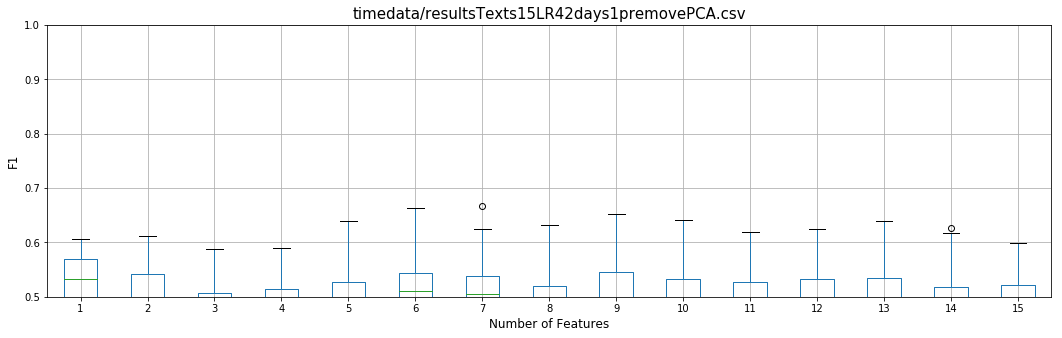

0.4903


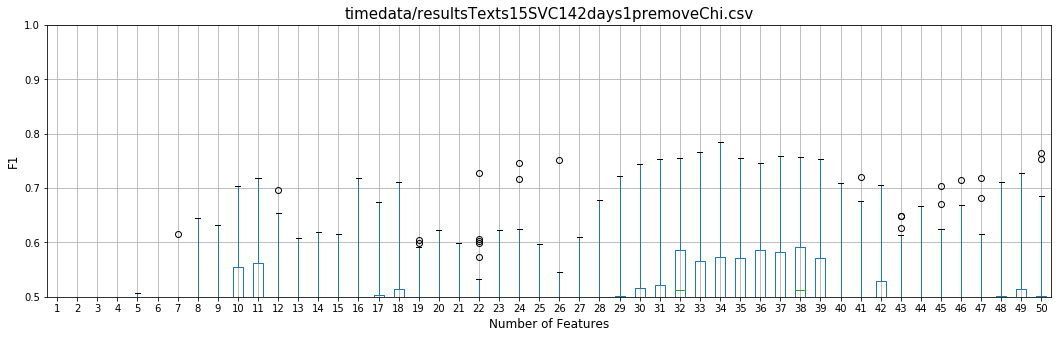

0.579


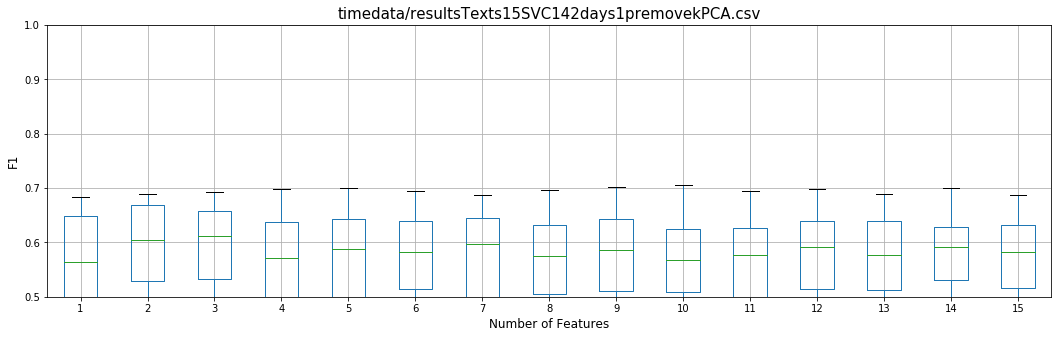

0.543


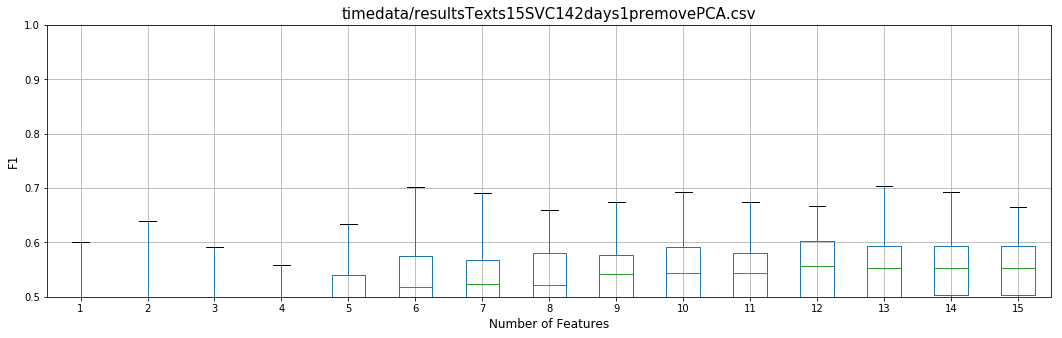

0.7065


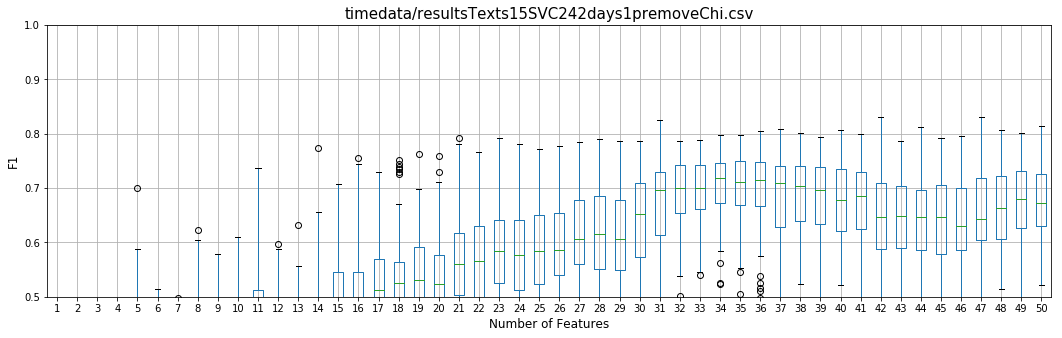

0.5819


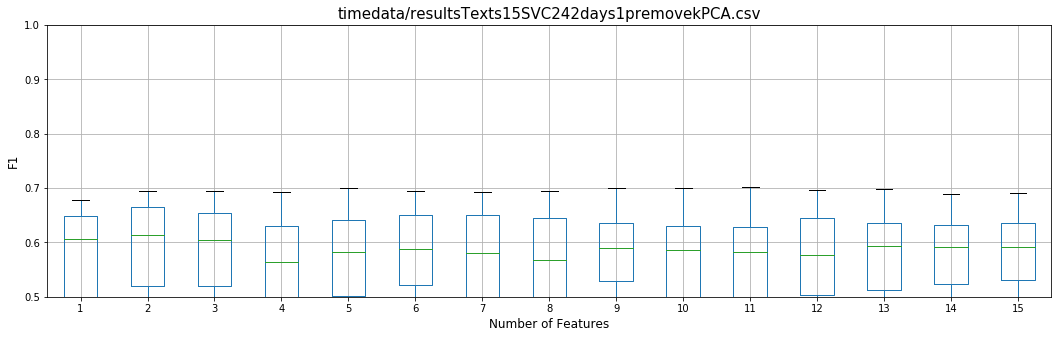

0.5284


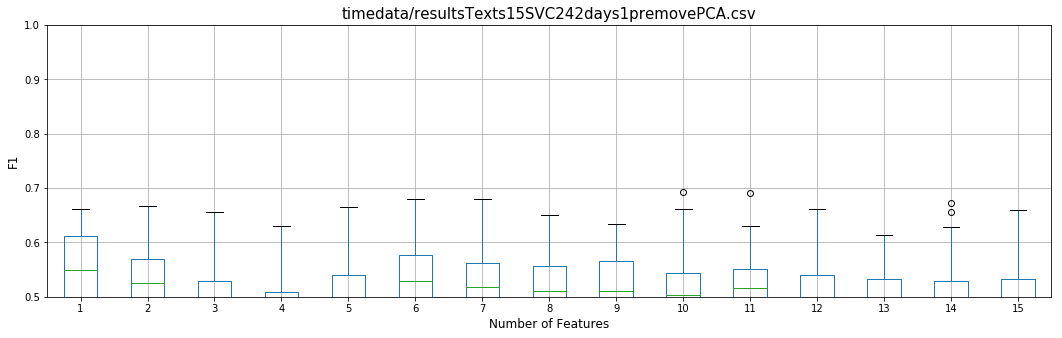

0.6475


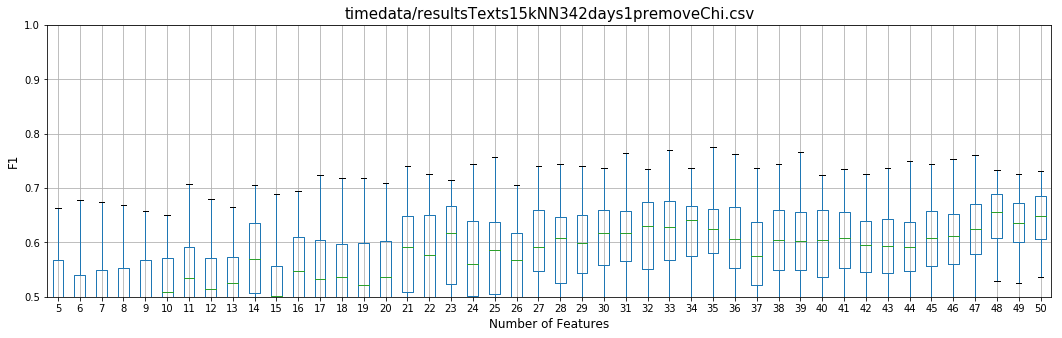

0.5717


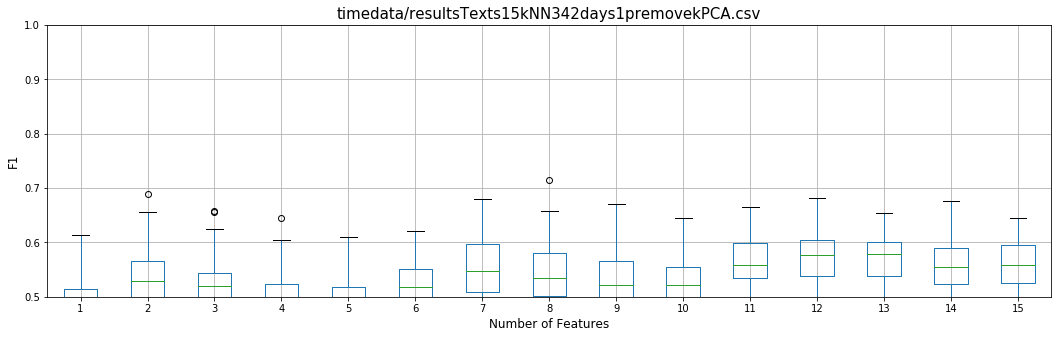

0.5666


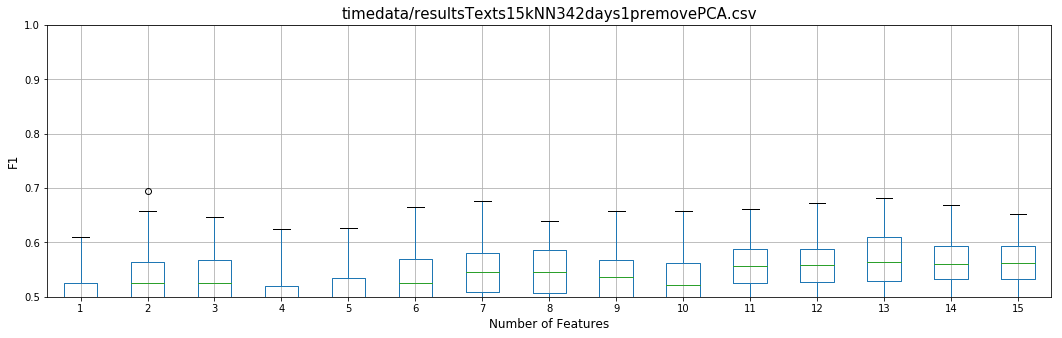

0.6466


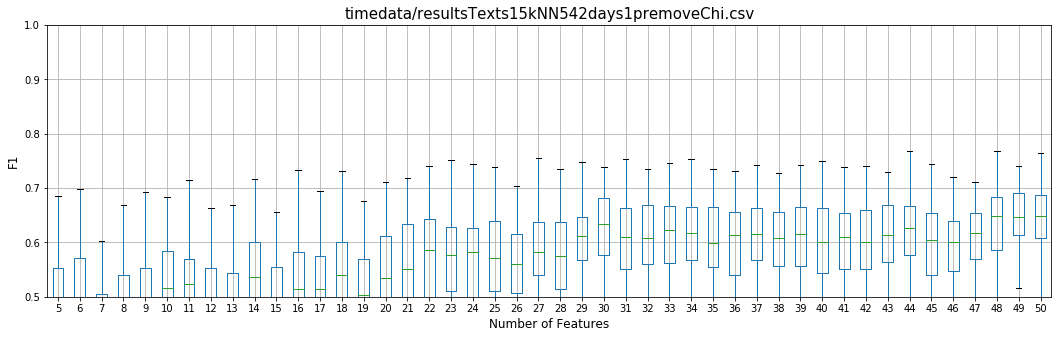

0.5674


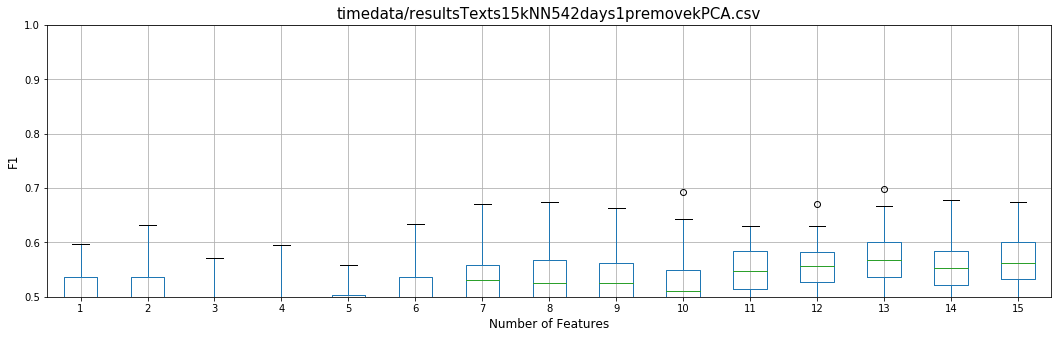

0.5715


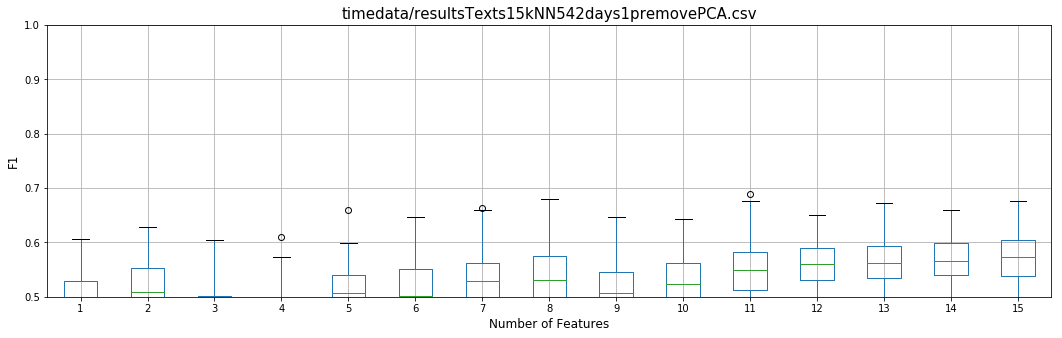

0.577


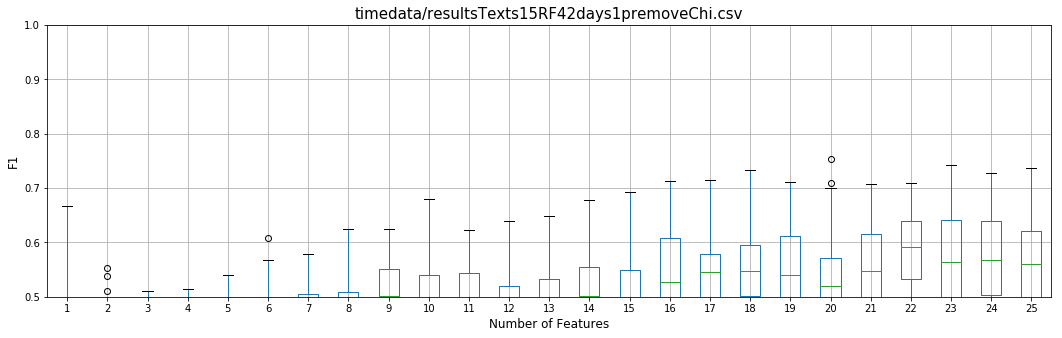

0.5114


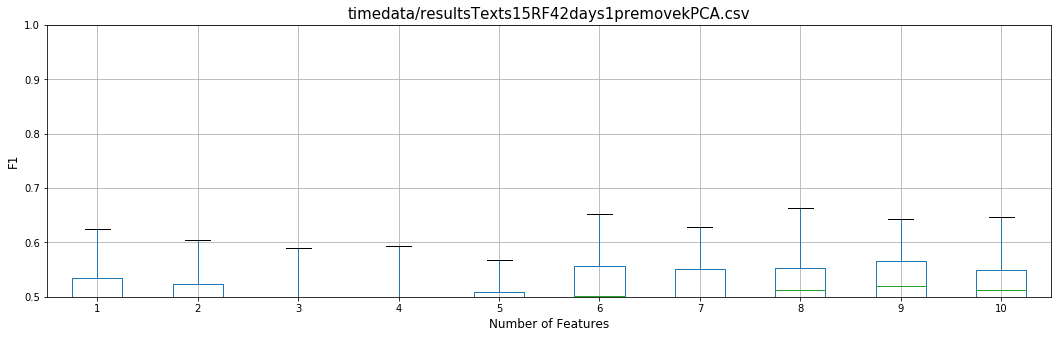

0.5133


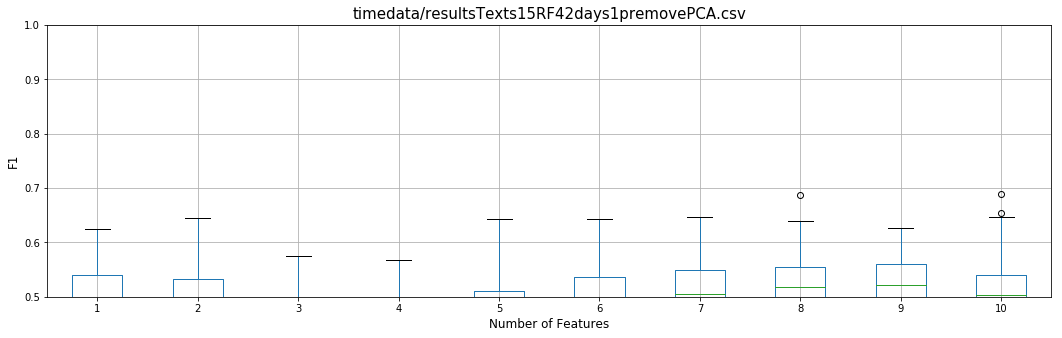

0.6001


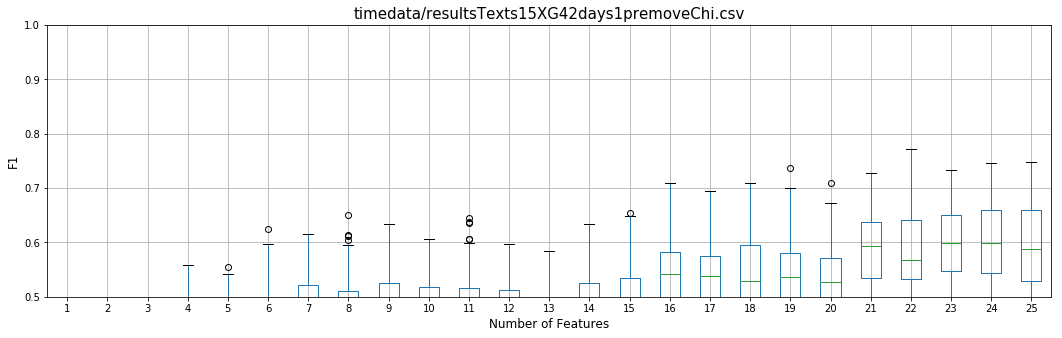

0.5327


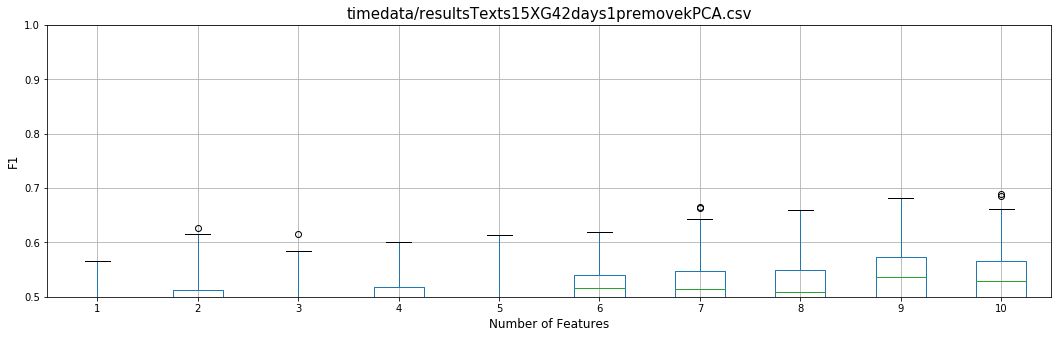

0.5309


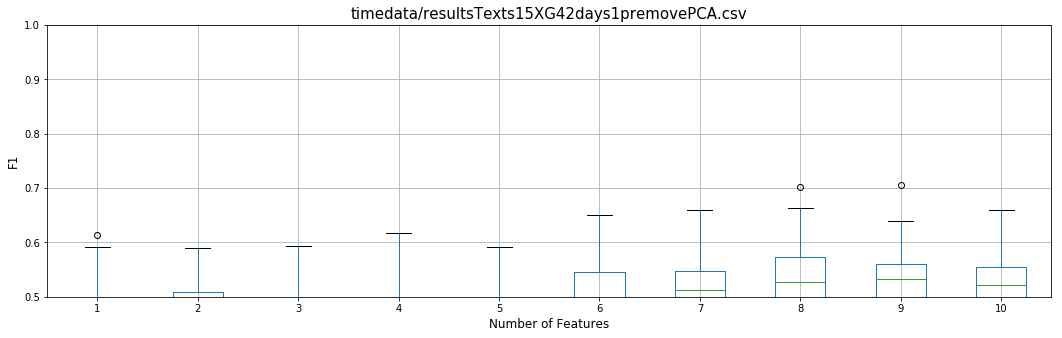

_________________________ndays = 56__________________________
0.7097


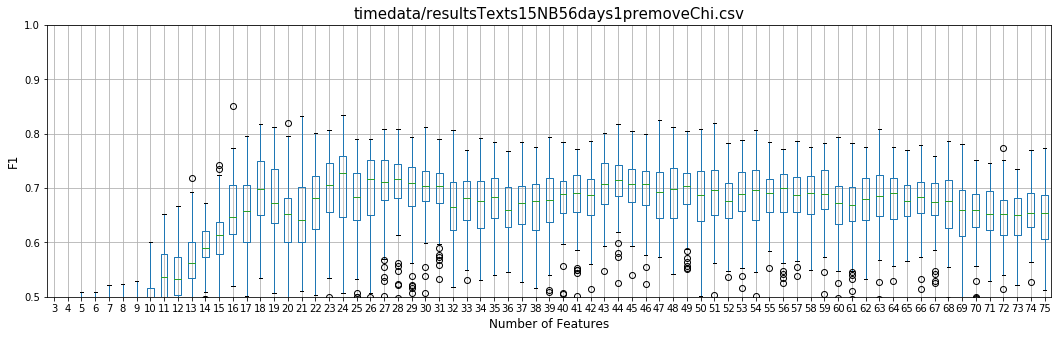

0.547


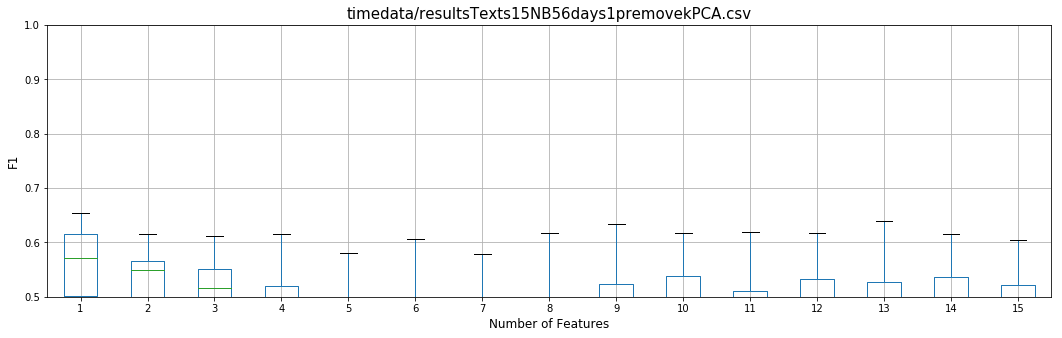

0.5612


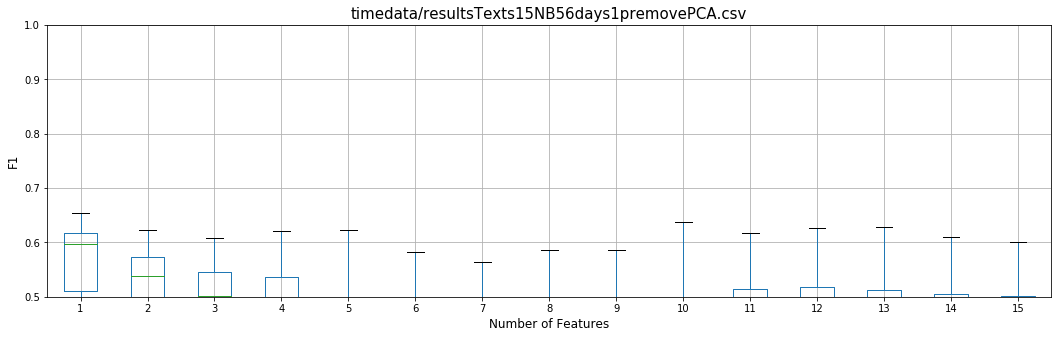

0.7096


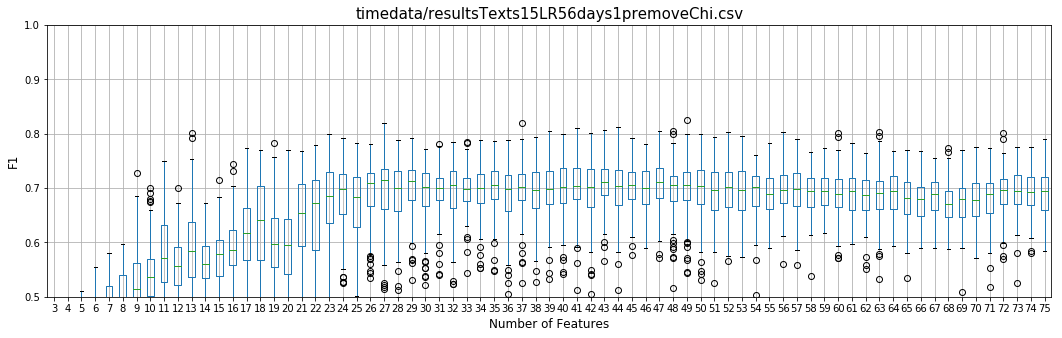

0.5175


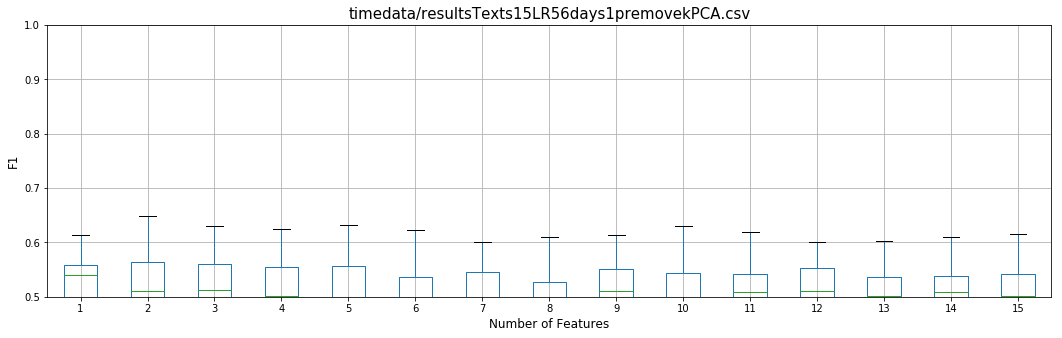

0.5143


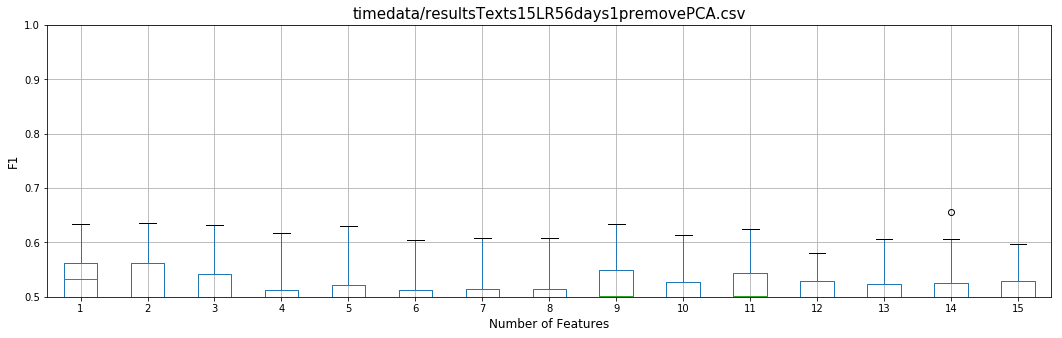

0.6073


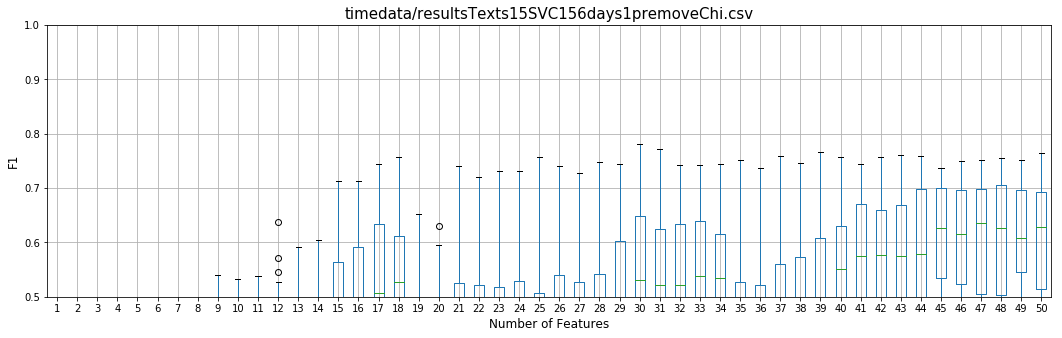

0.5731


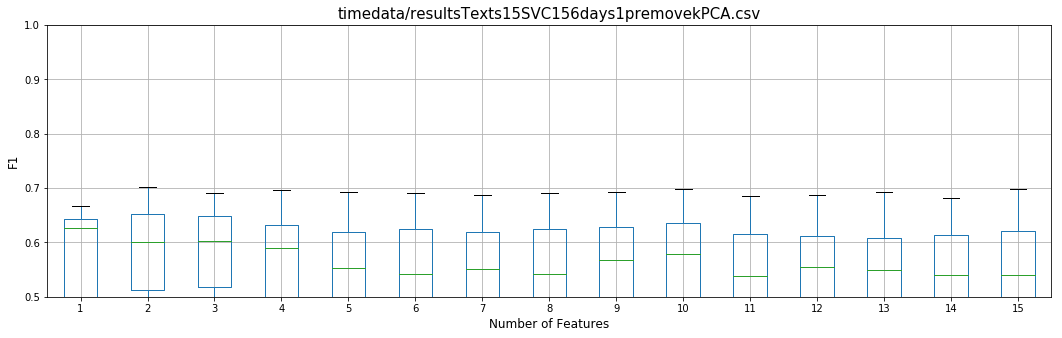

0.5205


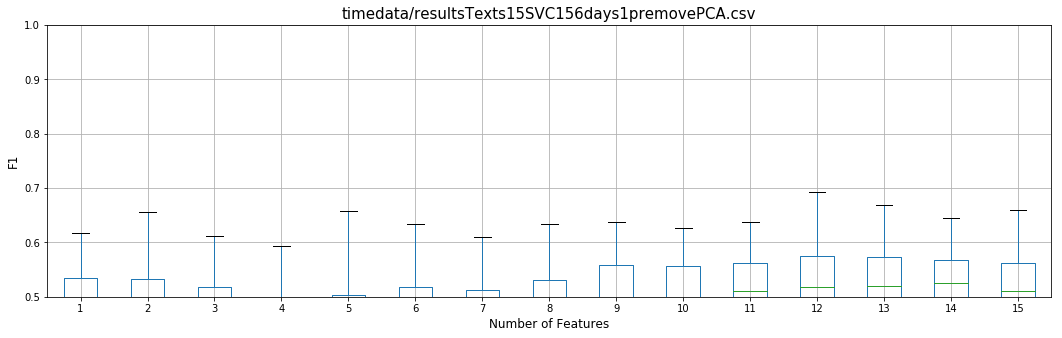

0.7137


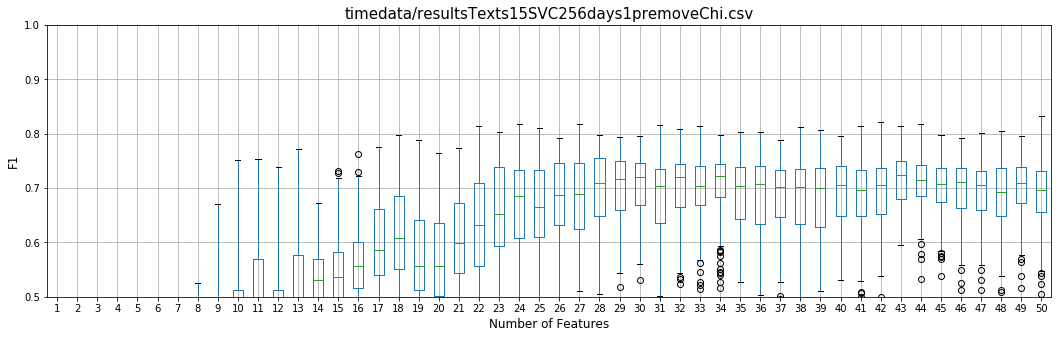

0.5814


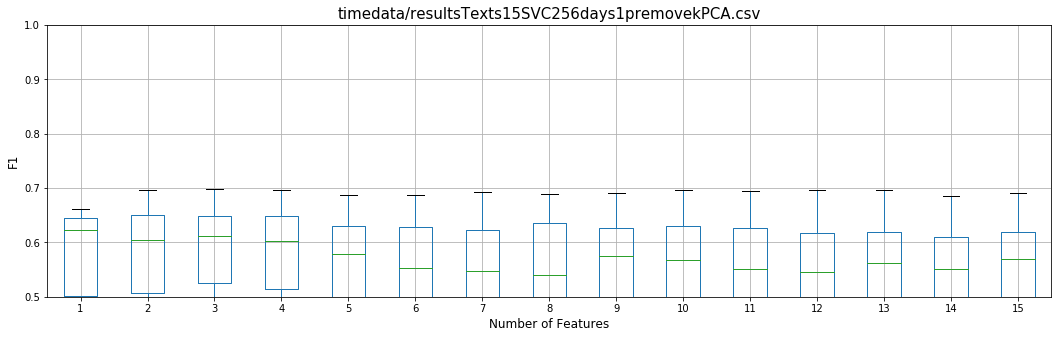

0.5457


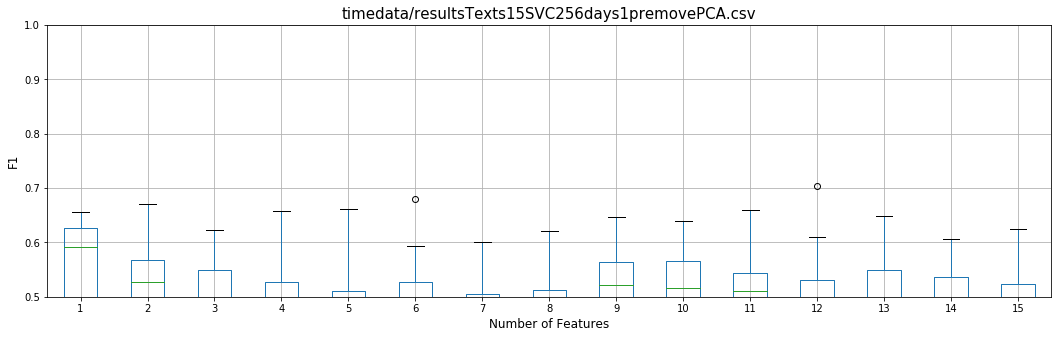

0.5989


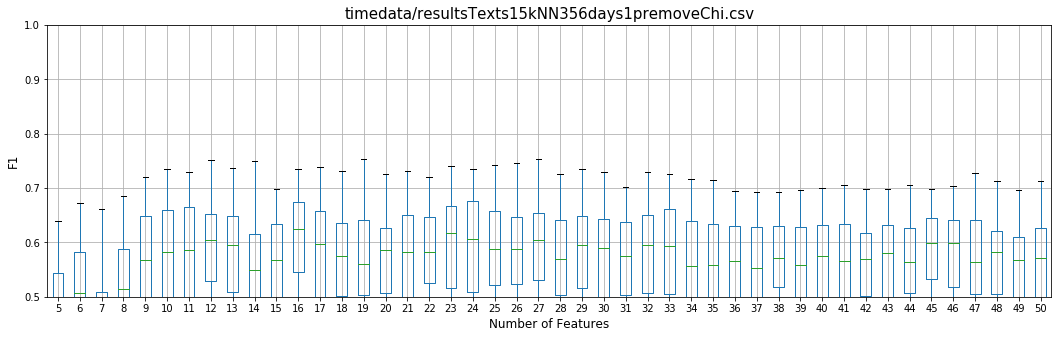

0.5503


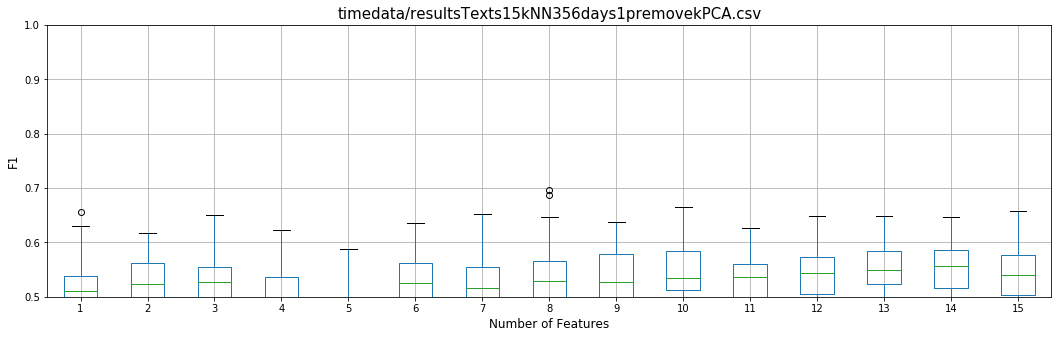

0.5573


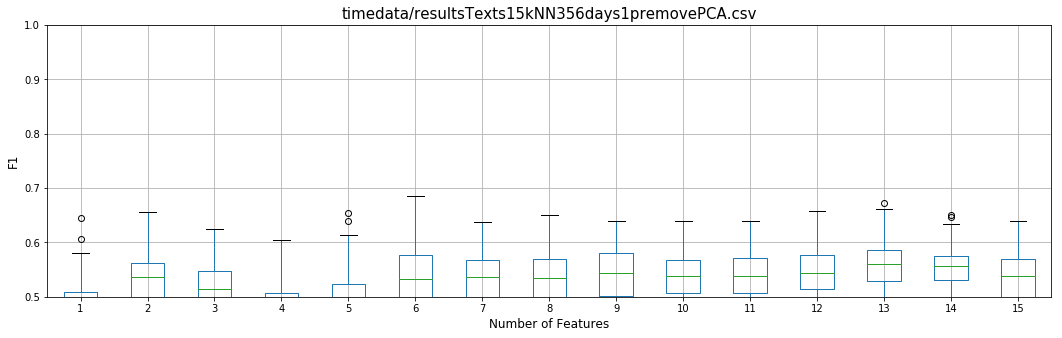

0.6034


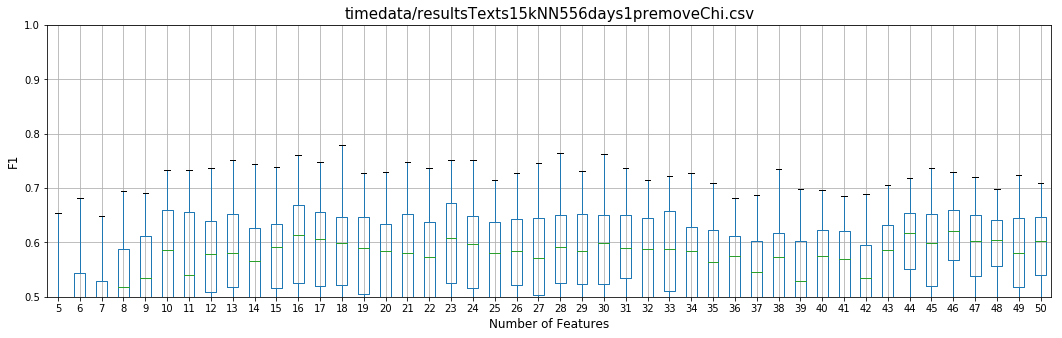

0.5494


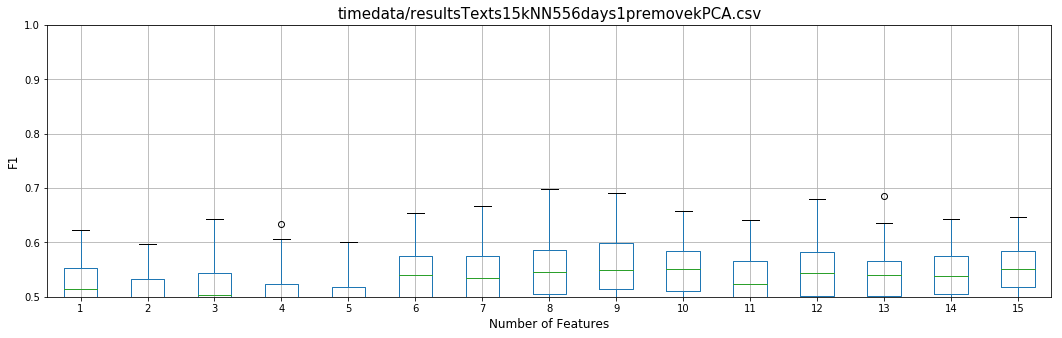

0.5612


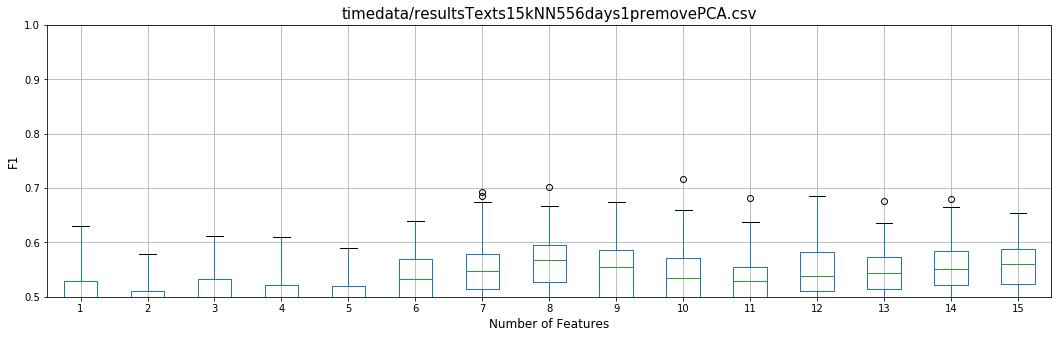

0.5917


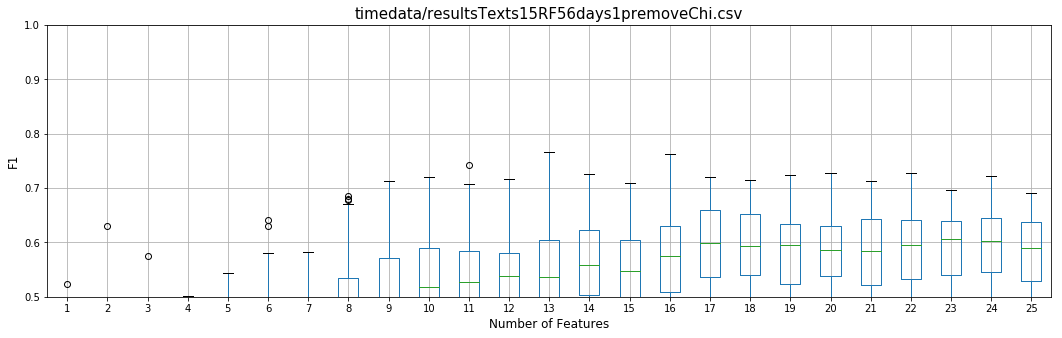

0.5184


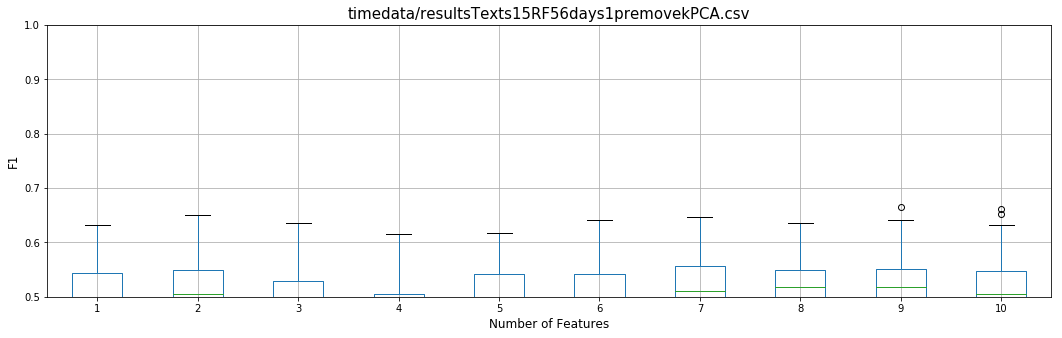

0.5328


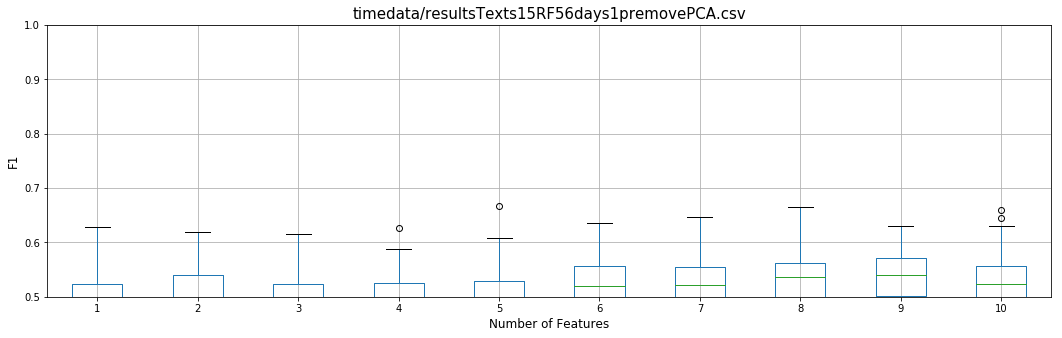

0.6077


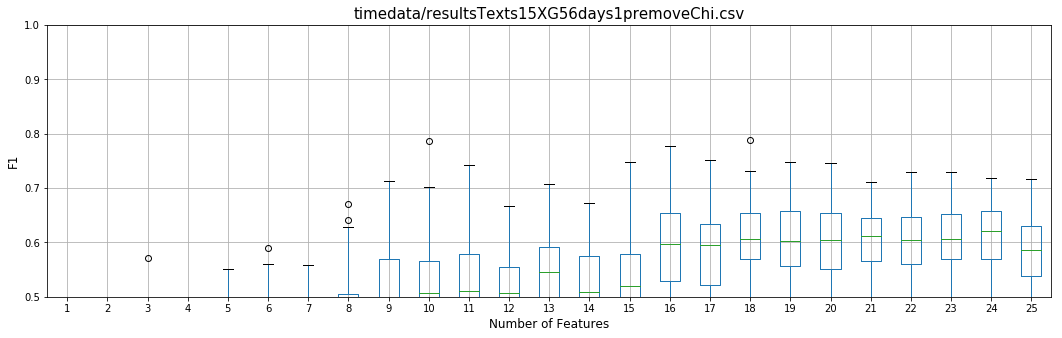

0.567


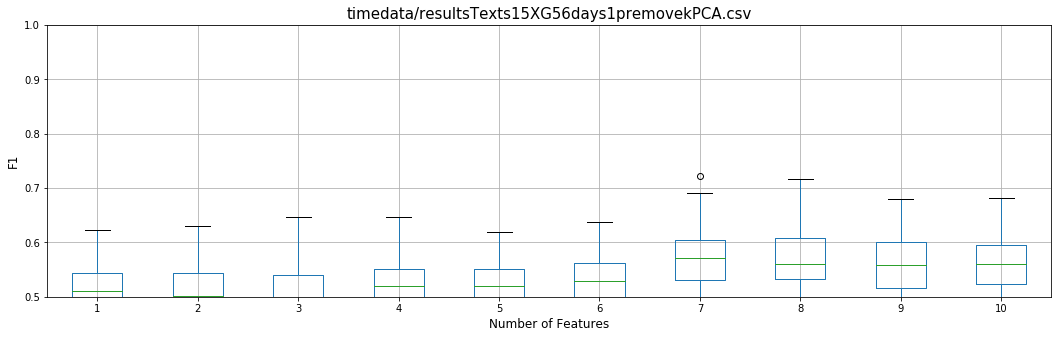

0.5716


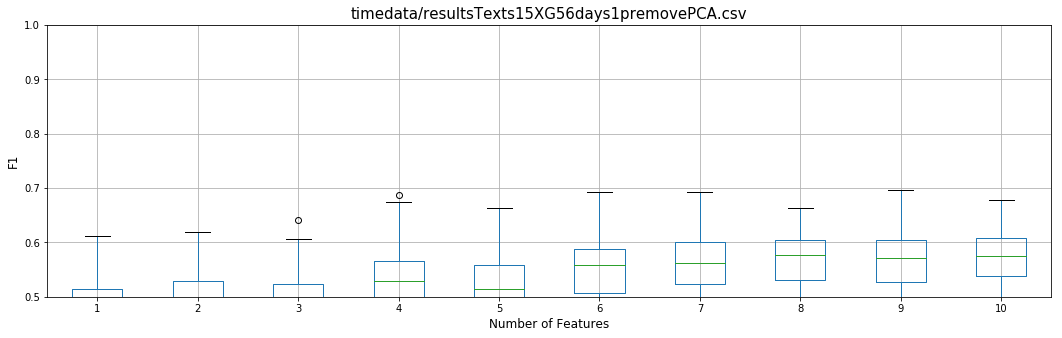

_________________________ndays = 182__________________________
0.7467


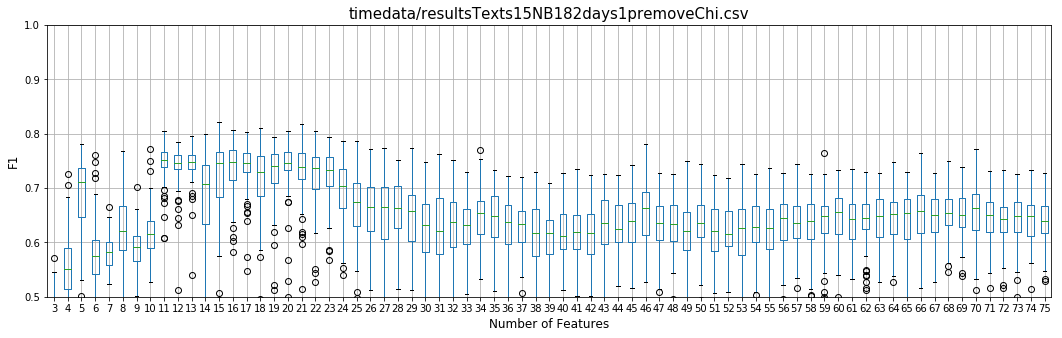

0.6095


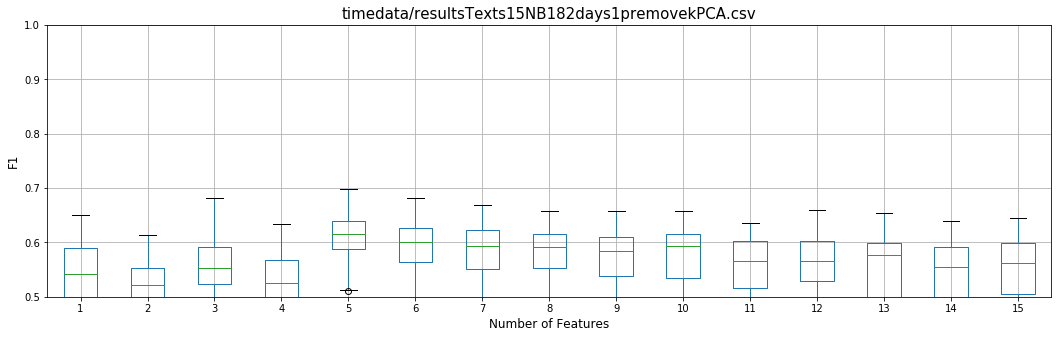

0.6115


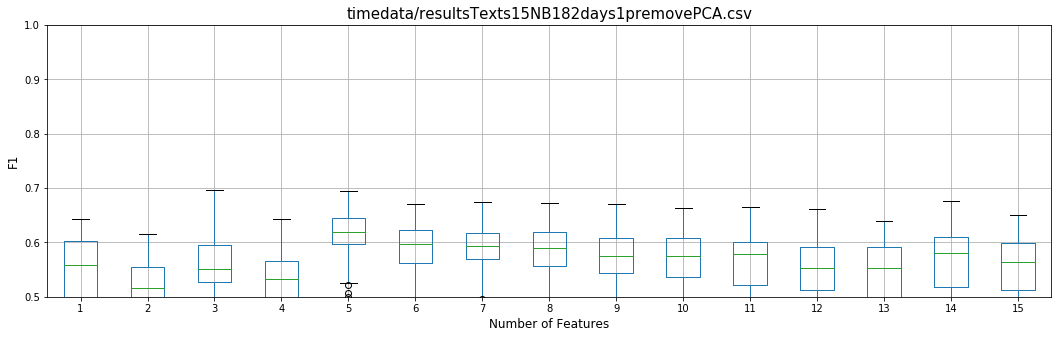

0.7812


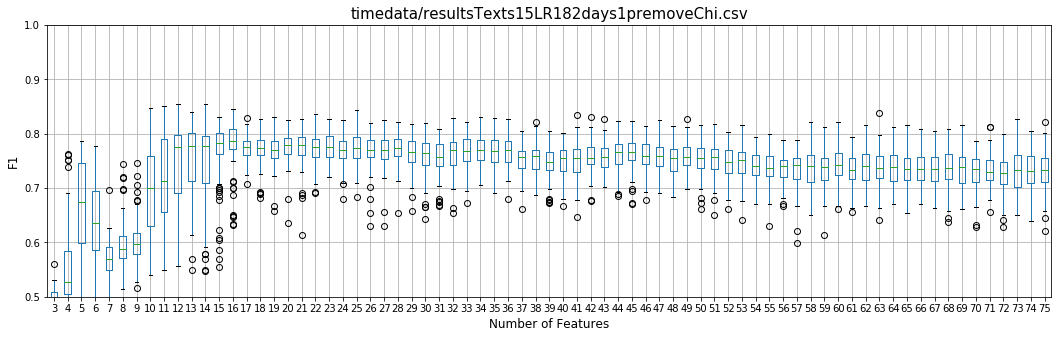

0.5232


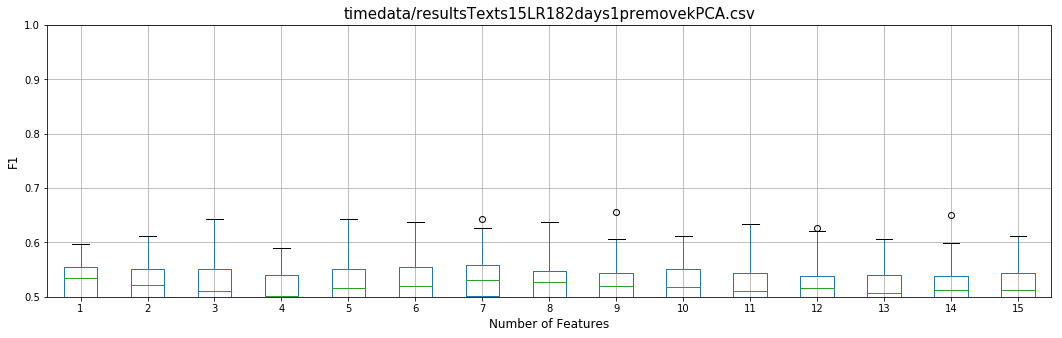

0.5642


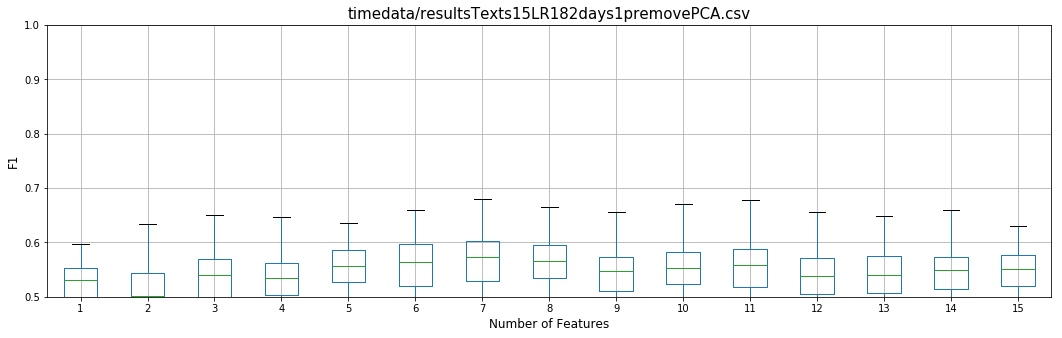

0.7383


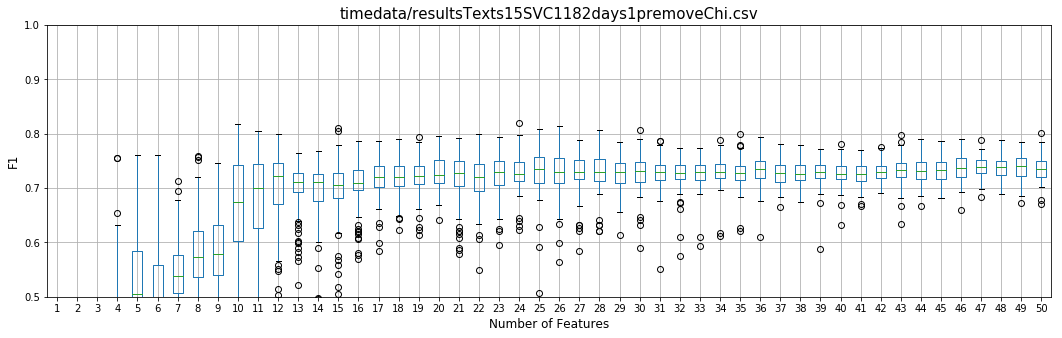

0.6182


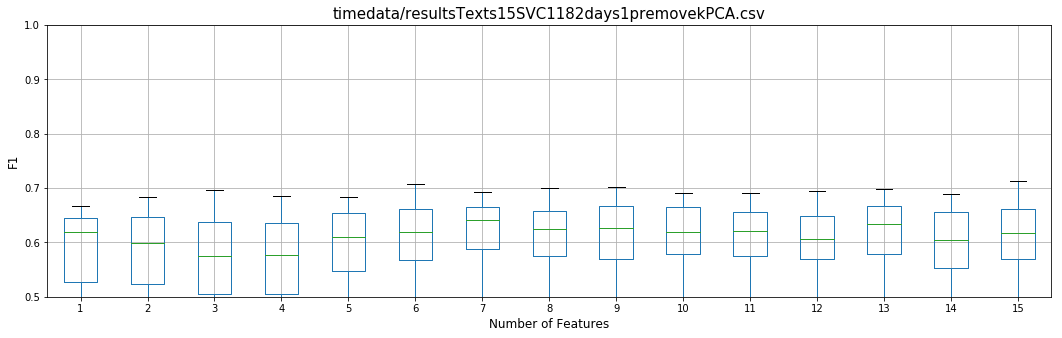

0.5485


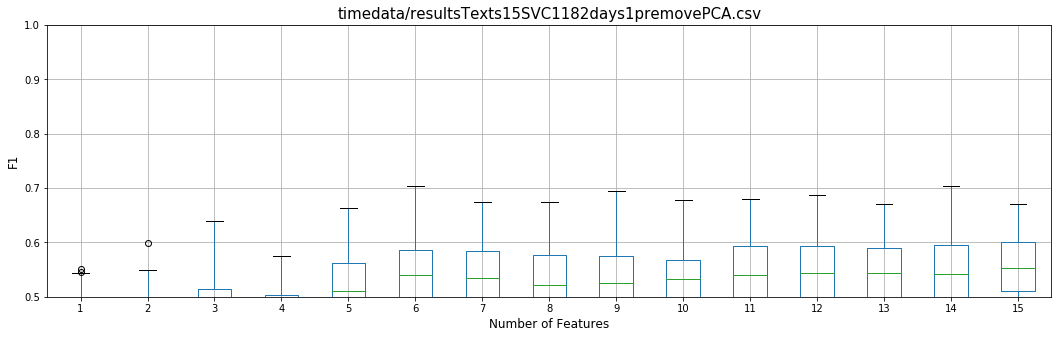

0.7691


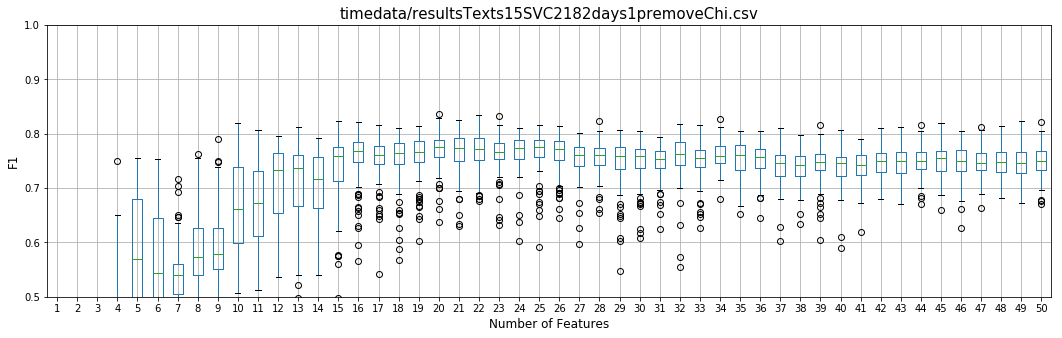

0.6115


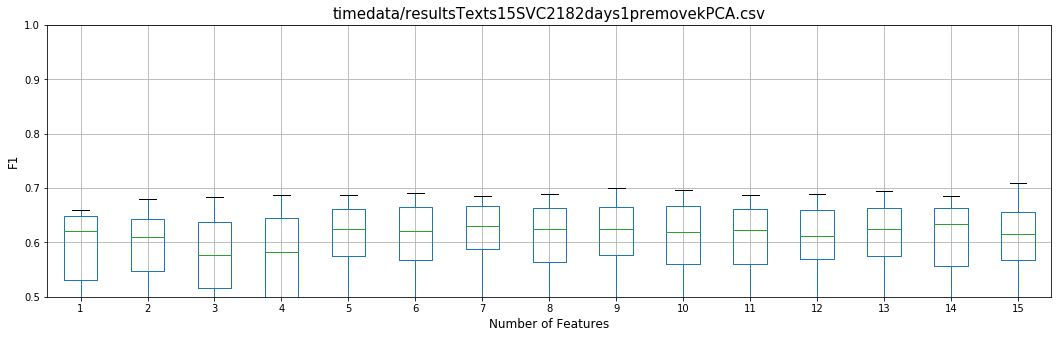

0.5669


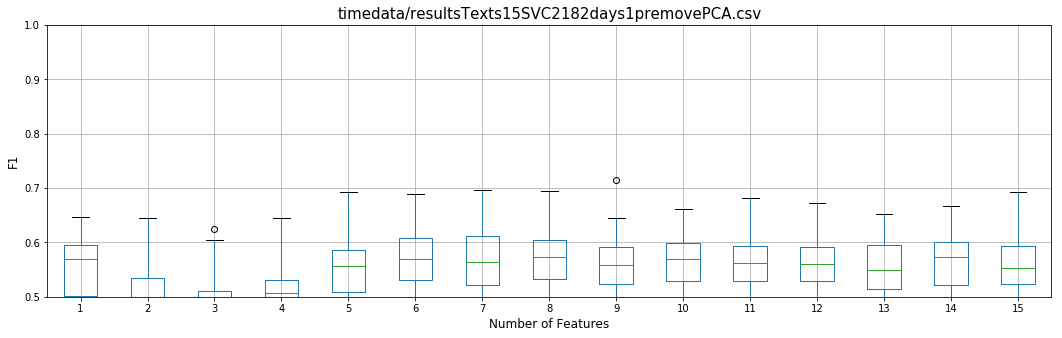

0.6639


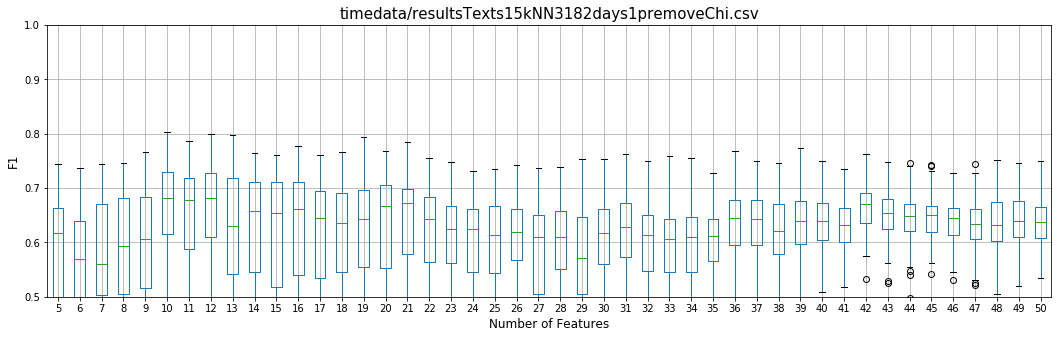

0.5568


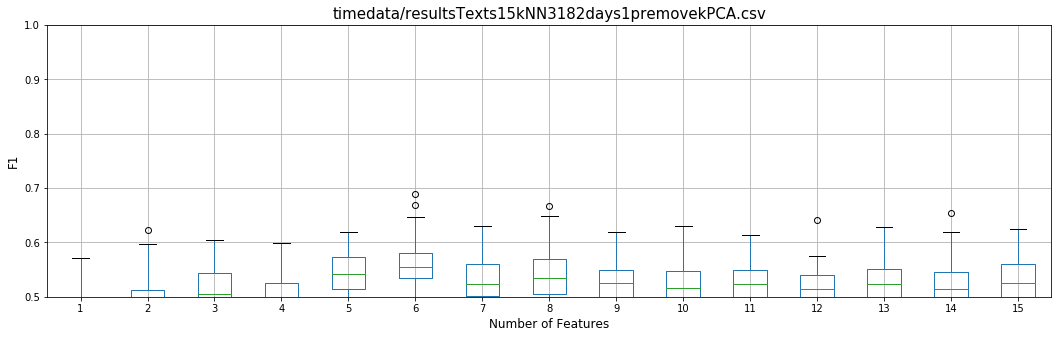

0.5421


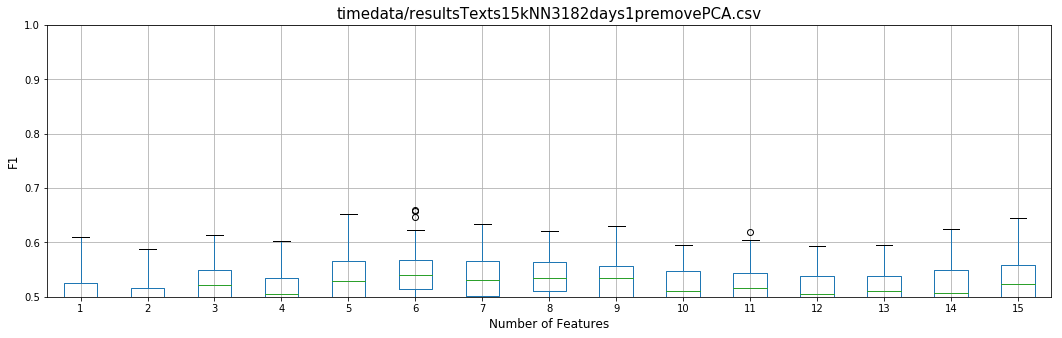

0.6745


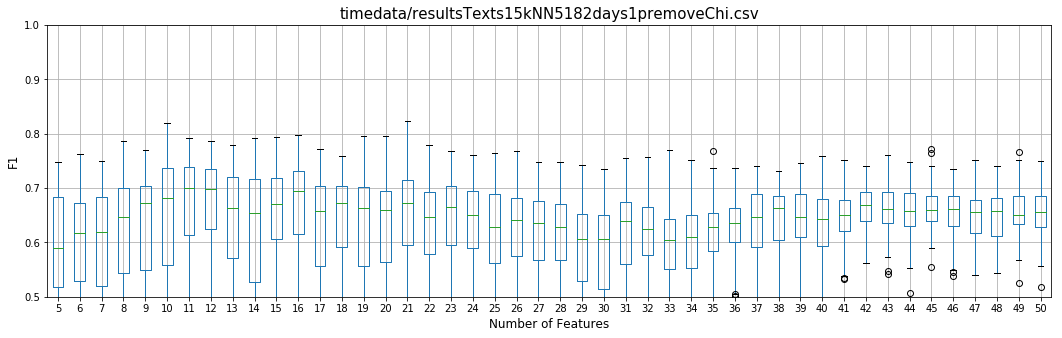

0.5664


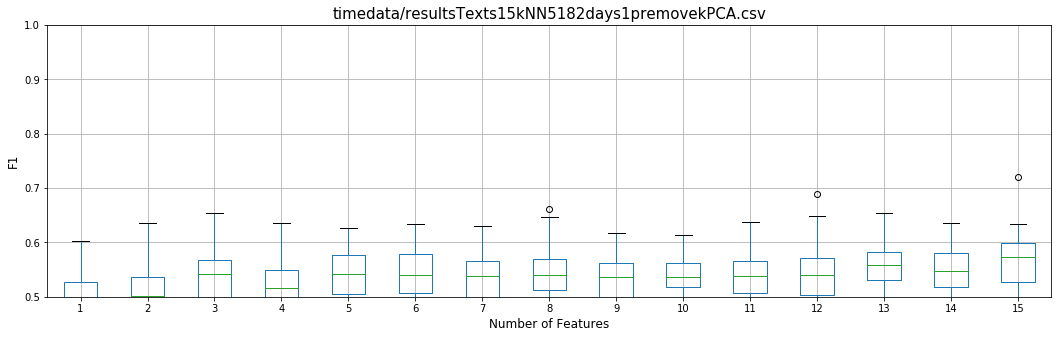

0.5744


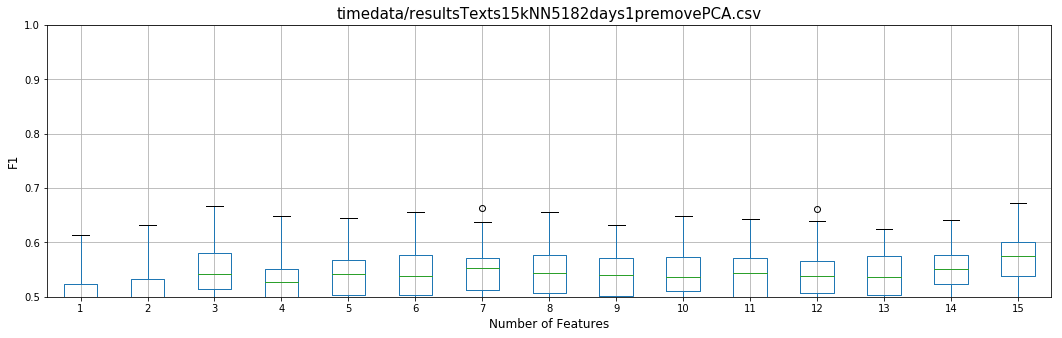

0.6743


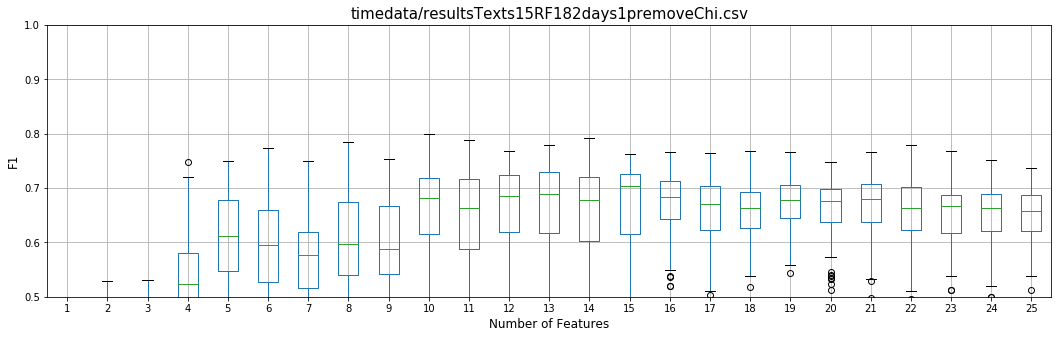

0.5243


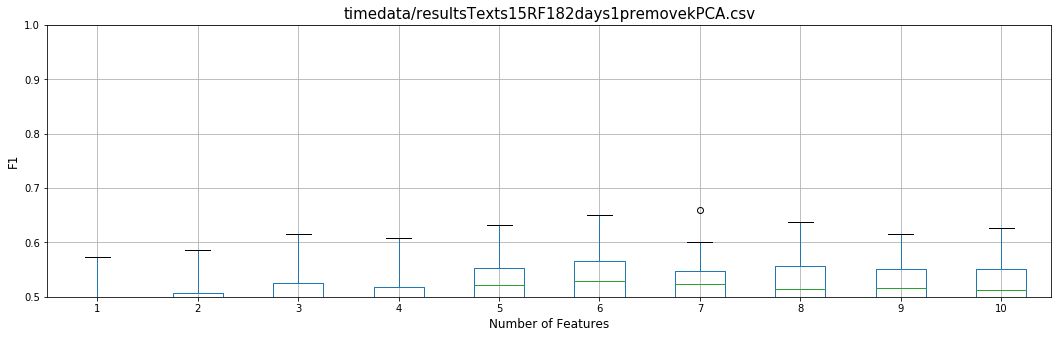

0.5496


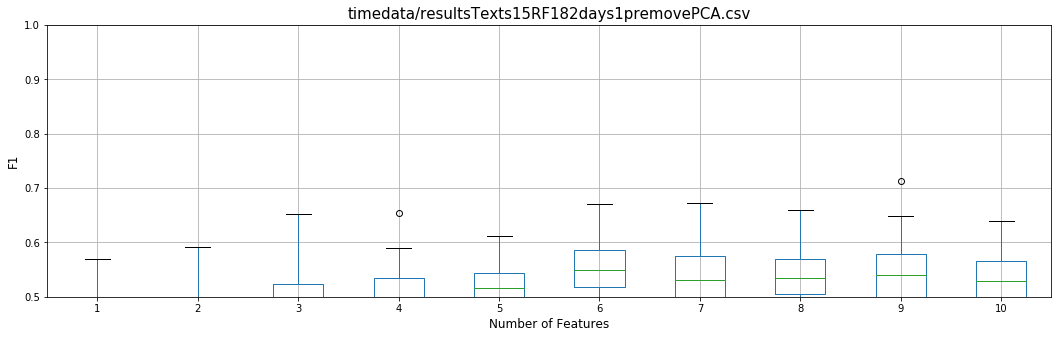

0.7117


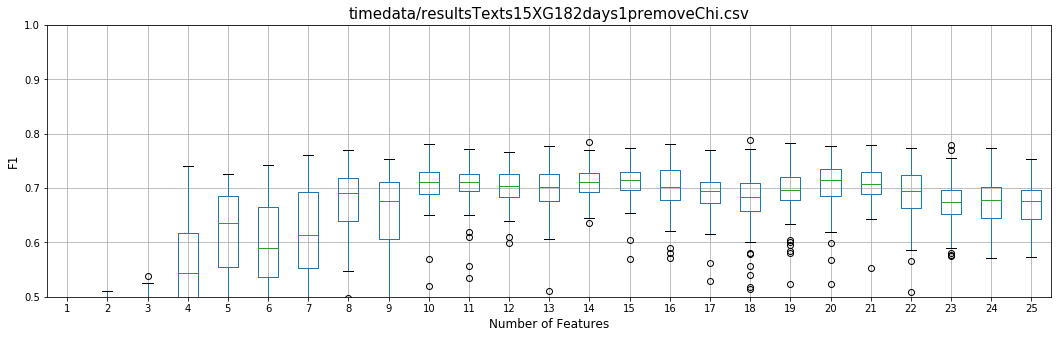

0.5443


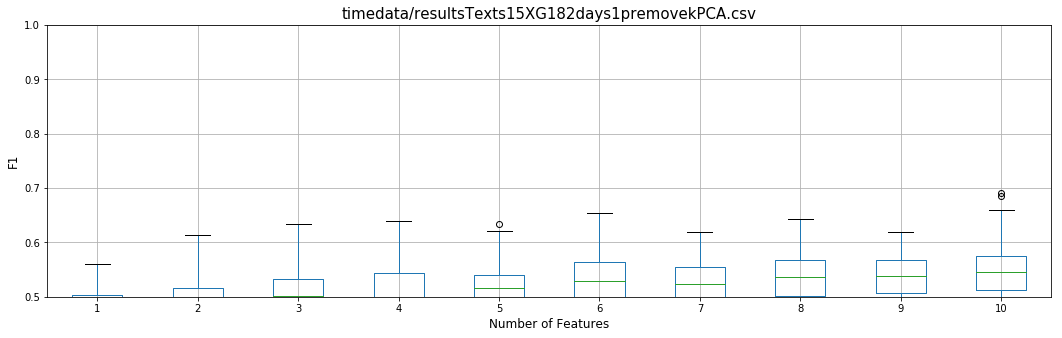

0.5795


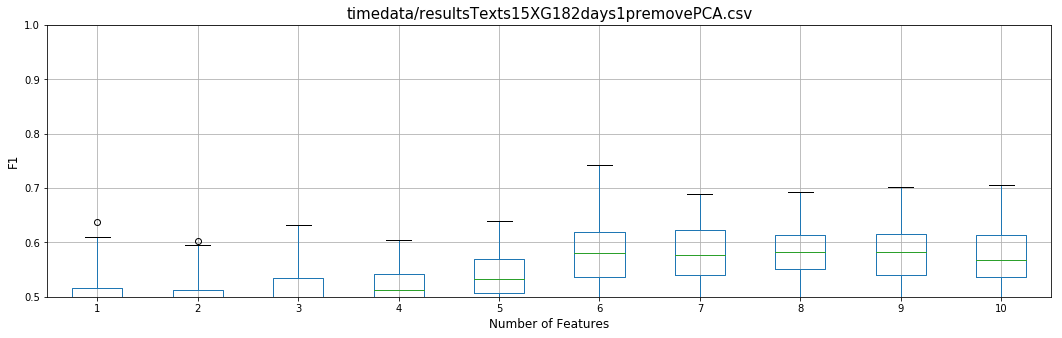

_________________________ndays = 364__________________________
0.7342


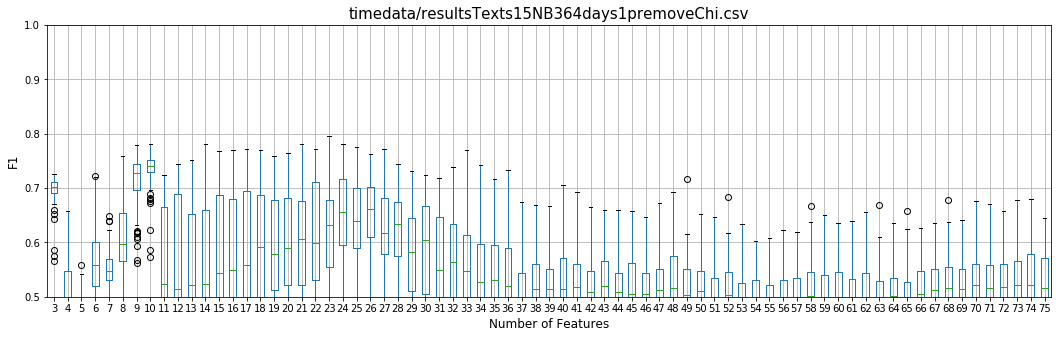

0.6121


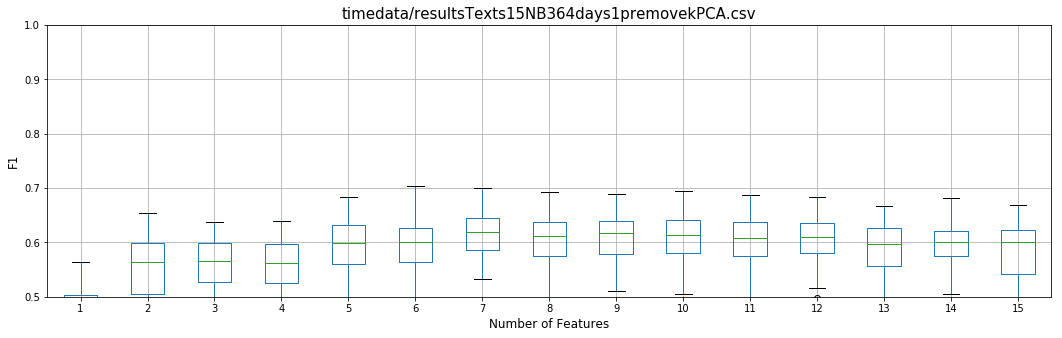

0.6214


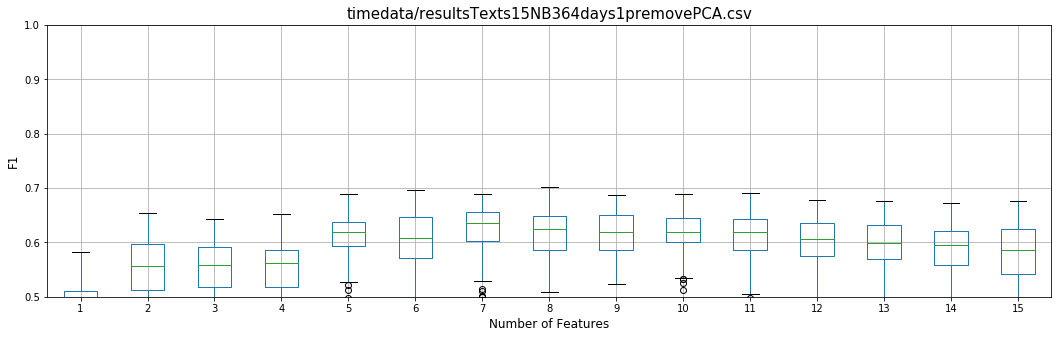

0.7659


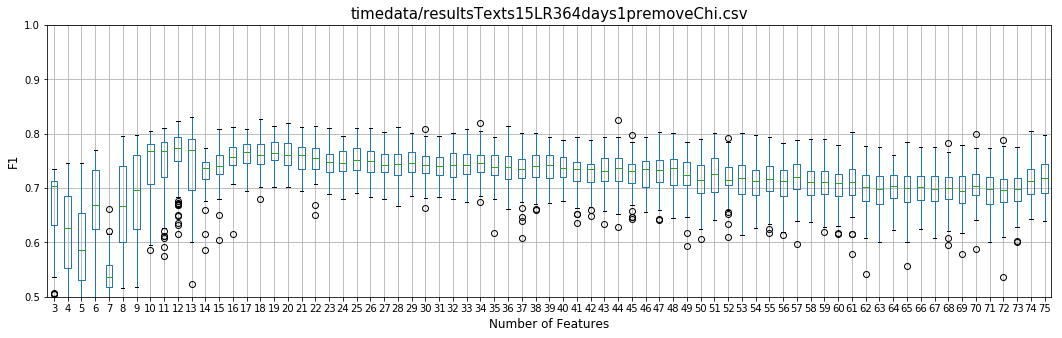

0.529


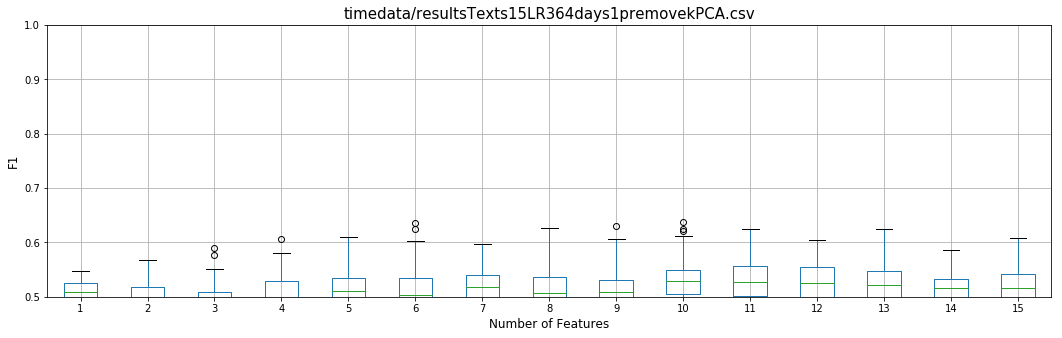

0.5756


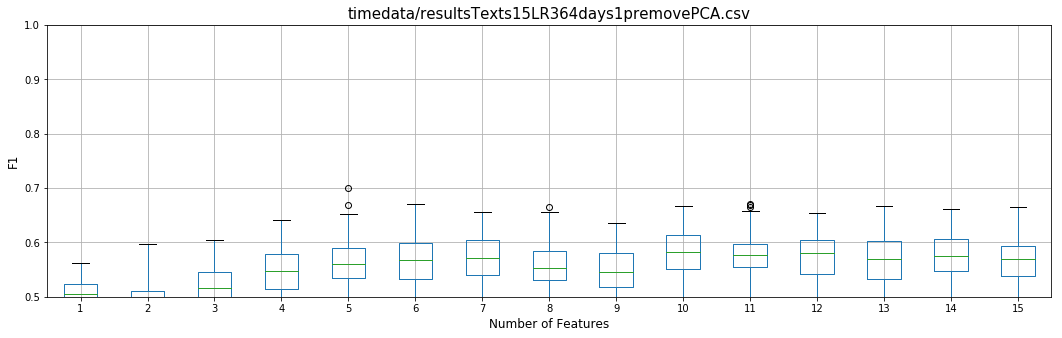

0.7211


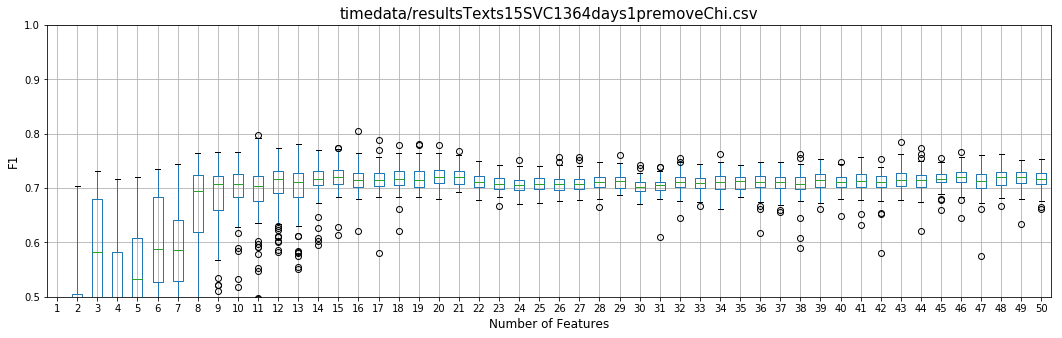

0.5759


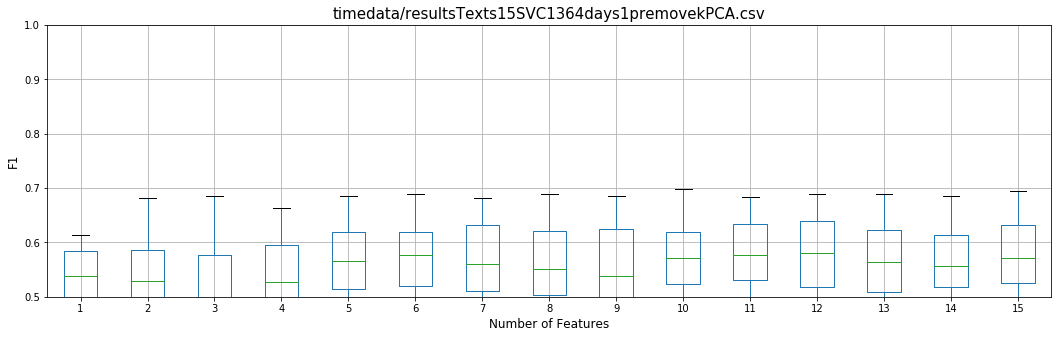

0.5627


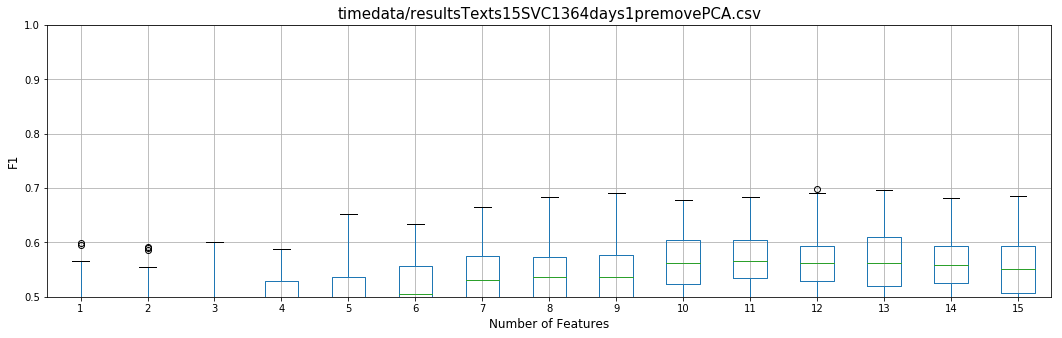

0.7501


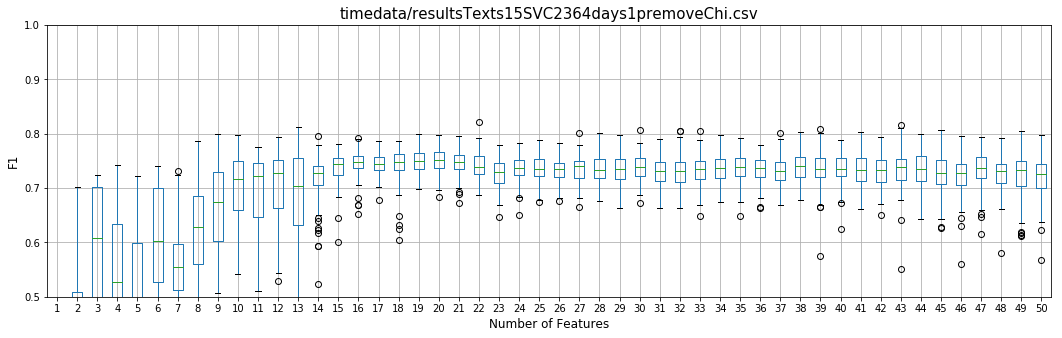

0.5777


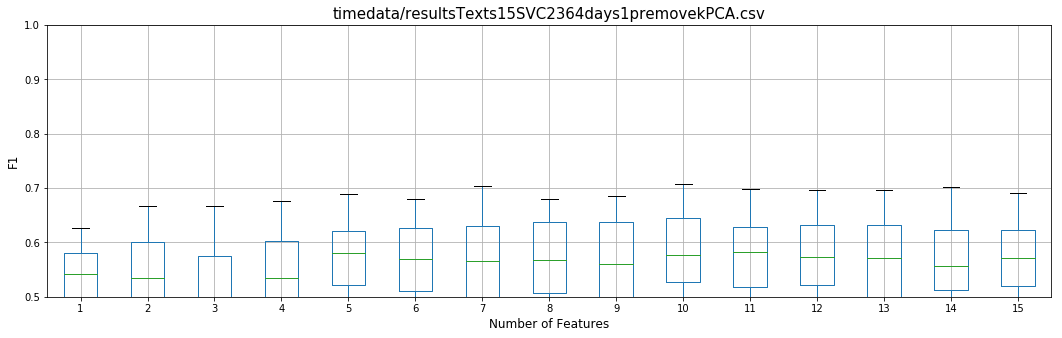

0.5847


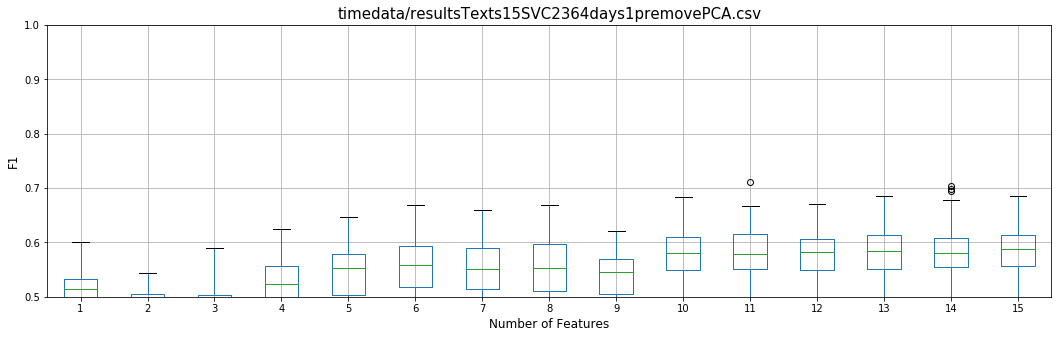

0.6545


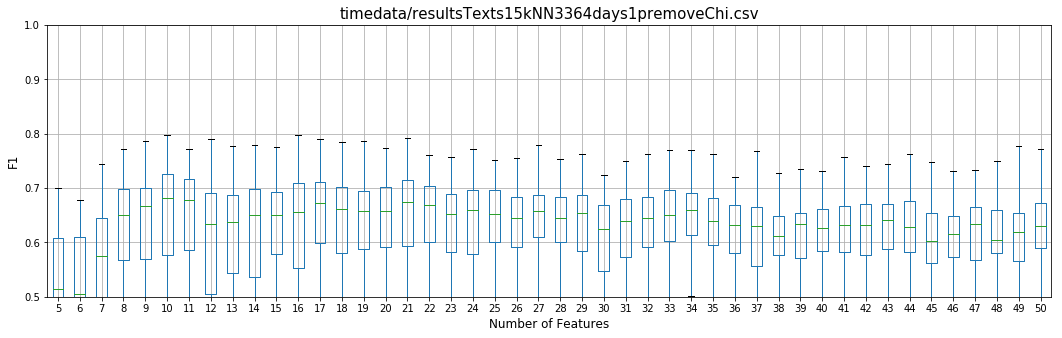

0.5494


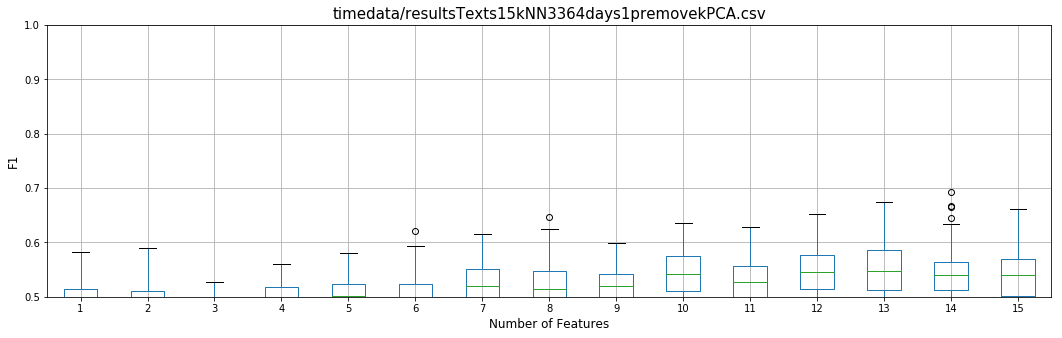

0.5542


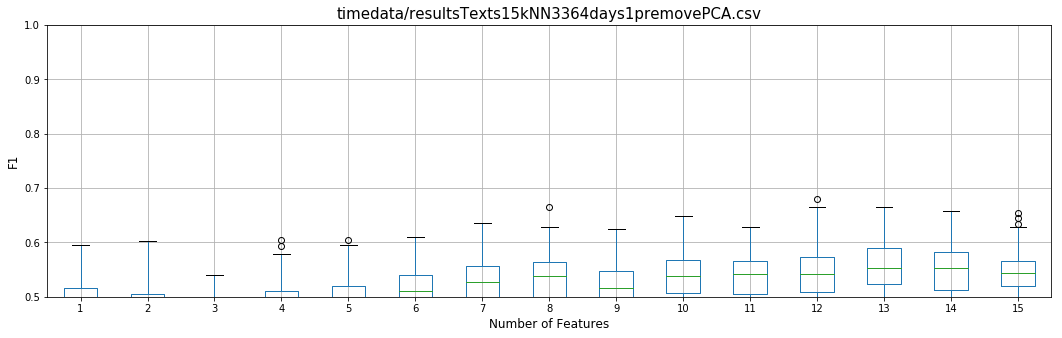

0.6944


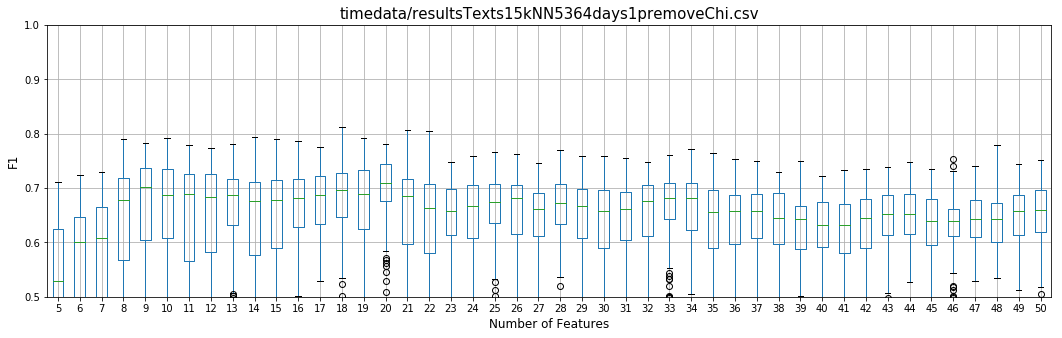

0.574


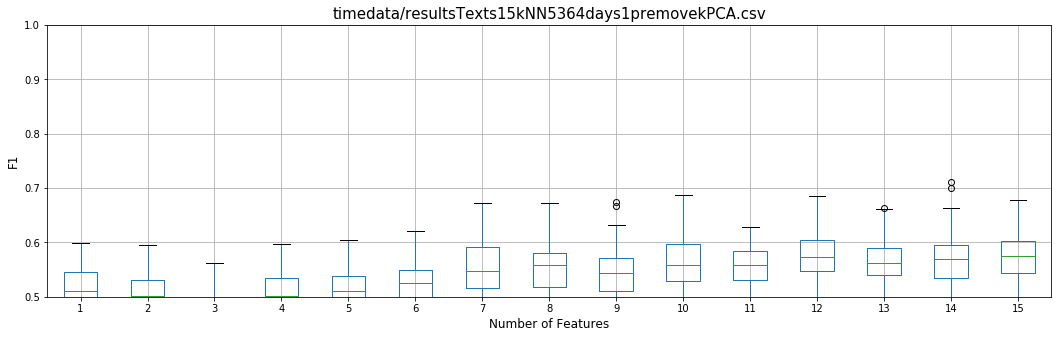

0.5762


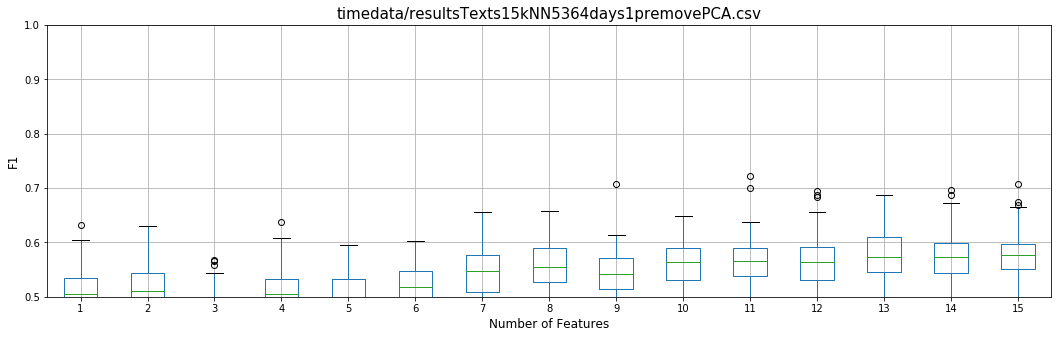

0.6925


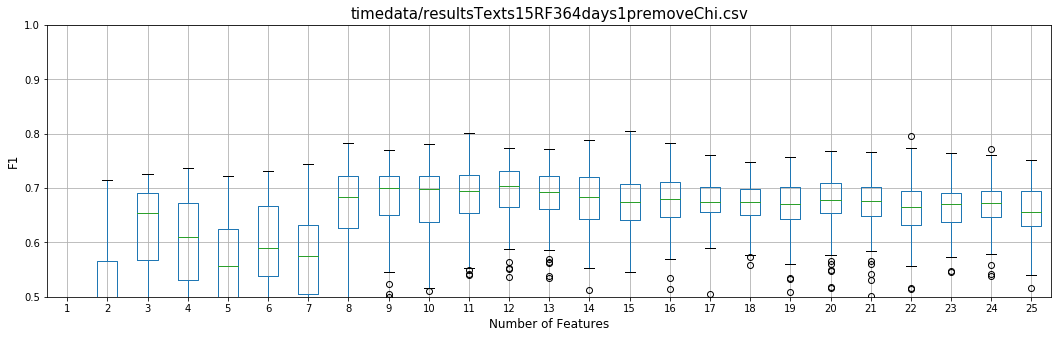

0.5327


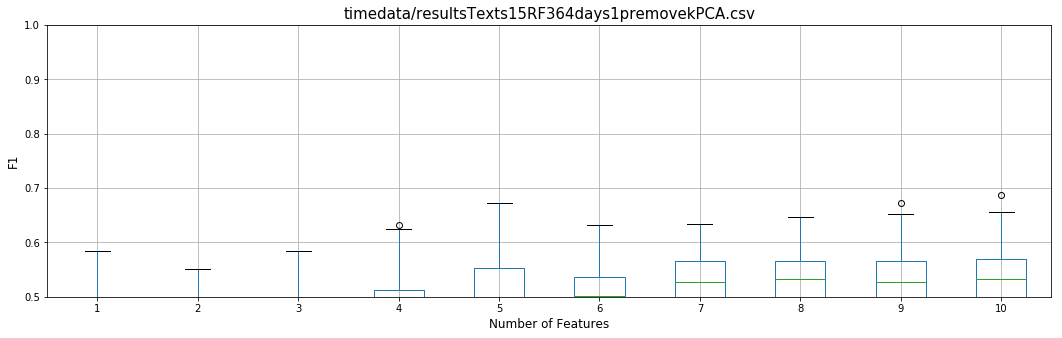

0.5495


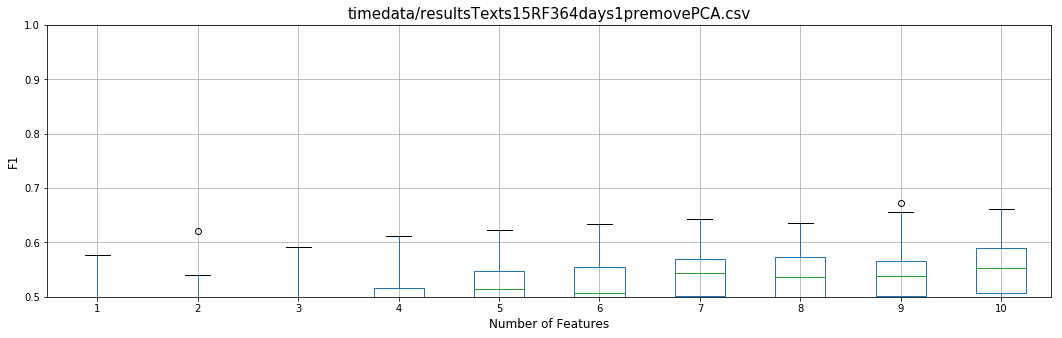

0.7351


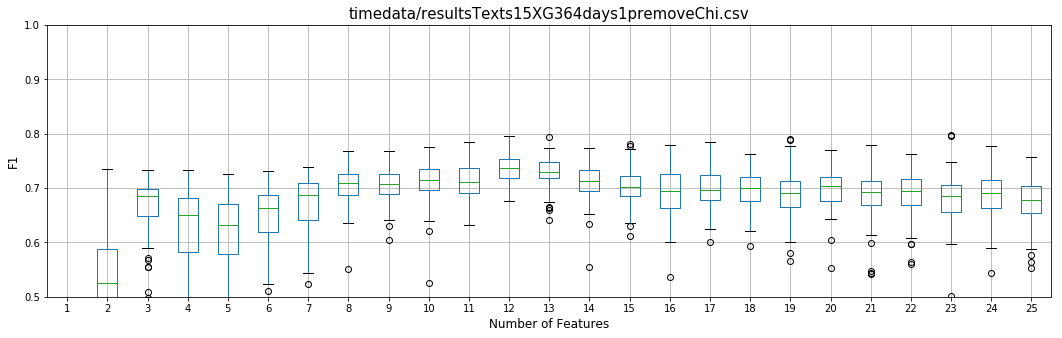

0.5548


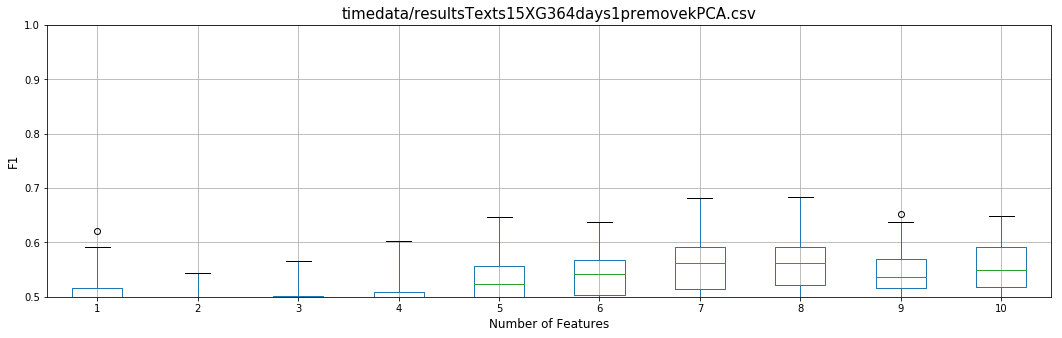

0.54


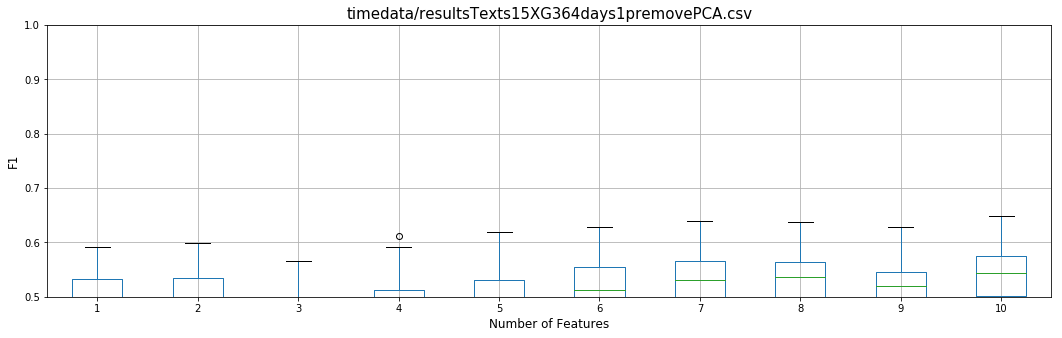

_________________________ndays = All__________________________
timedata/resultsTexts15NBAlldays1premoveChi.csv
0.6169


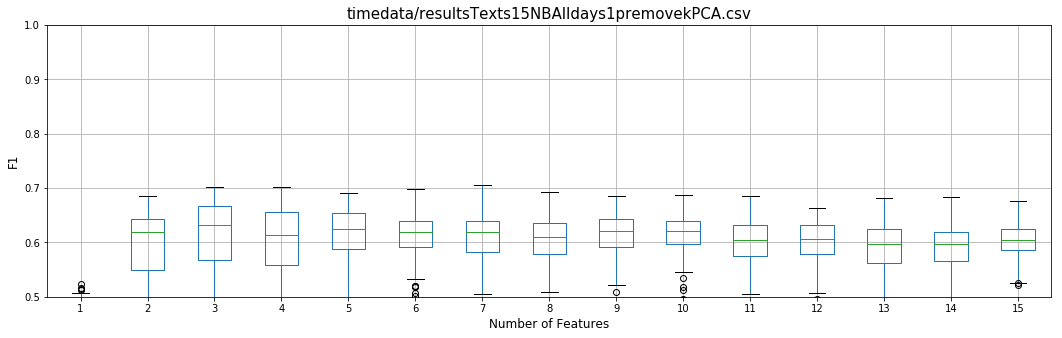

0.6292


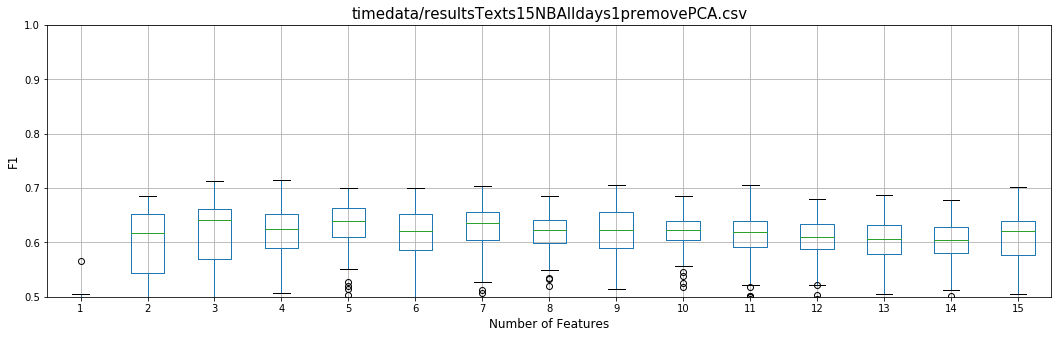

0.7699


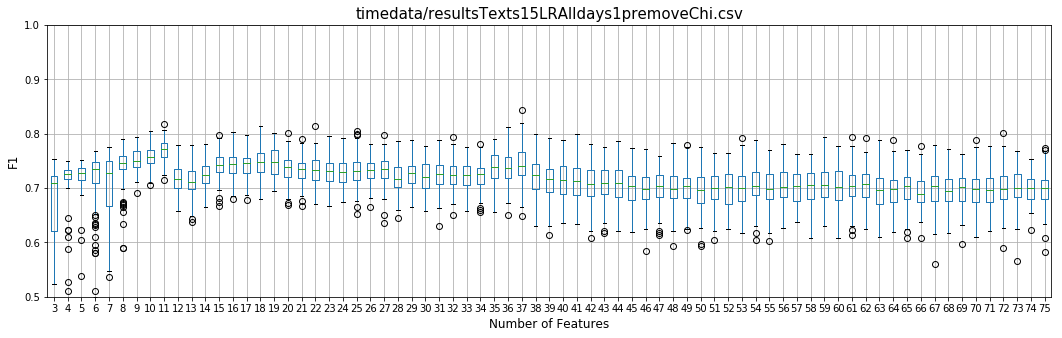

0.5309


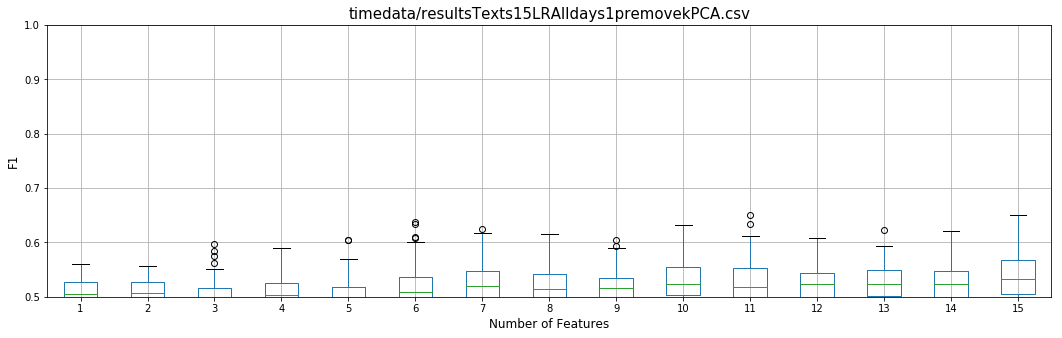

0.5948


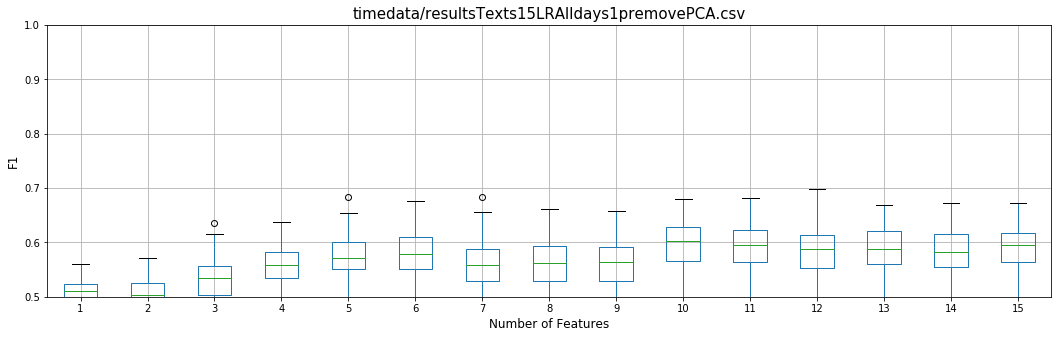

0.3169


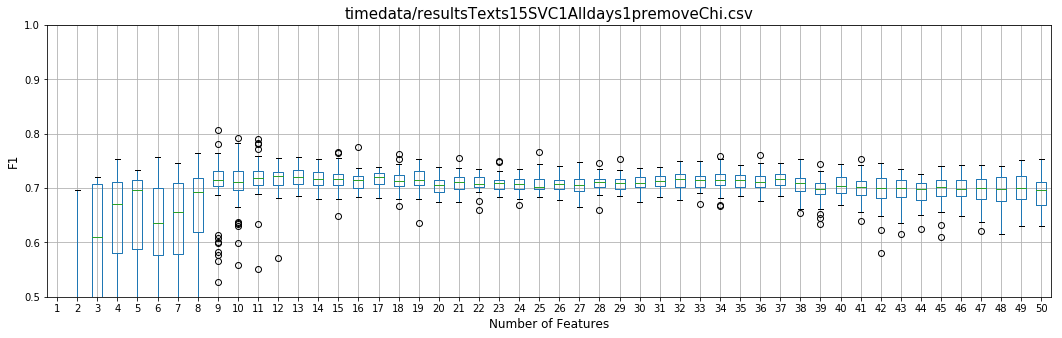

0.593


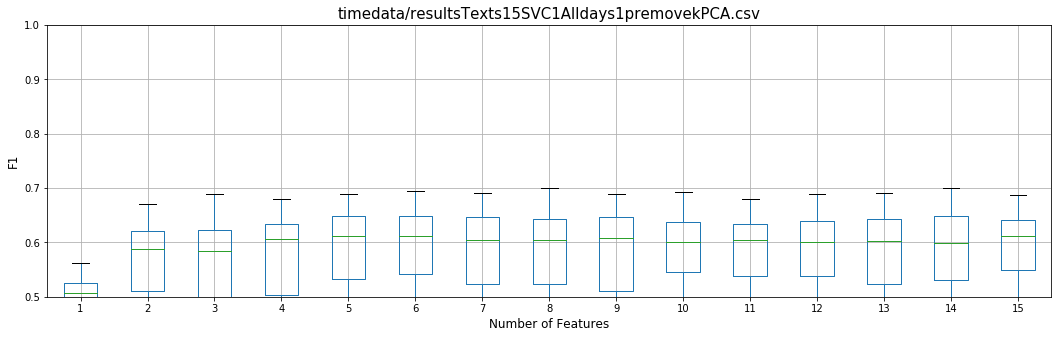

0.5531


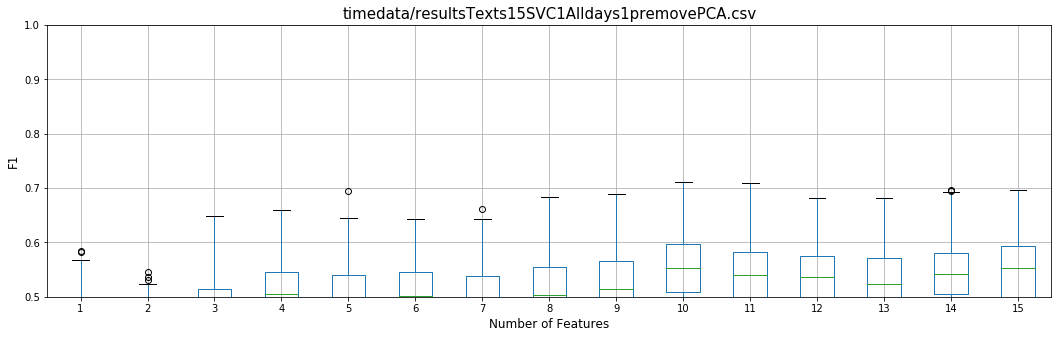

timedata/resultsTexts15SVC2Alldays1premoveChi.csv
0.594


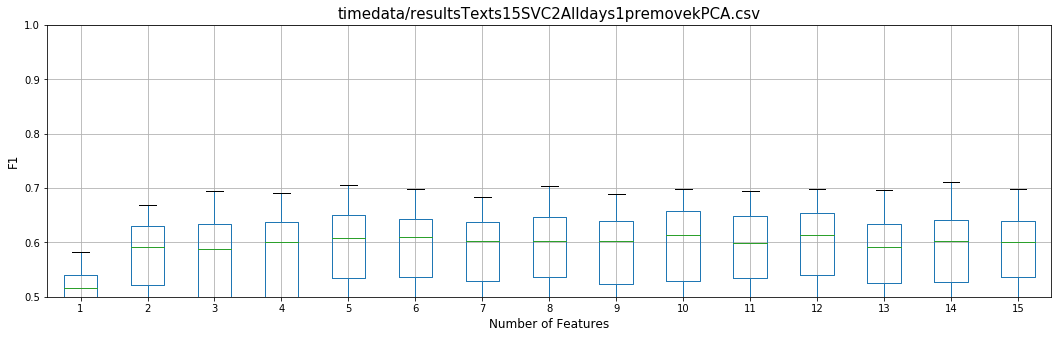

0.5978


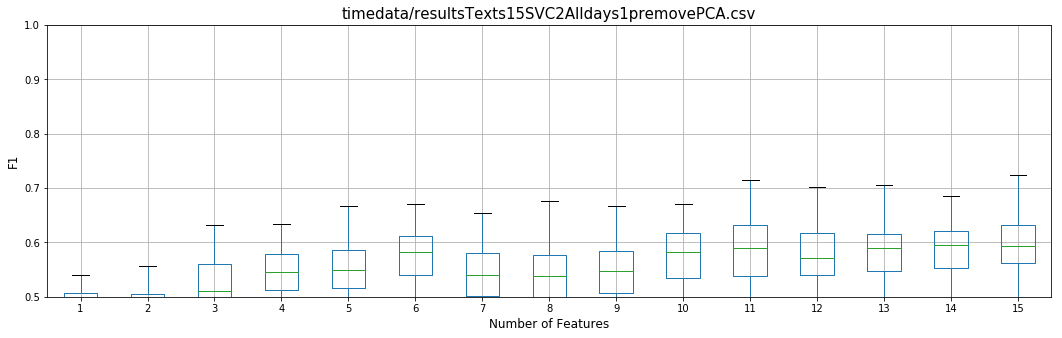

0.6815


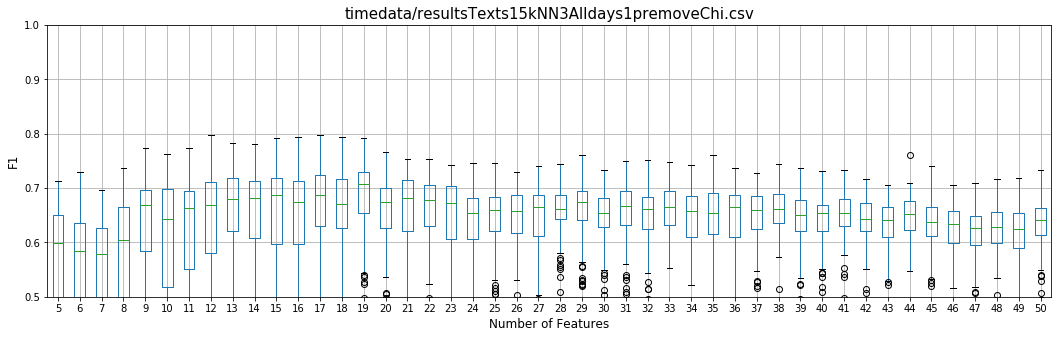

0.5566


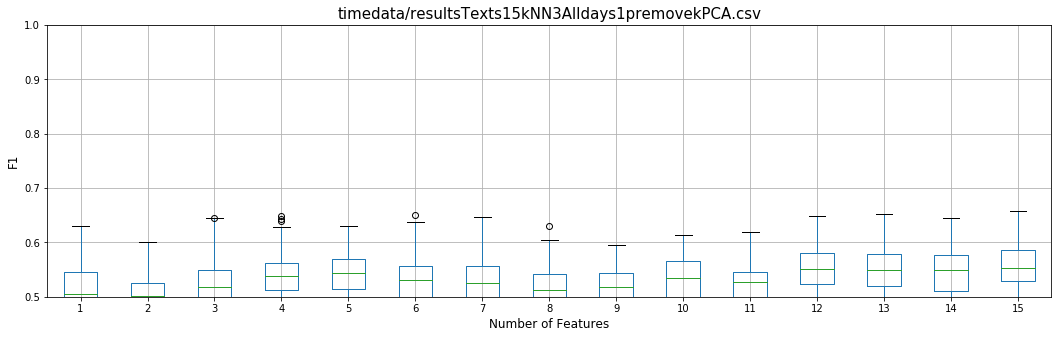

0.5511


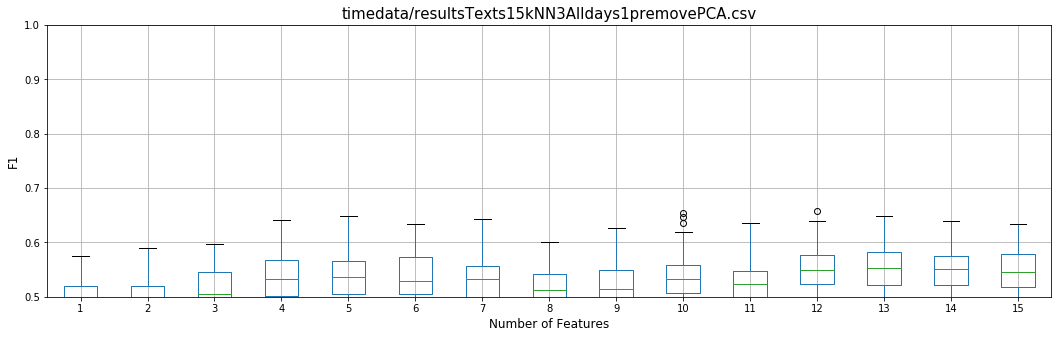

0.6939


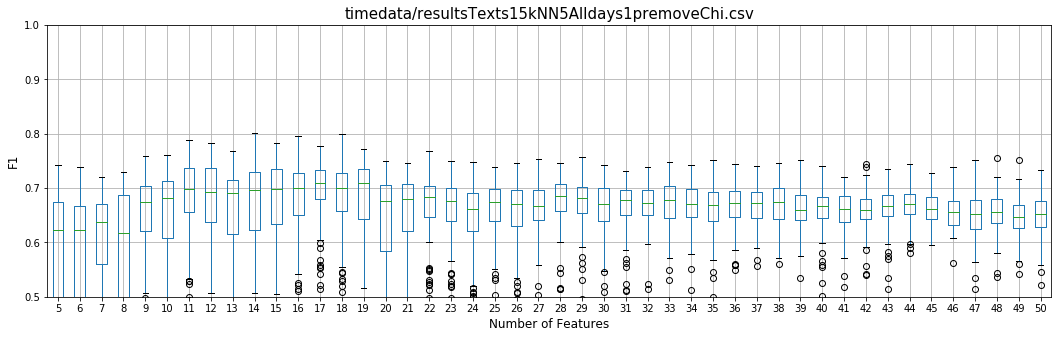

0.5873


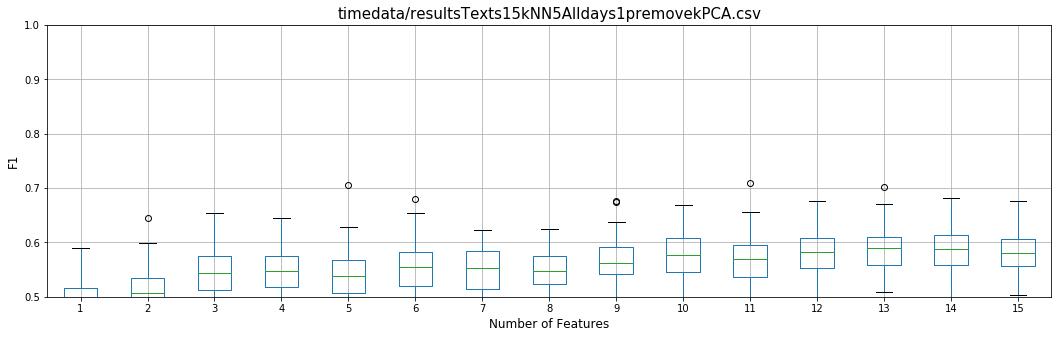

0.5875


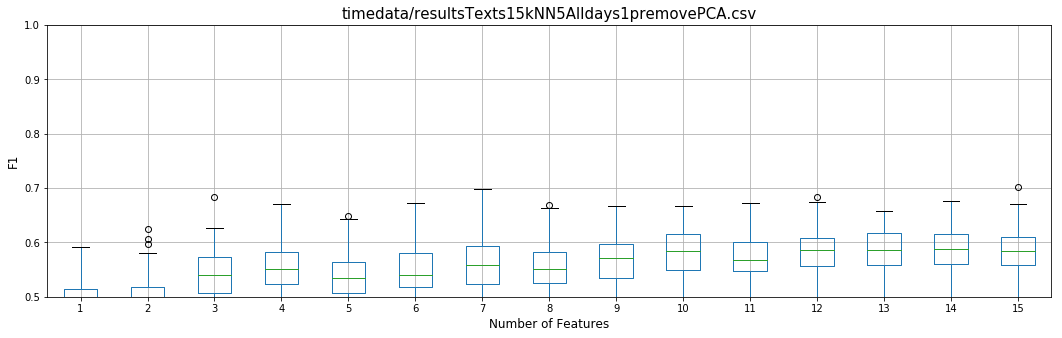

0.6919


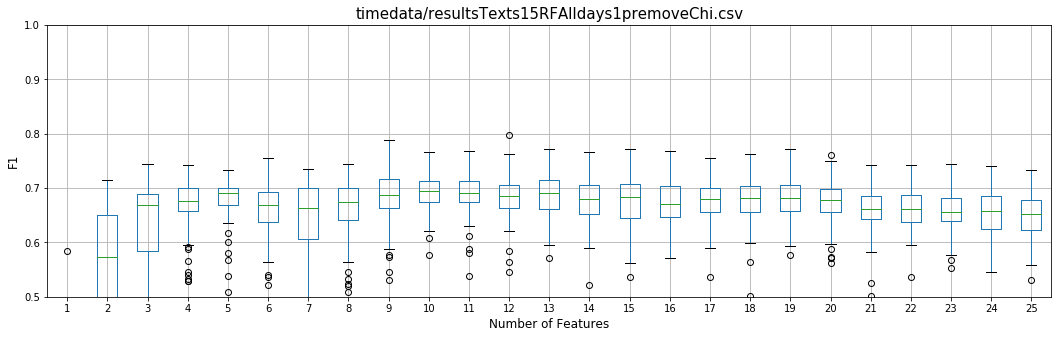

0.5401


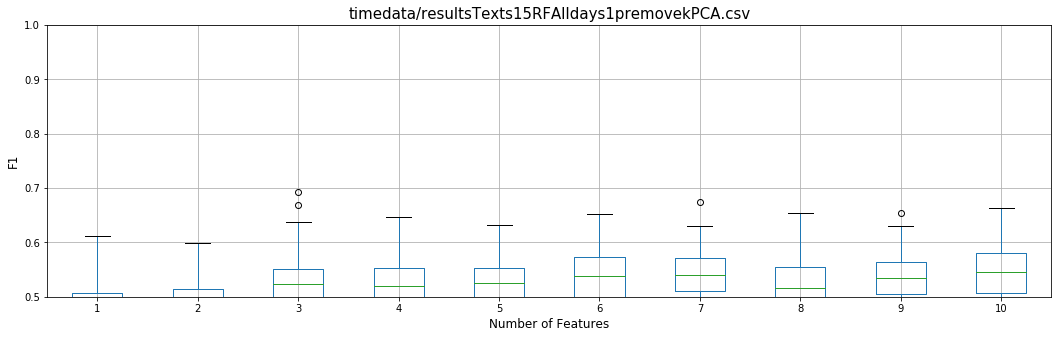

0.5523


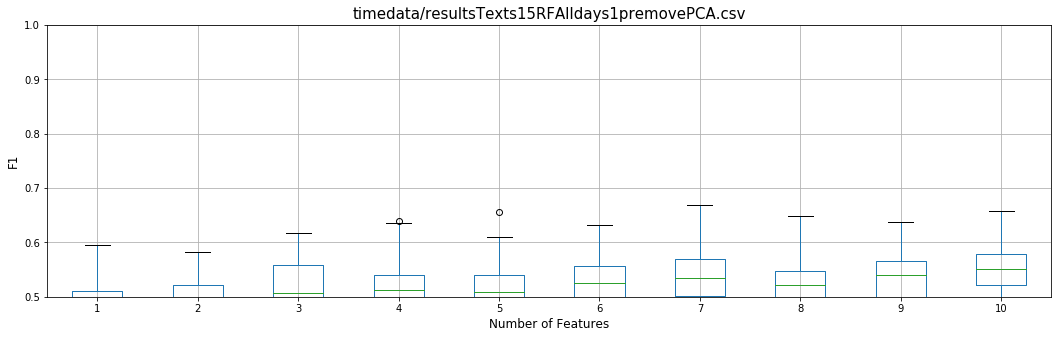

0.7064


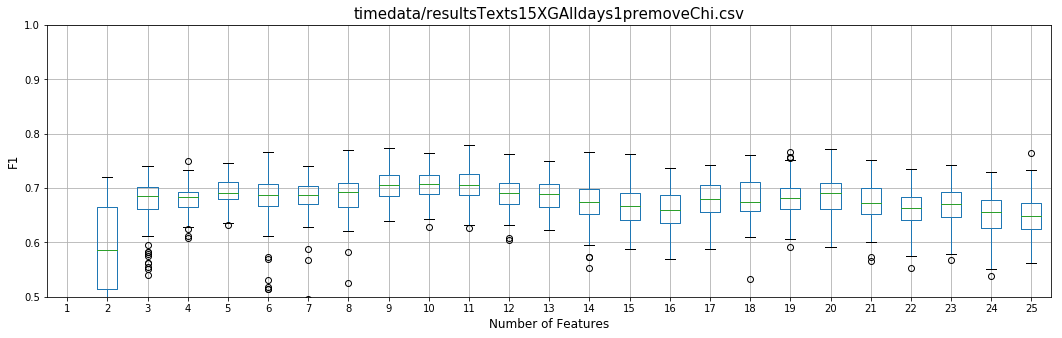

0.5529


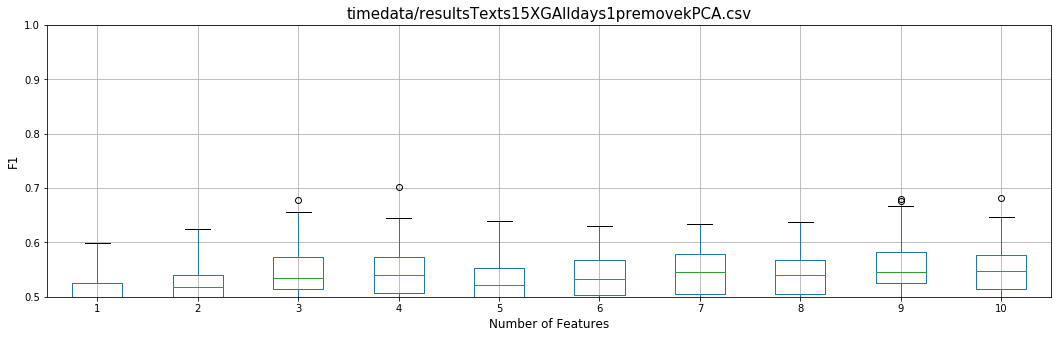

0.5596


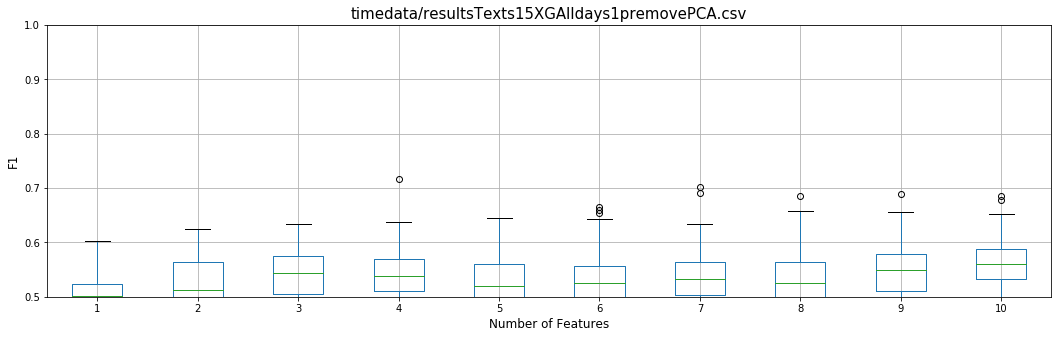

In [5]:
featureElist = ["Chi", "kPCA", "PCA"]
split = 15
name = "Texts"
ndayslist = [14, 28, 42, 56, 182, 364, "All"]
modelTypelist = ["NB", "LR", "SVC1", "SVC2", "kNN3","kNN5", "RF", "XG"]
minP = 1
w = "remove"
score = "F1"

for ndays in ndayslist:
    print("_________________________ndays = " + str(ndays) + "__________________________")
    for modelType in modelTypelist:
        for featureE in featureElist:
            filename = "timedata/results" + name + str(split) + modelType + str(ndays) + "days" + str(minP) + "p" + w + featureE + ".csv"
            try:
                resultsDF = pd.read_csv(filename)

                df = pd.DataFrame()
                averages = []
                for parameter in sorted(set(resultsDF.nFeatures)):
                    df[str(parameter)] = list(resultsDF[resultsDF["nFeatures"] == parameter][score])
                    averages.append(round(sum(resultsDF[resultsDF["nFeatures"] == parameter][score])/100,4))
                print(max(averages))
                
                plt.figure(figsize = (18, 5))
                plt.xlabel("Number of Features", fontsize = 12)
                plt.ylabel(score, fontsize = 12)
                plt.title(filename, fontsize = 15)
                df.boxplot()
                plt.ylim(0.5, 1)
                plt.show()
                plt.close()
            except:
                print(filename)

_________________________ndays = 14__________________________
0.6735


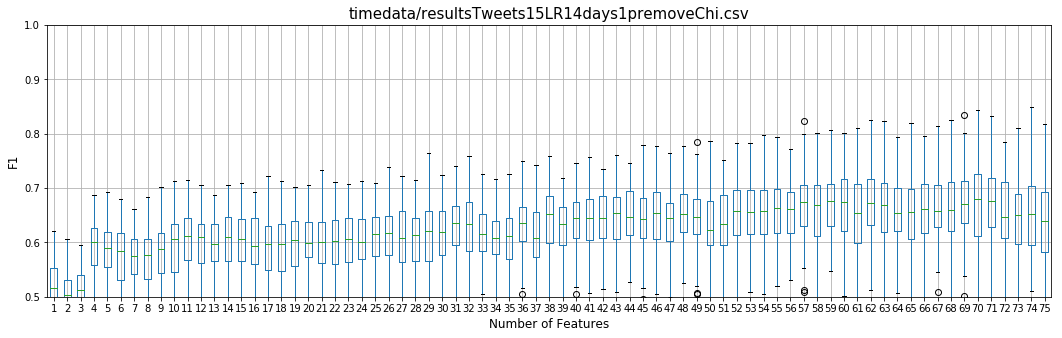

0.6049


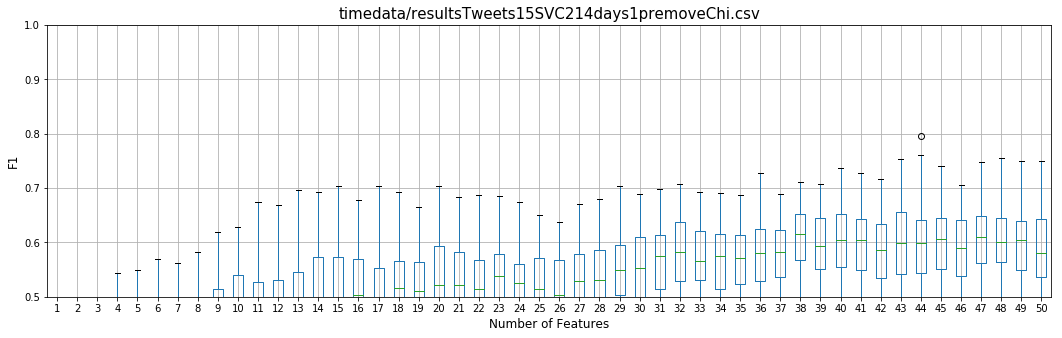

timedata/resultsTweets15kNN314days1premoveChi.csv
timedata/resultsTweets15kNN514days1premoveChi.csv
_________________________ndays = 28__________________________
0.6619


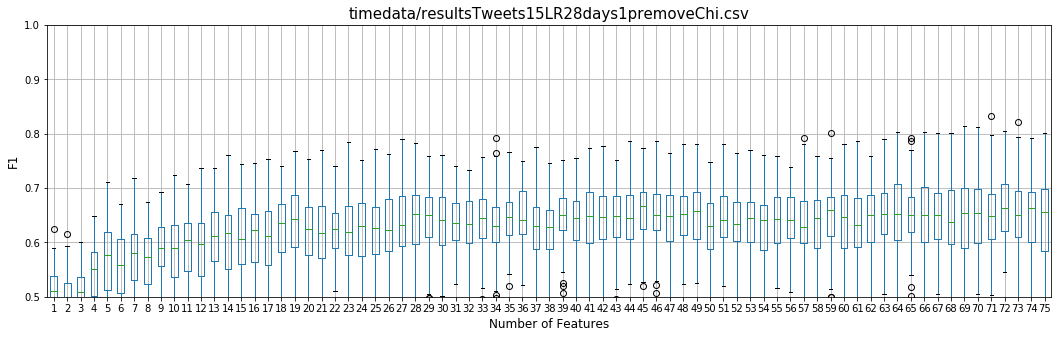

0.6247


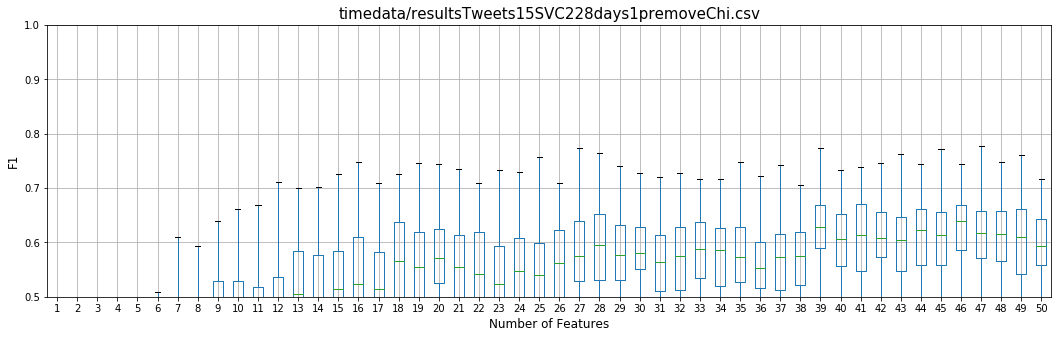

timedata/resultsTweets15kNN328days1premoveChi.csv
timedata/resultsTweets15kNN528days1premoveChi.csv
0.6118


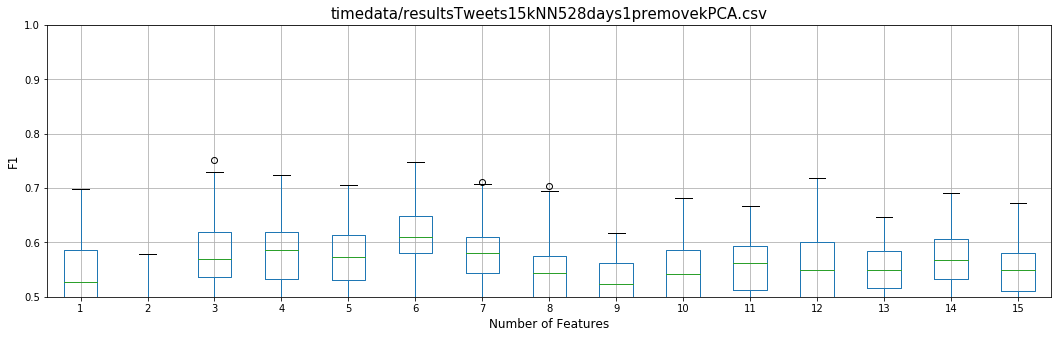

0.613


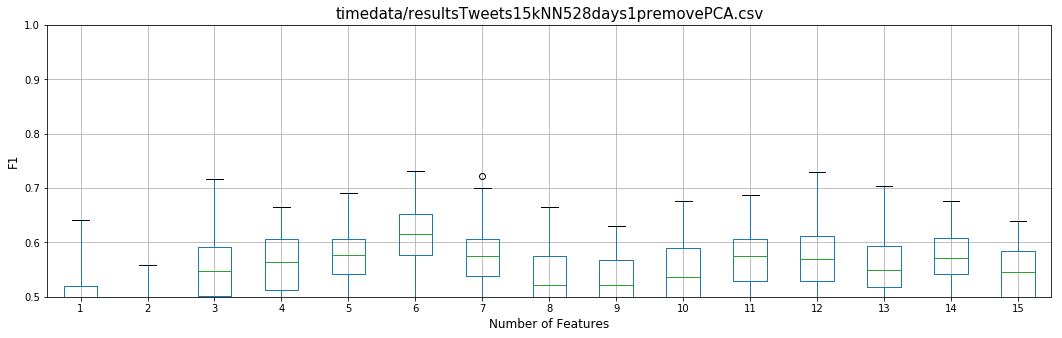

_________________________ndays = 42__________________________
0.675


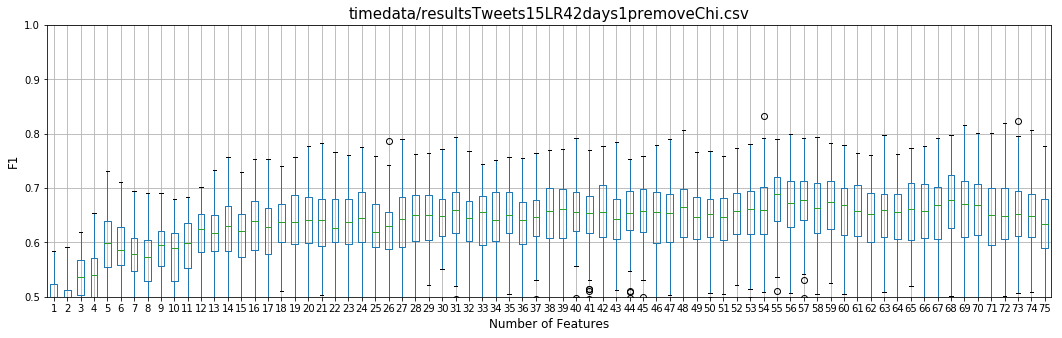

0.6154


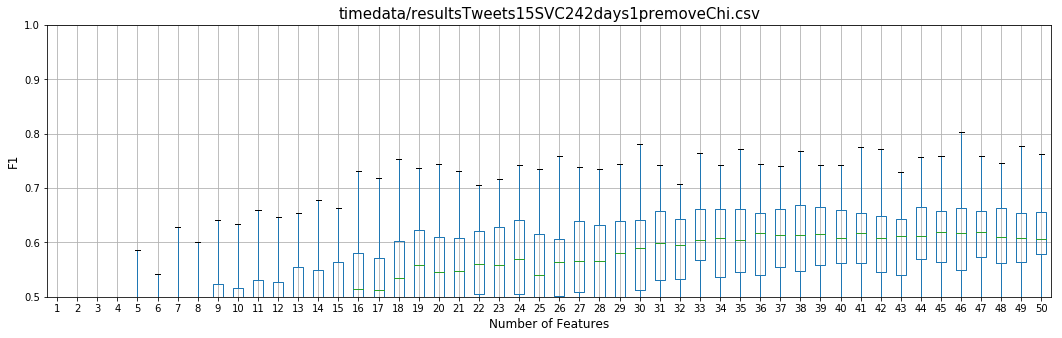

timedata/resultsTweets15kNN342days1premoveChi.csv
timedata/resultsTweets15kNN542days1premoveChi.csv
_________________________ndays = 56__________________________
0.6507


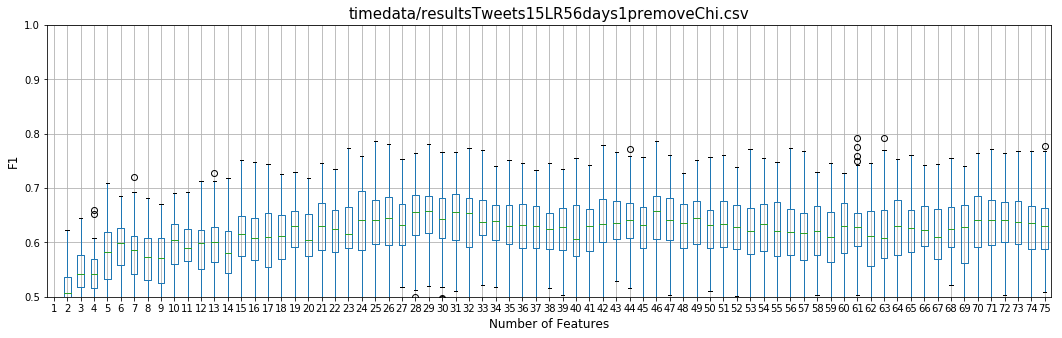

0.6114


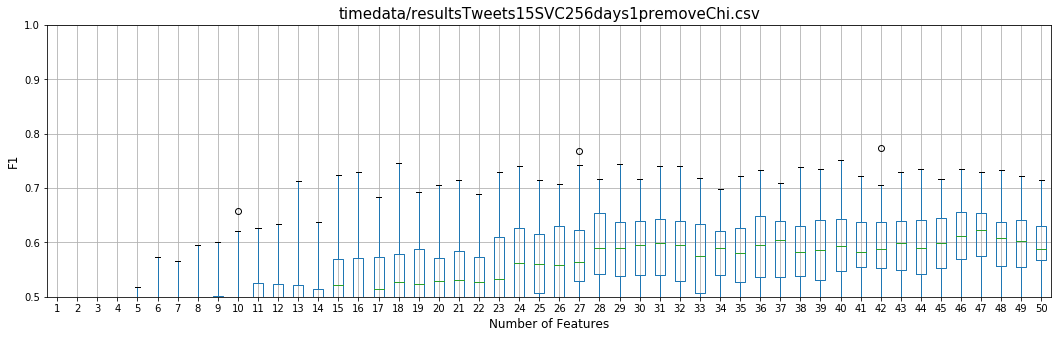

timedata/resultsTweets15kNN356days1premoveChi.csv
timedata/resultsTweets15kNN556days1premoveChi.csv
_________________________ndays = 182__________________________
0.6188


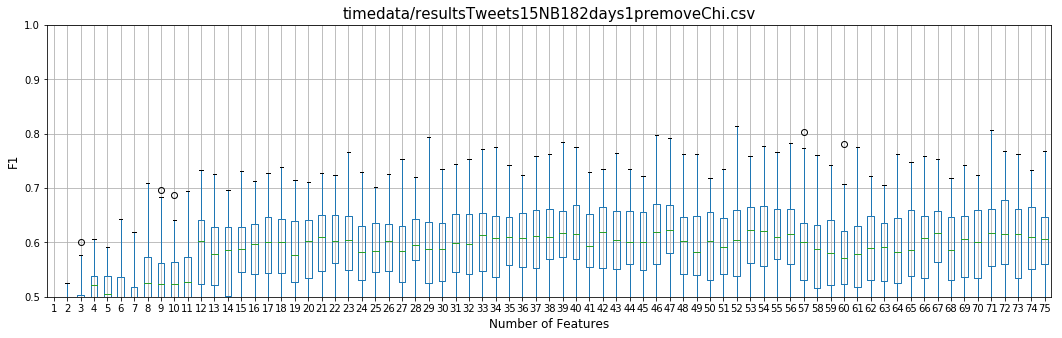

0.6318


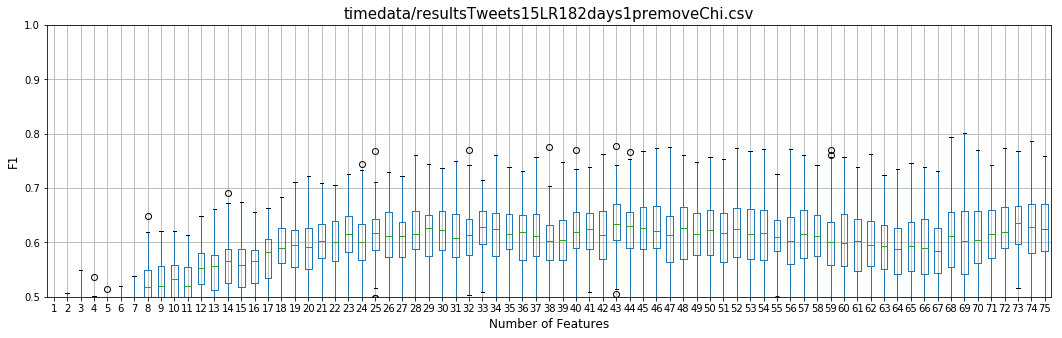

0.6054


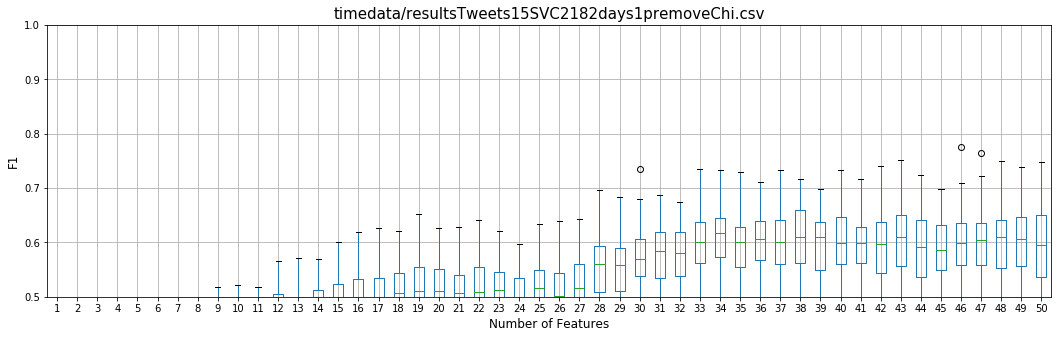

timedata/resultsTweets15kNN3182days1premoveChi.csv
timedata/resultsTweets15kNN5182days1premoveChi.csv
_________________________ndays = 364__________________________
0.6543


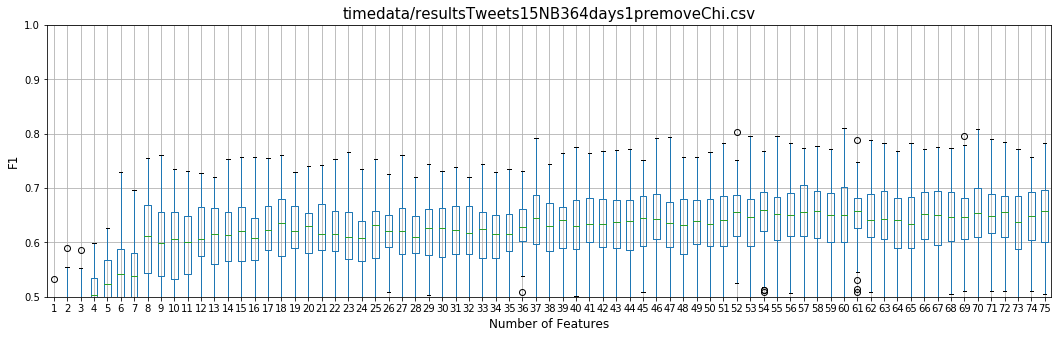

0.66


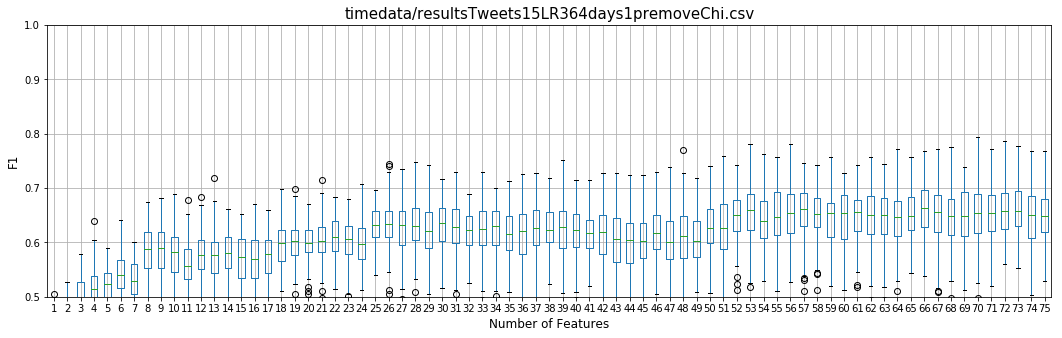

0.6015


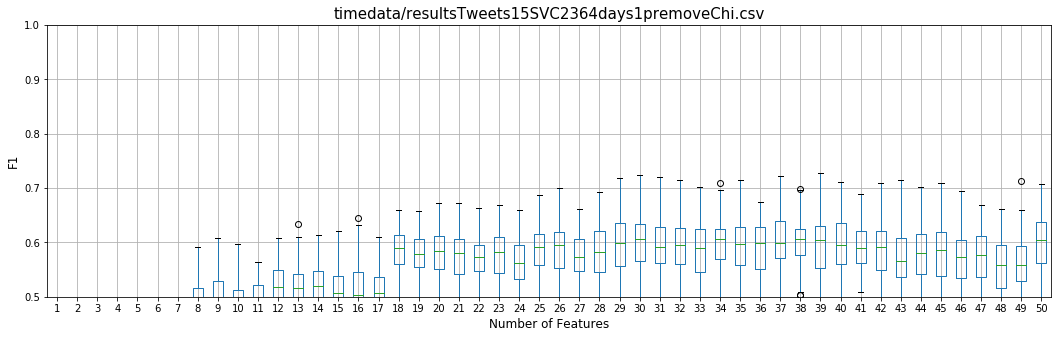

timedata/resultsTweets15kNN3364days1premoveChi.csv
timedata/resultsTweets15kNN5364days1premoveChi.csv
0.6002


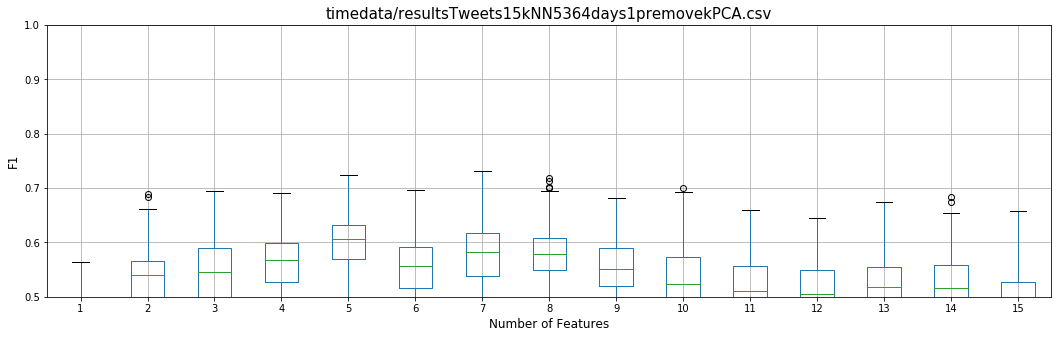

_________________________ndays = All__________________________
0.6902


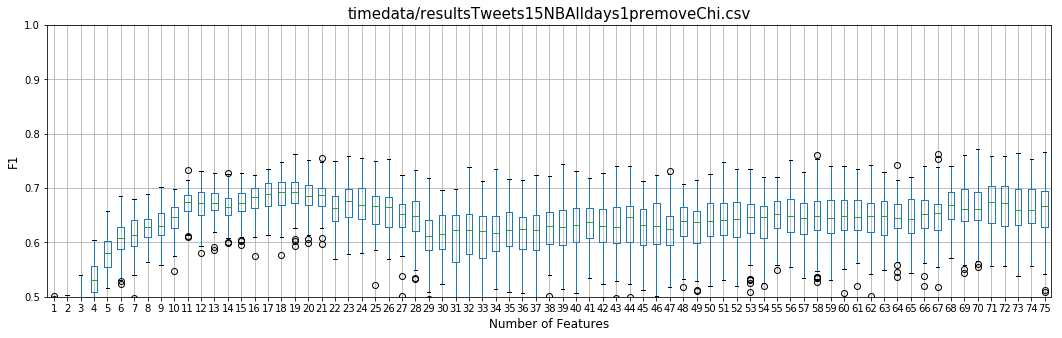

0.6603


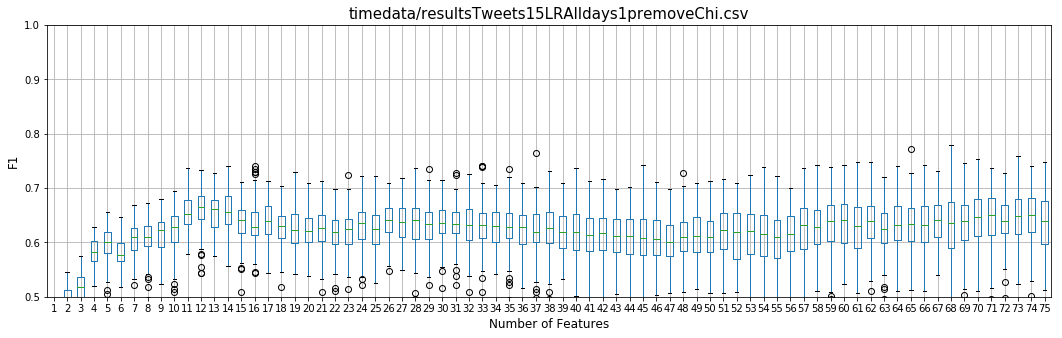

0.6352


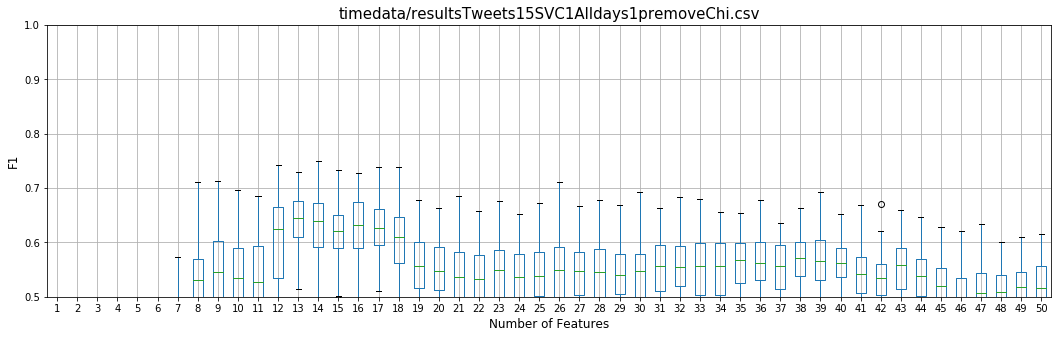

timedata/resultsTweets15kNN3Alldays1premoveChi.csv
timedata/resultsTweets15kNN5Alldays1premoveChi.csv
0.608


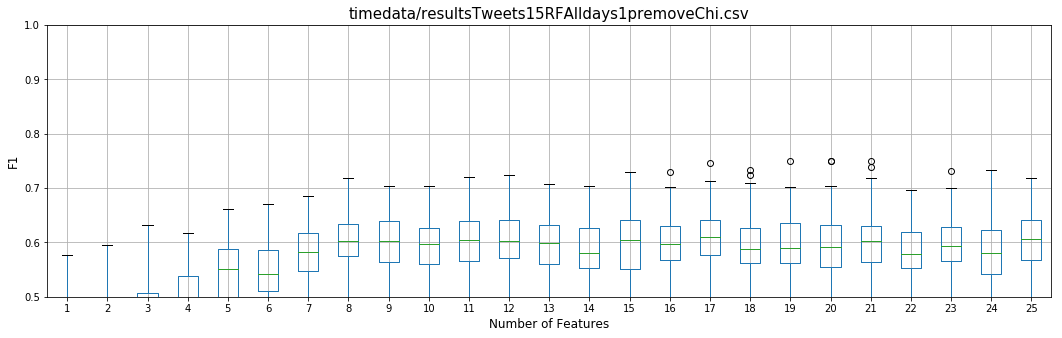

0.627


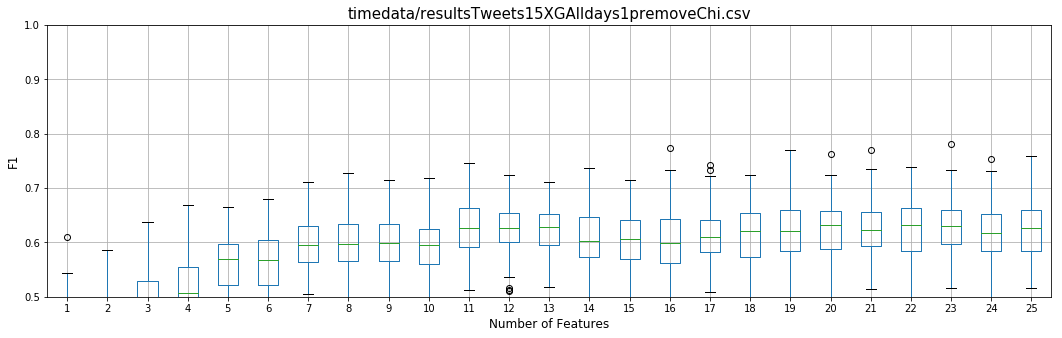

0.6008


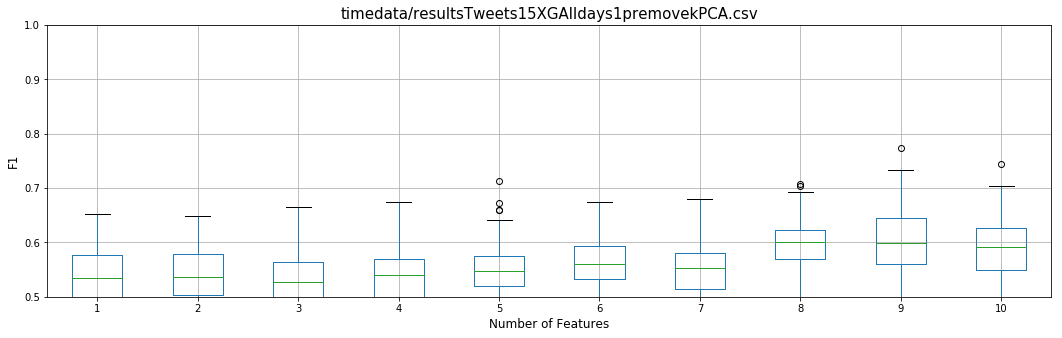

In [7]:
featureElist = ["Chi", "kPCA", "PCA"]
split = 15
name = "Tweets"
ndayslist = [14, 28, 42, 56, 182, 364, "All"]
modelTypelist = ["NB", "LR", "SVC1", "SVC2", "kNN3","kNN5", "RF", "XG"]
minP = 1
w = "remove"
score = "F1"

for ndays in ndayslist:
    print("_________________________ndays = " + str(ndays) + "__________________________")
    for modelType in modelTypelist:
        for featureE in featureElist:
            filename = "timedata/results" + name + str(split) + modelType + str(ndays) + "days" + str(minP) + "p" + w + featureE + ".csv"
            try:
                resultsDF = pd.read_csv(filename)

                df = pd.DataFrame()
                averages = []
                for parameter in sorted(set(resultsDF.nFeatures)):
                    df[str(parameter)] = list(resultsDF[resultsDF["nFeatures"] == parameter][score])
                    averages.append(round(sum(resultsDF[resultsDF["nFeatures"] == parameter][score])/100,4))
                if max(averages) > 0.6:
                    print(max(averages))
                    plt.figure(figsize = (18, 5))
                    plt.xlabel("Number of Features", fontsize = 12)
                    plt.ylabel(score, fontsize = 12)
                    plt.title(filename, fontsize = 15)
                    df.boxplot()
                    plt.ylim(0.5, 1)
                    plt.show()
                    plt.close()

            except:
                print(filename)